# Data Analysis
This notebook is used to preliminarily analyze the training data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
train_data = pd.read_excel('train.xlsx')

train_data.head()


,PRICES,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
0,2007-01-01,24.31,24.31,21.71,8.42,0.01,0.01,0.02,0.01,0.01,...,15.00,10.00,8.17,27.77,37.99,33.11,37.99,33.00,36.48,30.65
1,2007-01-02,16.01,11.00,9.01,7.50,9.00,7.45,16.50,28.01,29.96,...,37.57,36.45,37.99,53.00,59.69,50.09,50.00,36.22,31.09,29.84
2,2007-01-03,28.00,24.50,24.15,18.99,15.50,23.11,29.01,39.73,43.81,...,43.21,43.99,48.00,57.00,60.99,55.51,51.77,34.51,39.31,38.05
3,2007-01-04,31.01,28.69,27.00,24.20,12.02,27.00,28.00,34.85,41.31,...,40.01,38.00,42.66,53.00,58.99,53.50,44.01,35.00,34.46,31.57
4,2007-01-05,22.00,19.50,17.55,15.91,11.40,22.65,27.30,34.00,40.01,...,40.06,38.00,38.61,49.84,53.00,45.91,36.74,29.61,30.61,27.51


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PRICES   1096 non-null   datetime64[ns]
 1   Hour 01  1096 non-null   float64       
 2   Hour 02  1096 non-null   float64       
 3   Hour 03  1096 non-null   float64       
 4   Hour 04  1096 non-null   float64       
 5   Hour 05  1096 non-null   float64       
 6   Hour 06  1096 non-null   float64       
 7   Hour 07  1096 non-null   float64       
 8   Hour 08  1096 non-null   float64       
 9   Hour 09  1096 non-null   float64       
 10  Hour 10  1096 non-null   float64       
 11  Hour 11  1096 non-null   float64       
 12  Hour 12  1096 non-null   float64       
 13  Hour 13  1096 non-null   float64       
 14  Hour 14  1096 non-null   float64       
 15  Hour 15  1096 non-null   float64       
 16  Hour 16  1096 non-null   float64       
 17  Hour 17  1096 non-null   float64 

In [4]:
missing_values_count = train_data.isnull().sum()  # Count missing values in each column
print(missing_values_count)  # Print the count of missing values

PRICES     0
Hour 01    0
Hour 02    0
Hour 03    0
Hour 04    0
Hour 05    0
Hour 06    0
Hour 07    0
Hour 08    0
Hour 09    0
Hour 10    0
Hour 11    0
Hour 12    0
Hour 13    0
Hour 14    0
Hour 15    0
Hour 16    0
Hour 17    0
Hour 18    0
Hour 19    0
Hour 20    0
Hour 21    0
Hour 22    0
Hour 23    0
Hour 24    0
dtype: int64


Data looks decent. No missing values. Prices are float and dates are datetime. <br>
Data contains hourly energy price of 1096 days: 2018-01-01 to 2019-12-31.


In [5]:
train_data.describe()

,PRICES,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
count,1096,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2008-07-01 12:00:00,38.838120,33.993558,30.053896,24.881168,23.124434,28.803768,36.652199,50.544790,56.924398,...,58.981095,54.614881,53.981651,60.162509,67.466077,62.436697,58.464252,50.285712,50.451268,45.259334
min,2007-01-01 00:00:00,0.010000,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,8.030000,1.000000,0.010000,0.010000,1.000000,10.410000,5.530000,8.360000,18.920000,16.090000
25%,2007-10-01 18:00:00,25.407500,22.000000,19.007500,13.435000,11.237500,17.927500,21.977500,30.000000,34.982500,...,37.615000,34.605000,33.602500,35.000000,36.040000,36.405000,35.905000,34.040000,35.085000,30.850000
50%,2008-07-01 12:00:00,33.470000,29.465000,26.025000,21.685000,20.000000,25.725000,32.895000,43.590000,49.000000,...,49.930000,46.850000,45.030000,49.895000,55.990000,55.825000,51.000000,43.545000,41.960000,37.395000
75%,2009-04-01 06:00:00,52.850000,46.352500,40.717500,34.000000,31.942500,39.405000,52.187500,71.950000,76.775000,...,75.000000,70.000000,69.567500,74.992500,80.792500,79.302500,73.017500,65.960000,66.465000,60.977500
max,2009-12-31 00:00:00,500.000000,180.000000,200.000000,160.000000,160.000000,160.000000,150.500000,179.320000,227.130000,...,950.000000,950.000000,950.000000,769.470000,1762.540000,1066.820000,2500.000000,300.030000,180.000000,210.100000
std,NaN,21.884887,16.453507,15.947602,14.585498,14.436540,15.899613,20.775206,28.969477,30.775903,...,39.279068,38.096263,40.691564,46.205986,75.780436,45.182318,77.865406,22.377123,20.360752,19.155459


In [6]:
train_data_without_date = train_data.drop(columns=['PRICES'])
for hour in train_data_without_date.columns:
    print(hour)
    print(train_data_without_date[hour].describe())

Hour 01
count    1096.000000
mean       38.838120
std        21.884887
min         0.010000
25%        25.407500
50%        33.470000
75%        52.850000
max       500.000000
Name: Hour 01, dtype: float64
Hour 02
count    1096.000000
mean       33.993558
std        16.453507
min         0.300000
25%        22.000000
50%        29.465000
75%        46.352500
max       180.000000
Name: Hour 02, dtype: float64
Hour 03
count    1096.000000
mean       30.053896
std        15.947602
min         0.010000
25%        19.007500
50%        26.025000
75%        40.717500
max       200.000000
Name: Hour 03, dtype: float64
Hour 04
count    1096.000000
mean       24.881168
std        14.585498
min         0.010000
25%        13.435000
50%        21.685000
75%        34.000000
max       160.000000
Name: Hour 04, dtype: float64
Hour 05
count    1096.000000
mean       23.124434
std        14.436540
min         0.010000
25%        11.237500
50%        20.000000
75%        31.942500
max       160.000000


Which hour has the cheapest and most expensive price?


In [7]:
max_min_table = train_data_without_date.agg(['max', 'min']) 
print(max_min_table)


     Hour 01  Hour 02  Hour 03  Hour 04  Hour 05  Hour 06  Hour 07  Hour 08  \
max   500.00    180.0   200.00   160.00   160.00   160.00   150.50   179.32   
min     0.01      0.3     0.01     0.01     0.01     0.01     0.01     0.01   

     Hour 09  Hour 10  ...  Hour 15  Hour 16  Hour 17  Hour 18  Hour 19  \
max   227.13   500.00  ...   950.00    950.0   950.00   769.47  1762.54   
min     0.01     0.01  ...     8.03      1.0     0.01     0.01     1.00   

     Hour 20  Hour 21  Hour 22  Hour 23  Hour 24  
max  1066.82  2500.00   300.03   180.00   210.10  
min    10.41     5.53     8.36    18.92    16.09  

[2 rows x 24 columns]


In [8]:
print(f"Highest Maximum price: {max_min_table.iloc[0].max()}, at hour {max_min_table.iloc[0].idxmax()}")
print(f"Lowest Maximum price: {max_min_table.iloc[0].min()}, at hour {max_min_table.iloc[0].idxmin()}")
print(f"Highest Minimum price: {max_min_table.iloc[1].max()}, at hour {max_min_table.iloc[1].idxmax()}")
print(f"Lowest Minimum price: {max_min_table.iloc[1].min()}, at hour {max_min_table.iloc[1].idxmin()}")


Highest Maximum price: 2500.0, at hour Hour 21
Lowest Maximum price: 150.5, at hour Hour 07
Highest Minimum price: 18.92, at hour Hour 23
Lowest Minimum price: 0.01, at hour Hour 01


Which hour has the highest and lowest average price and std?


In [9]:
mean_sd_table = train_data_without_date.agg(['mean', 'std'])  # Calculate mean and standard deviation
print(mean_sd_table)  # Print the resulting table

        Hour 01    Hour 02    Hour 03    Hour 04    Hour 05    Hour 06  \
mean  38.838120  33.993558  30.053896  24.881168  23.124434  28.803768   
std   21.884887  16.453507  15.947602  14.585498  14.436540  15.899613   

        Hour 07    Hour 08    Hour 09    Hour 10  ...    Hour 15    Hour 16  \
mean  36.652199  50.544790  56.924398  63.911743  ...  58.981095  54.614881   
std   20.775206  28.969477  30.775903  39.165093  ...  39.279068  38.096263   

        Hour 17    Hour 18    Hour 19    Hour 20    Hour 21    Hour 22  \
mean  53.981651  60.162509  67.466077  62.436697  58.464252  50.285712   
std   40.691564  46.205986  75.780436  45.182318  77.865406  22.377123   

        Hour 23    Hour 24  
mean  50.451268  45.259334  
std   20.360752  19.155459  

[2 rows x 24 columns]


In [10]:
print("Maximum and minimum mean:")
print(f"Maximum mean: {	mean_sd_table.iloc[0].max()}, at hour {mean_sd_table.iloc[0].idxmax()}")
print(f"Minimum mean: {mean_sd_table.iloc[0].min()}, at hour {mean_sd_table.iloc[0].idxmin()}")

print("Maximum and minimum std:")
print(f"Maximum std: {mean_sd_table.iloc[1].max()}, at hour {mean_sd_table.iloc[1].idxmax()}")
print(f"Minimum std: {mean_sd_table.iloc[1].min()}, at hour {mean_sd_table.iloc[1].idxmin()}")



Maximum and minimum mean:
Maximum mean: 70.88373175182483, at hour Hour 12
Minimum mean: 23.12443430656934, at hour Hour 05
Maximum and minimum std:
Maximum std: 77.86540636560514, at hour Hour 21
Minimum std: 14.436540037840562, at hour Hour 05


Hour 05 has the lowest mean and sd, while Hour 12 has the highest mean and hour 21 has the highest std. <br>
Let's have a further look at the Hour 05, 12, and 21.



In [11]:
for target_hour in ["Hour 05", "Hour 12", "Hour 21"]:
    print(target_hour)
    print(train_data[target_hour].describe())



Hour 05
count    1096.000000
mean       23.124434
std        14.436540
min         0.010000
25%        11.237500
50%        20.000000
75%        31.942500
max       160.000000
Name: Hour 05, dtype: float64
Hour 12
count    1096.000000
mean       70.883732
std        48.067981
min         8.990000
25%        44.987500
50%        59.795000
75%        86.012500
max       950.000000
Name: Hour 12, dtype: float64
Hour 21
count    1096.000000
mean       58.464252
std        77.865406
min         5.530000
25%        35.905000
50%        51.000000
75%        73.017500
max      2500.000000
Name: Hour 21, dtype: float64


In [12]:
# Which date has the highest observed price in history?
print(train_data[train_data_without_date['Hour 21'] == train_data_without_date['Hour 21'].max()]['PRICES'])
print(train_data_without_date['Hour 21'].max())


# which date has the lowest observed price in history?
print(train_data[train_data_without_date['Hour 01'] == train_data_without_date['Hour 01'].min()]['PRICES'])
print(train_data_without_date['Hour 01'].min())


315   2007-11-12
Name: PRICES, dtype: datetime64[ns]
2500.0
1007   2009-10-04
1015   2009-10-12
Name: PRICES, dtype: datetime64[ns]
0.01


Let's have a look at their price distribution, mean, and outliers in boxplot.


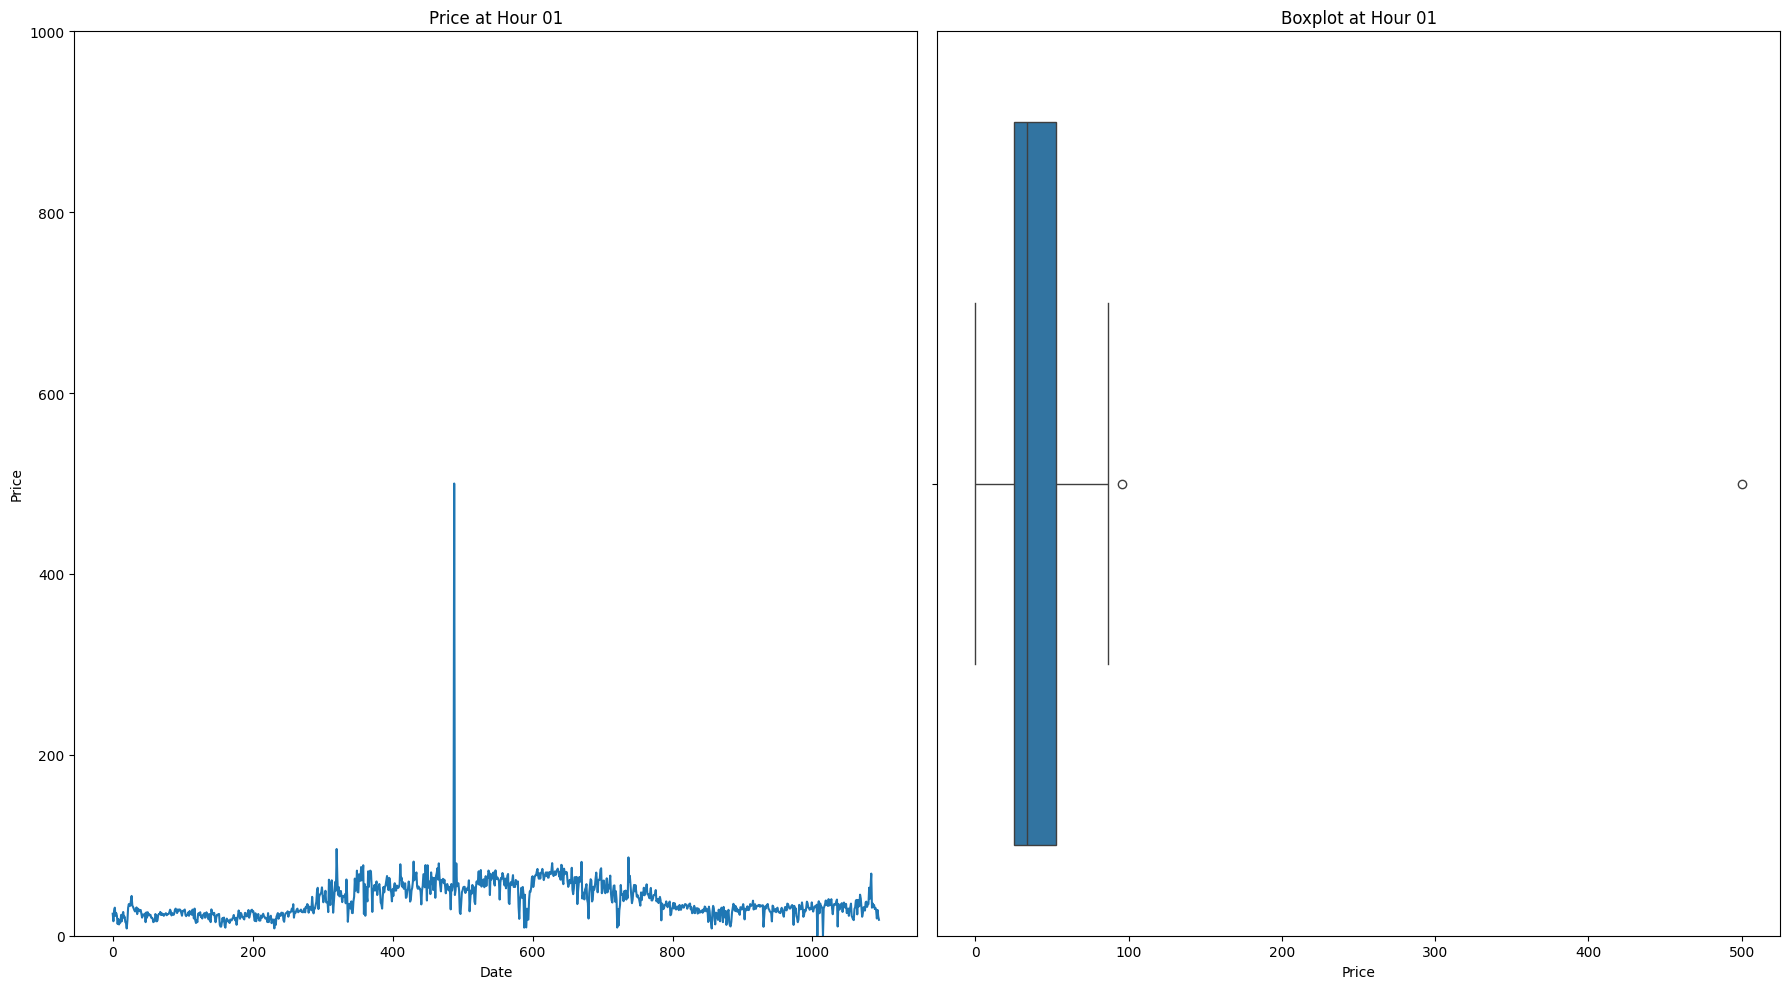

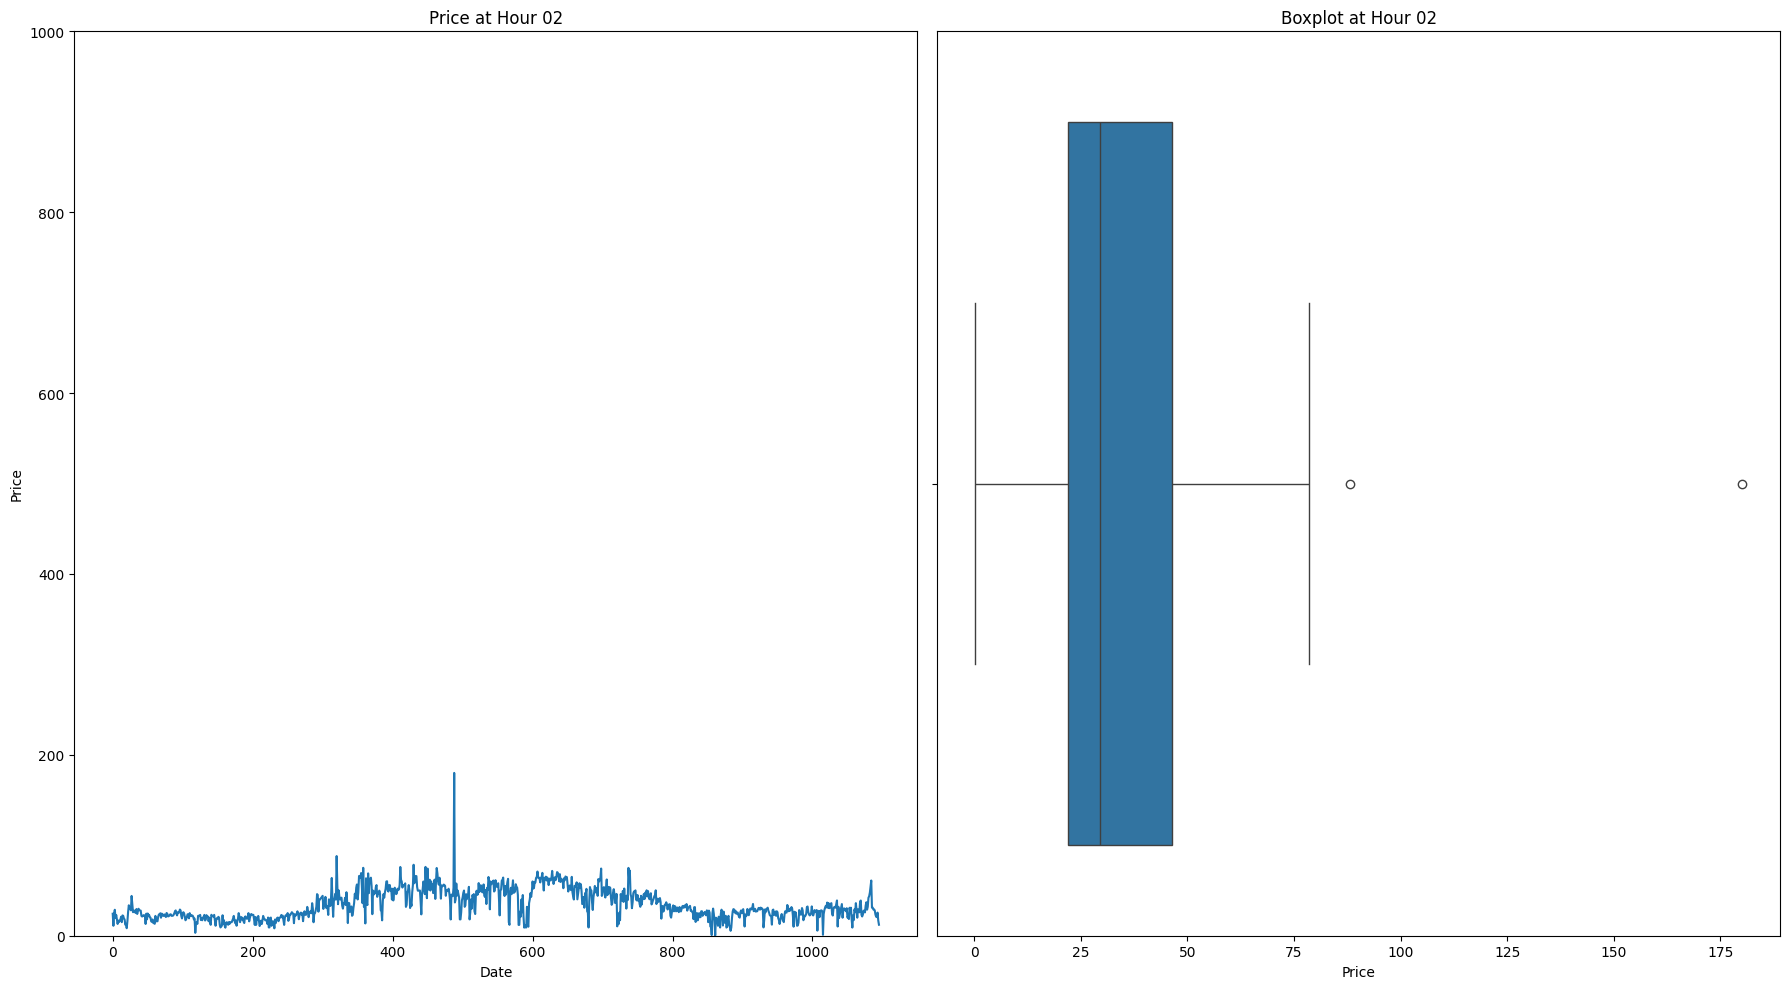

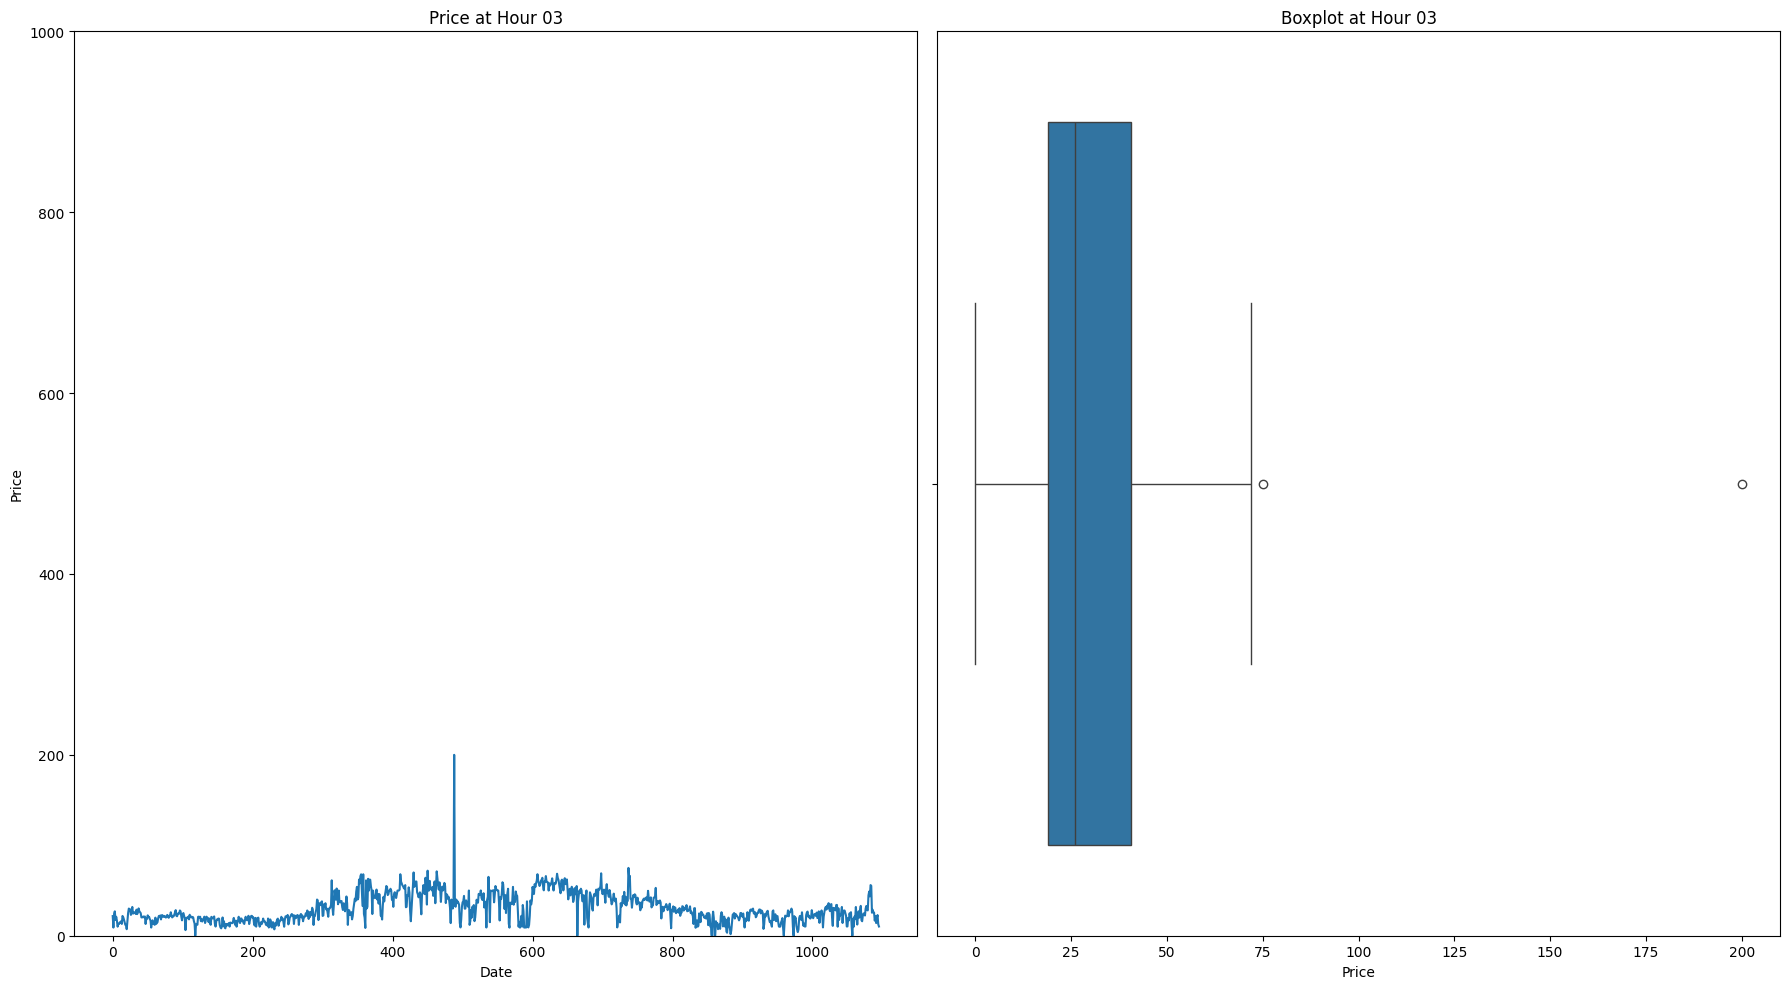

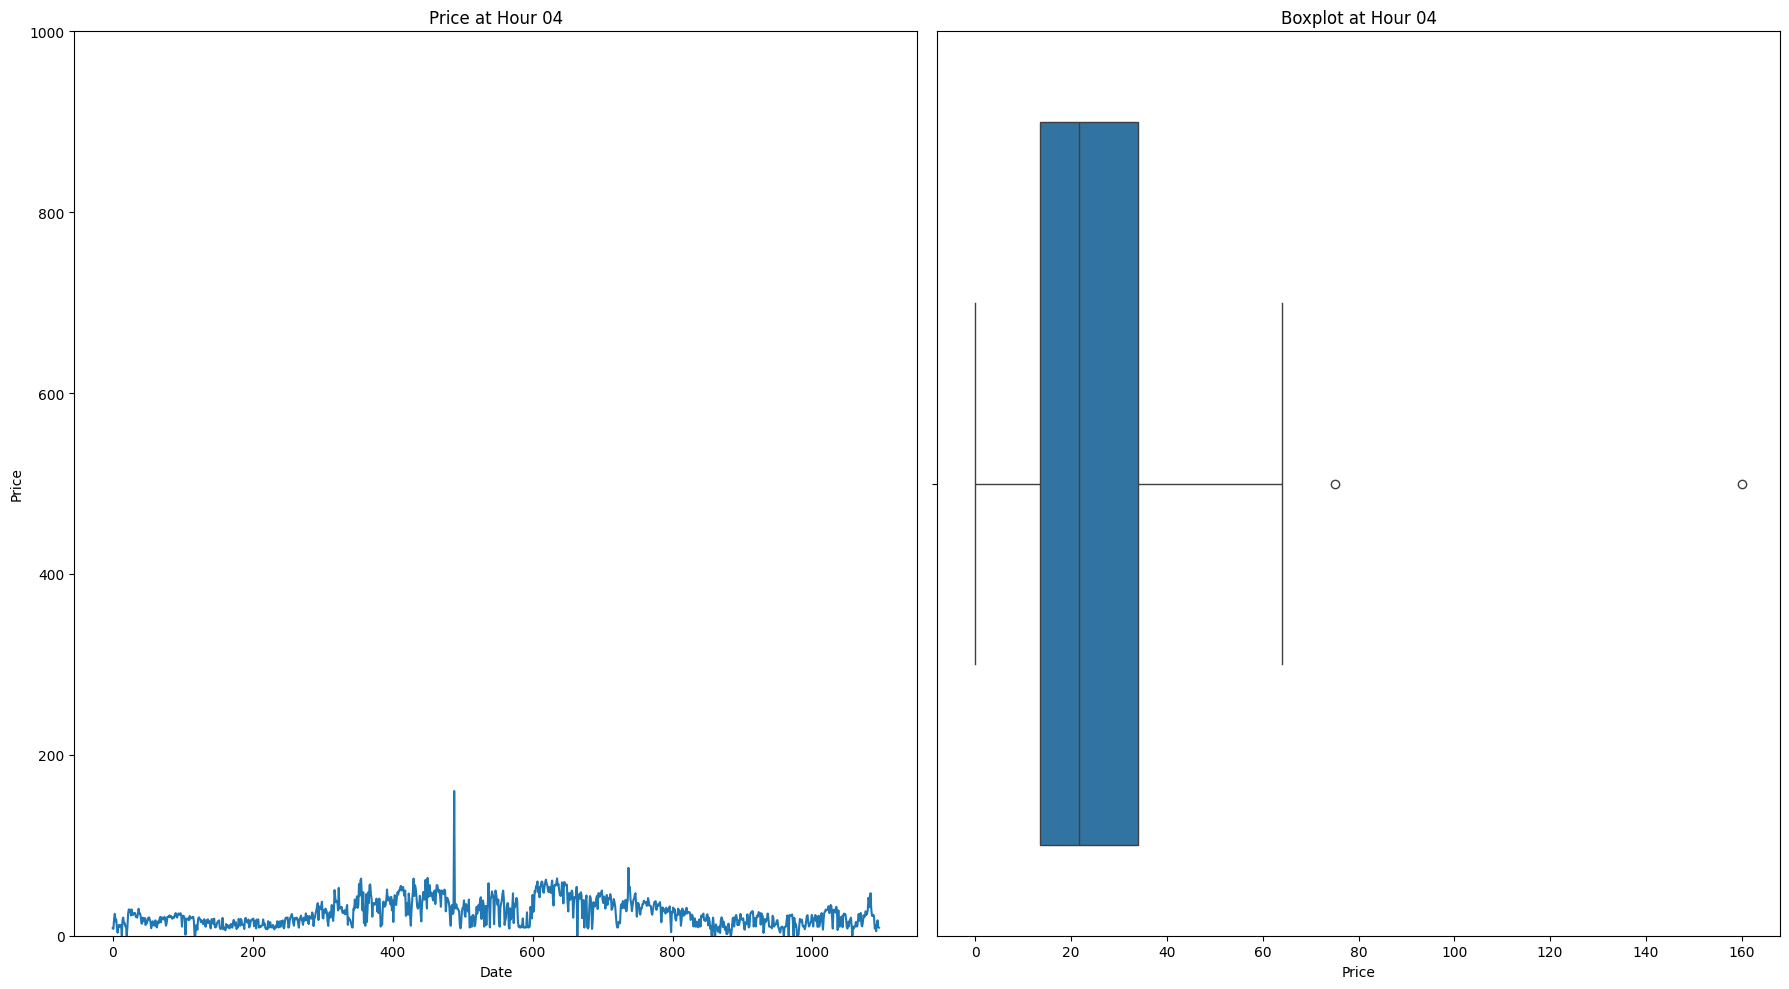

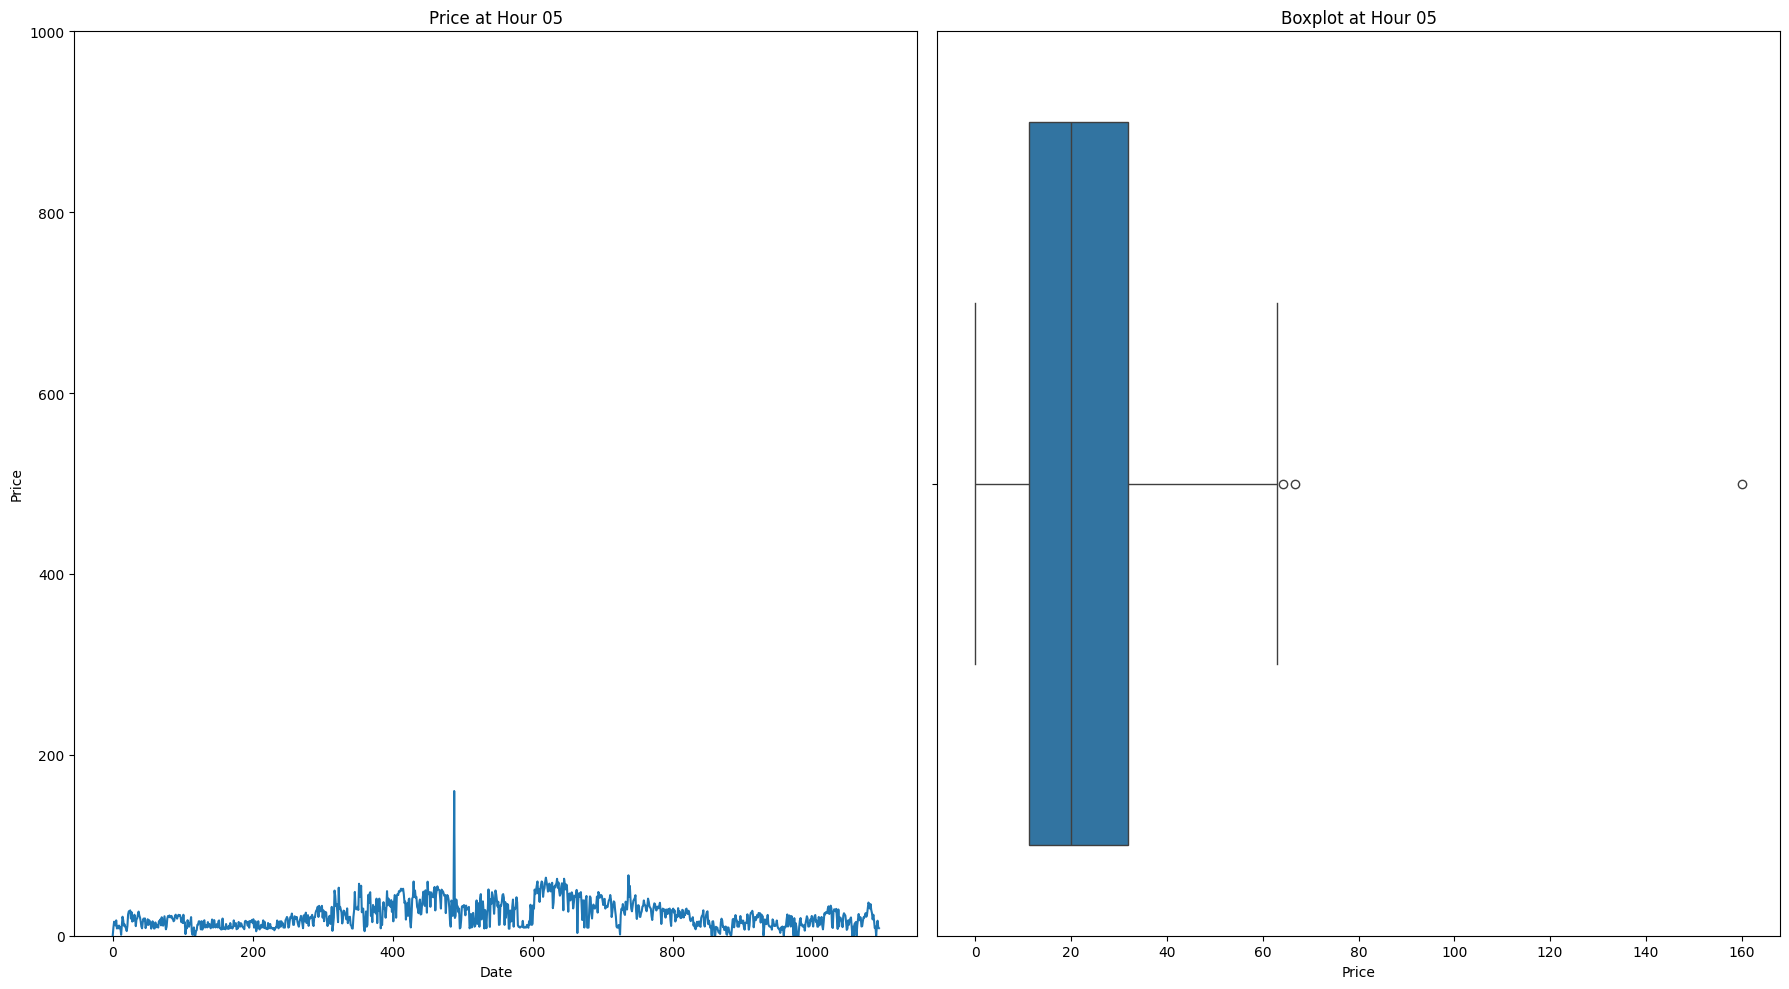

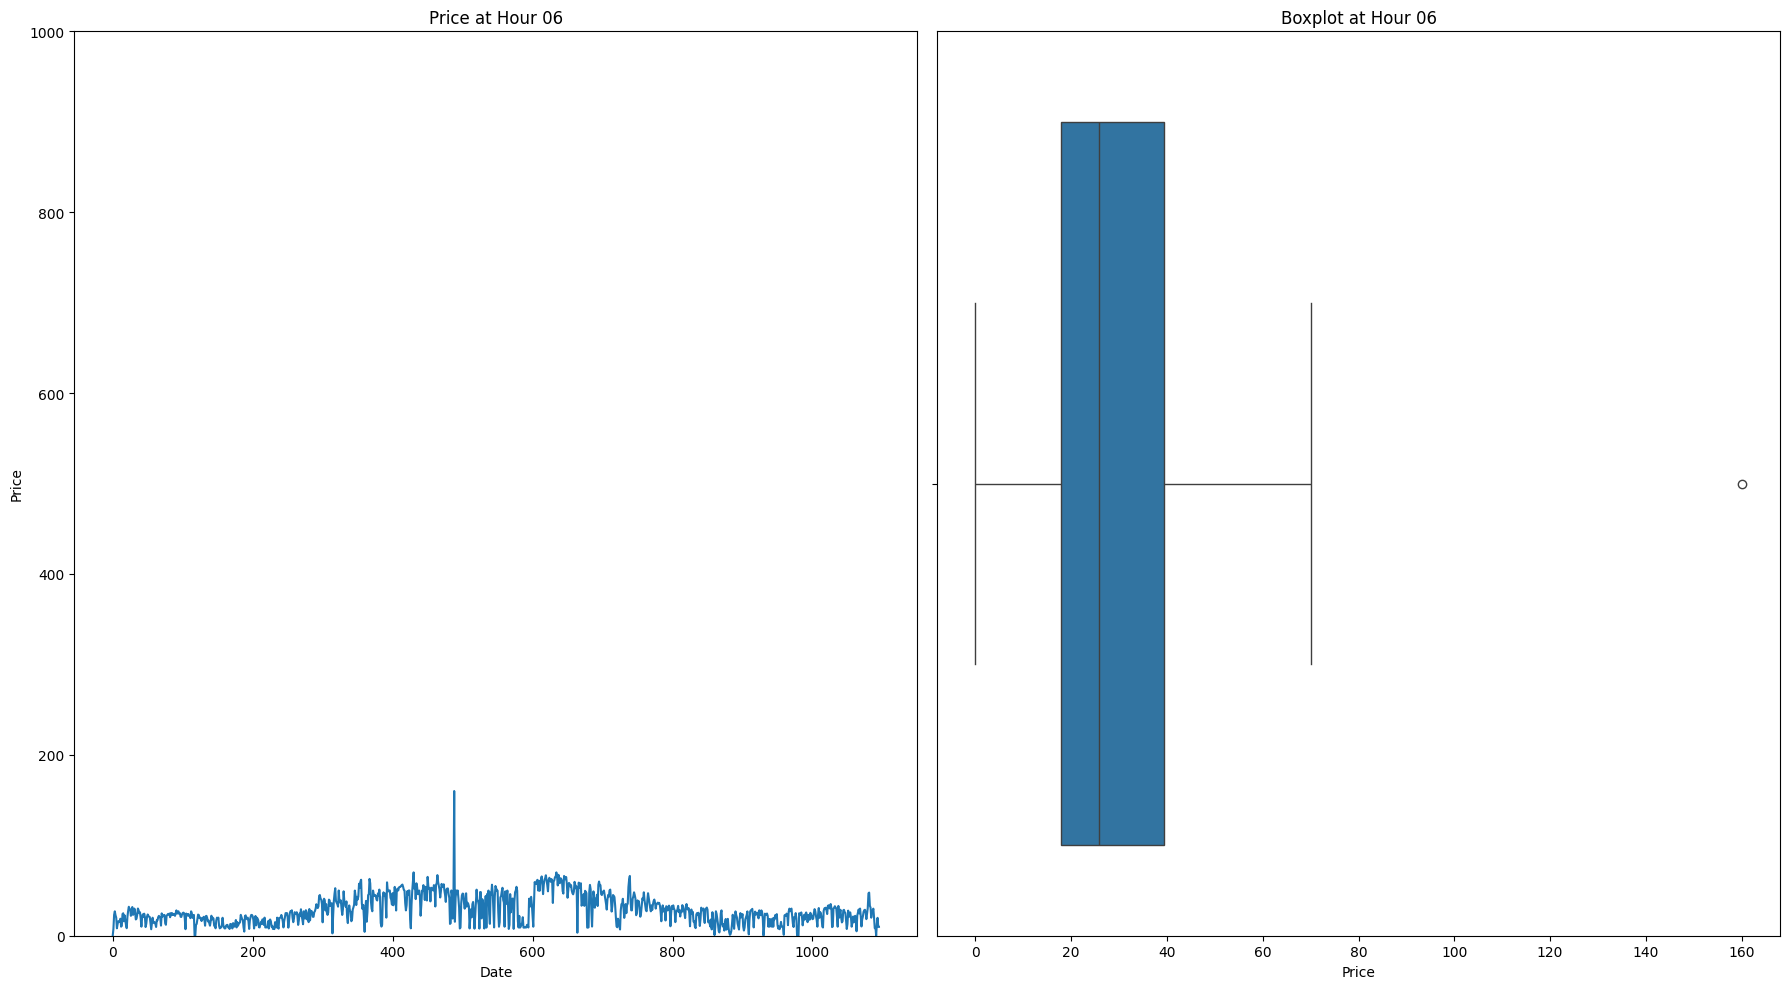

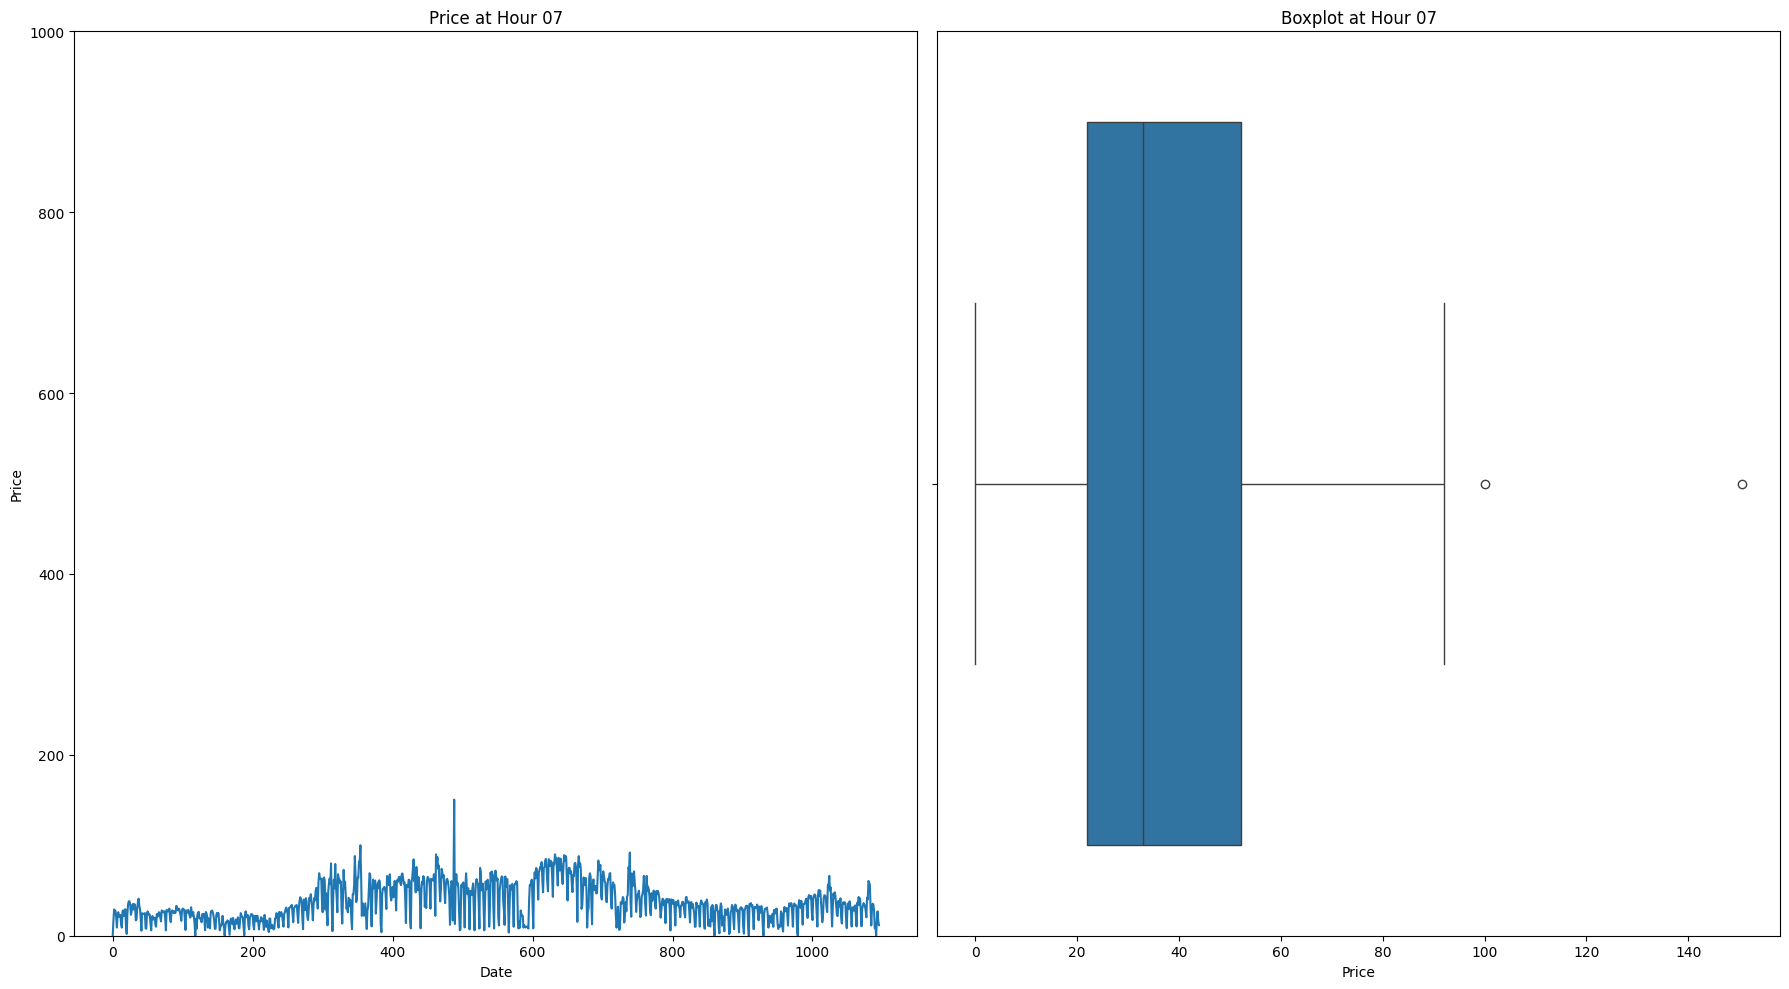

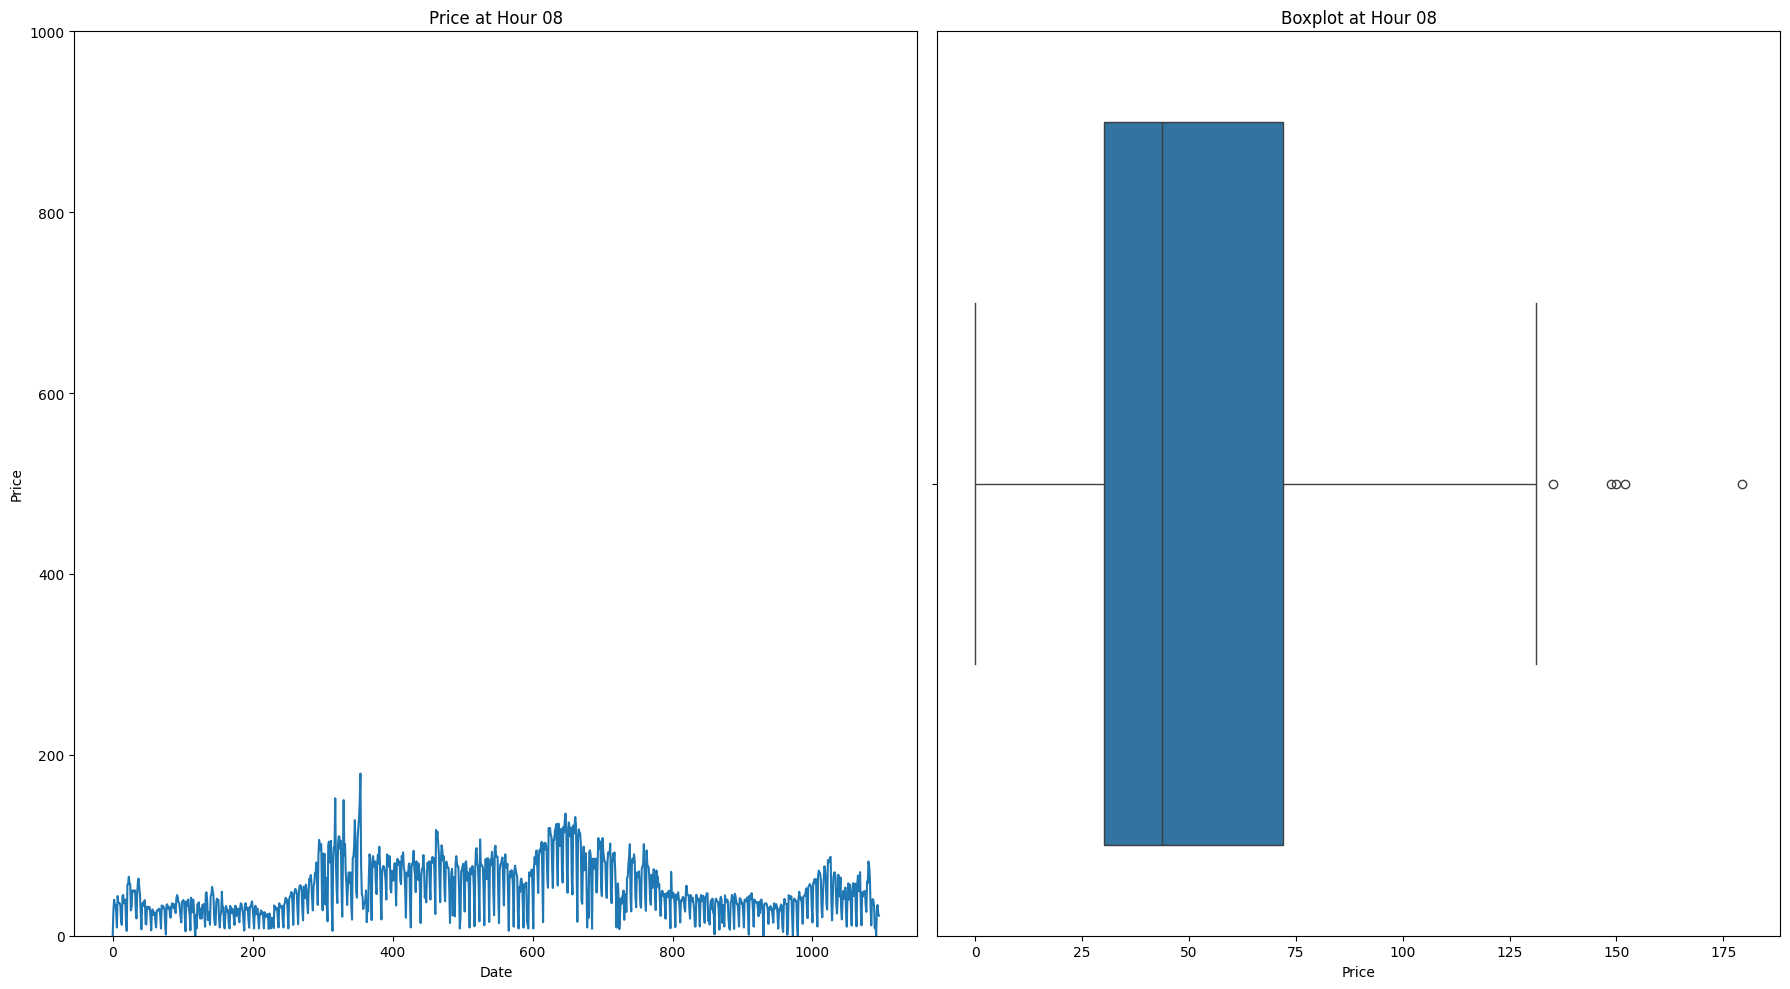

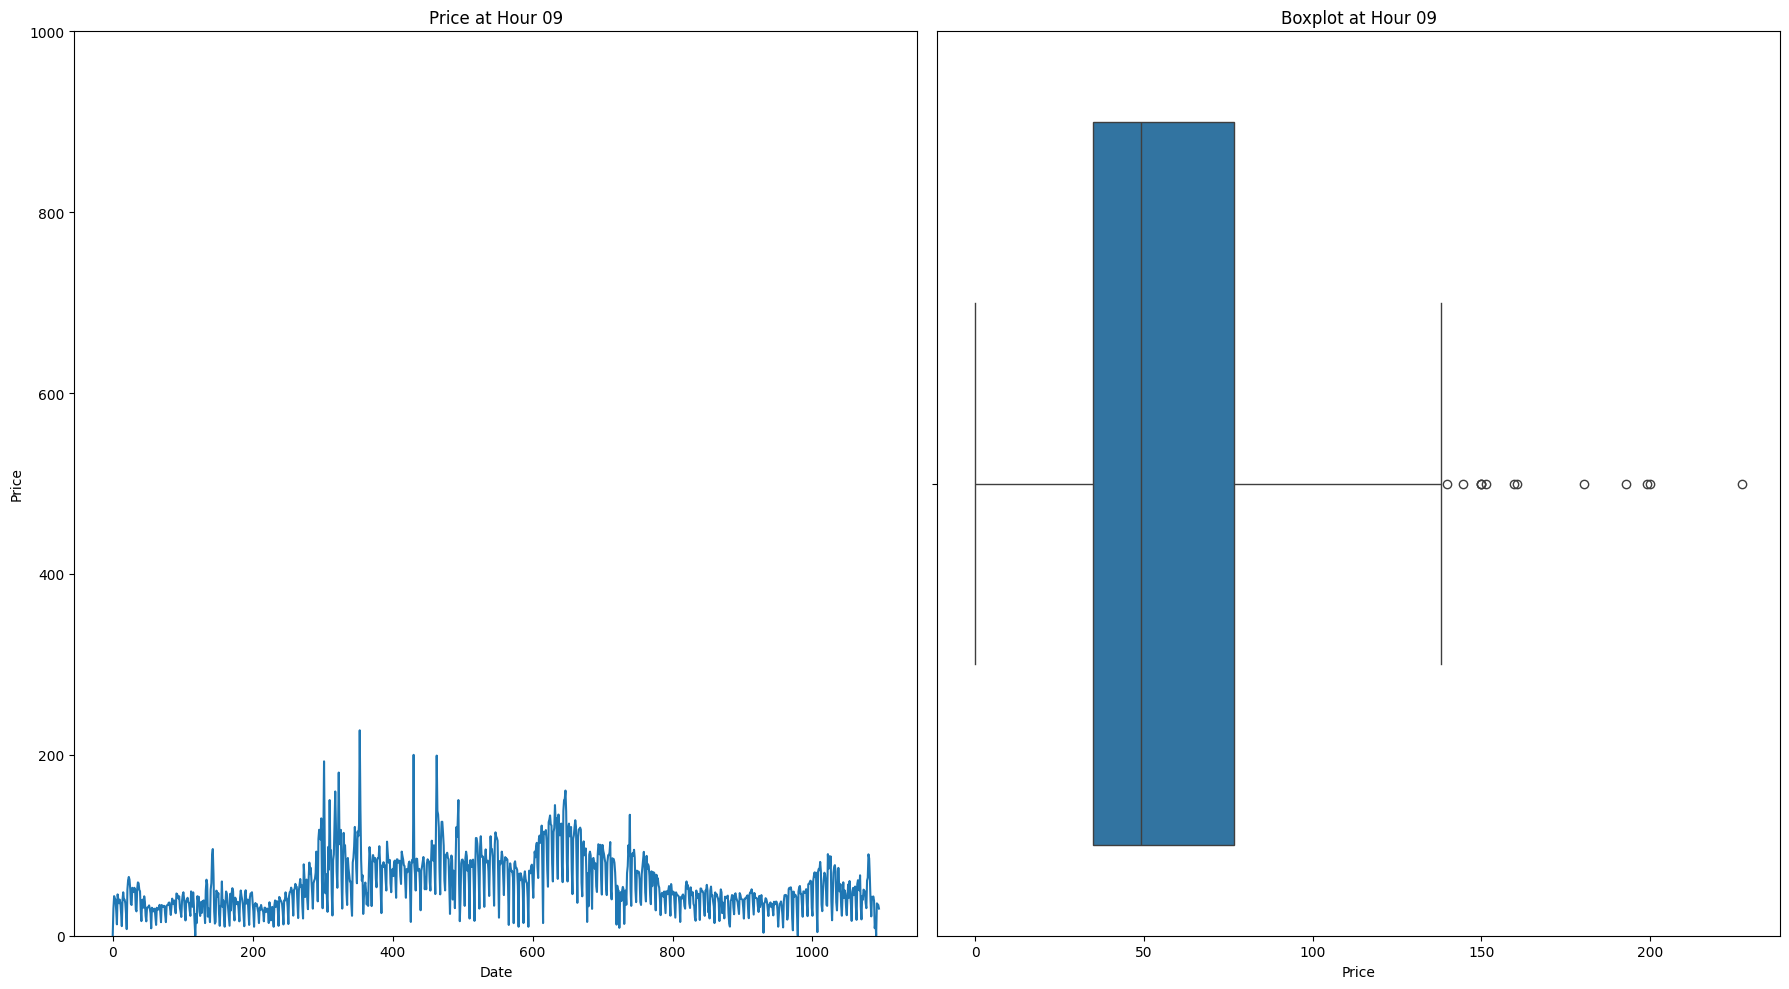

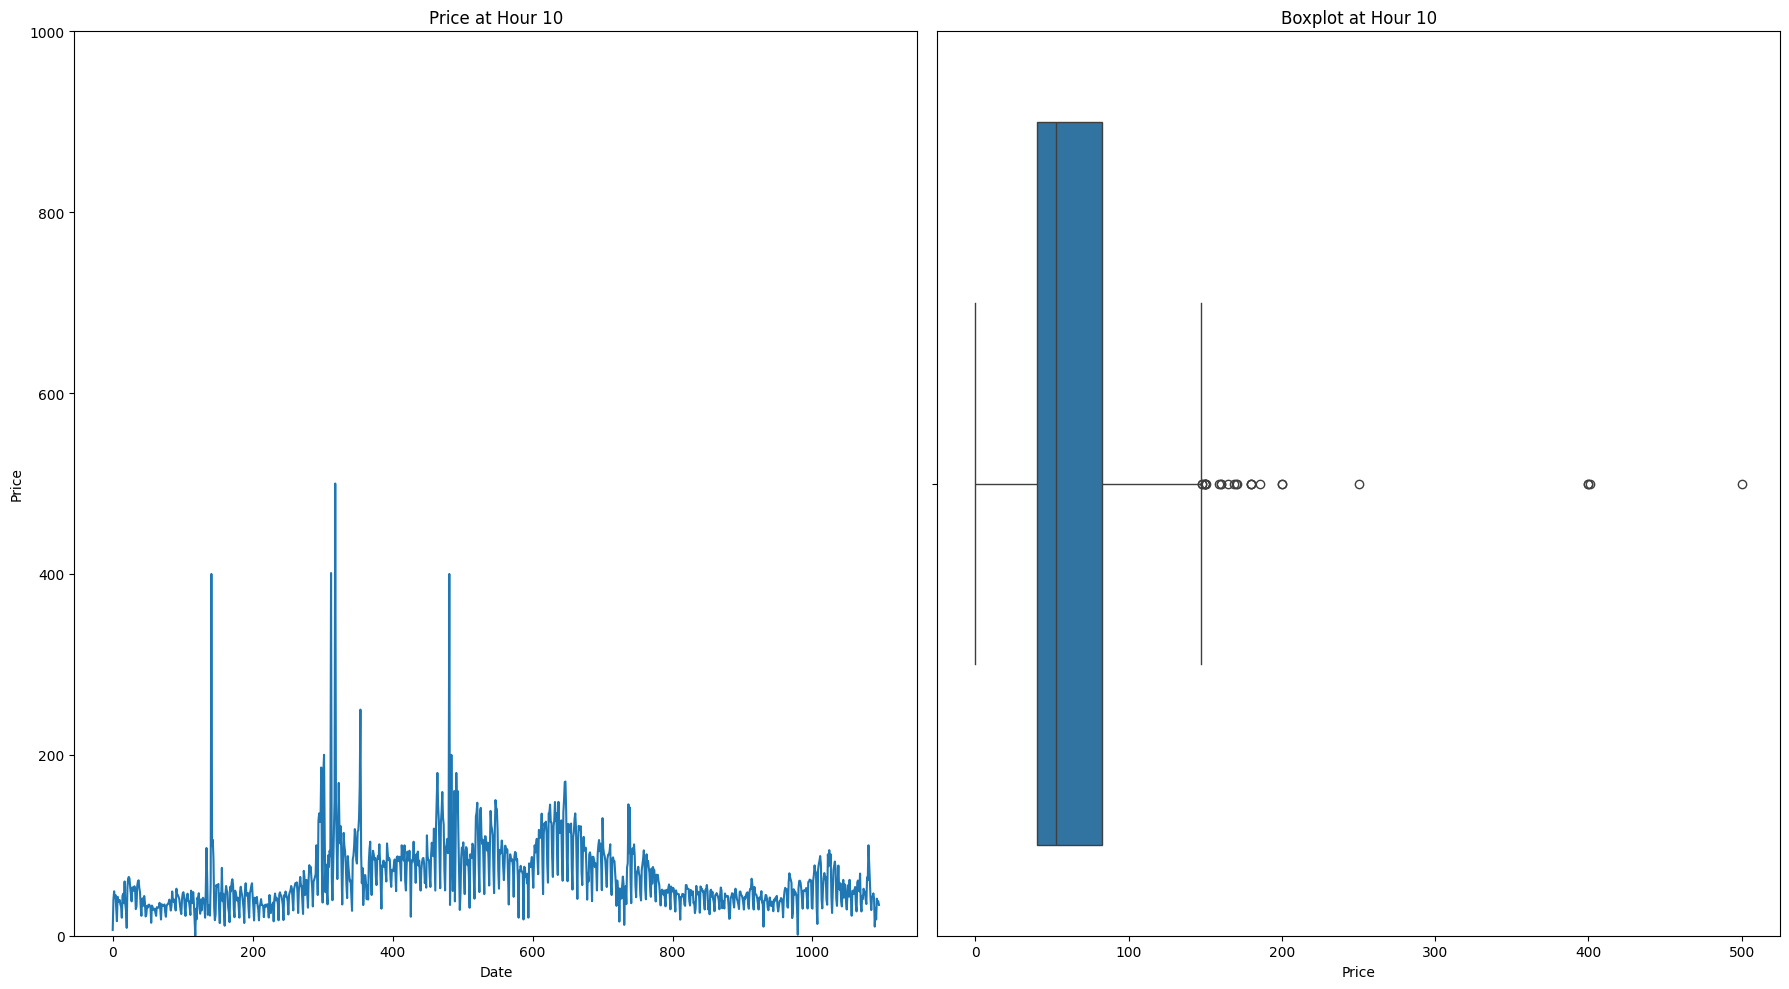

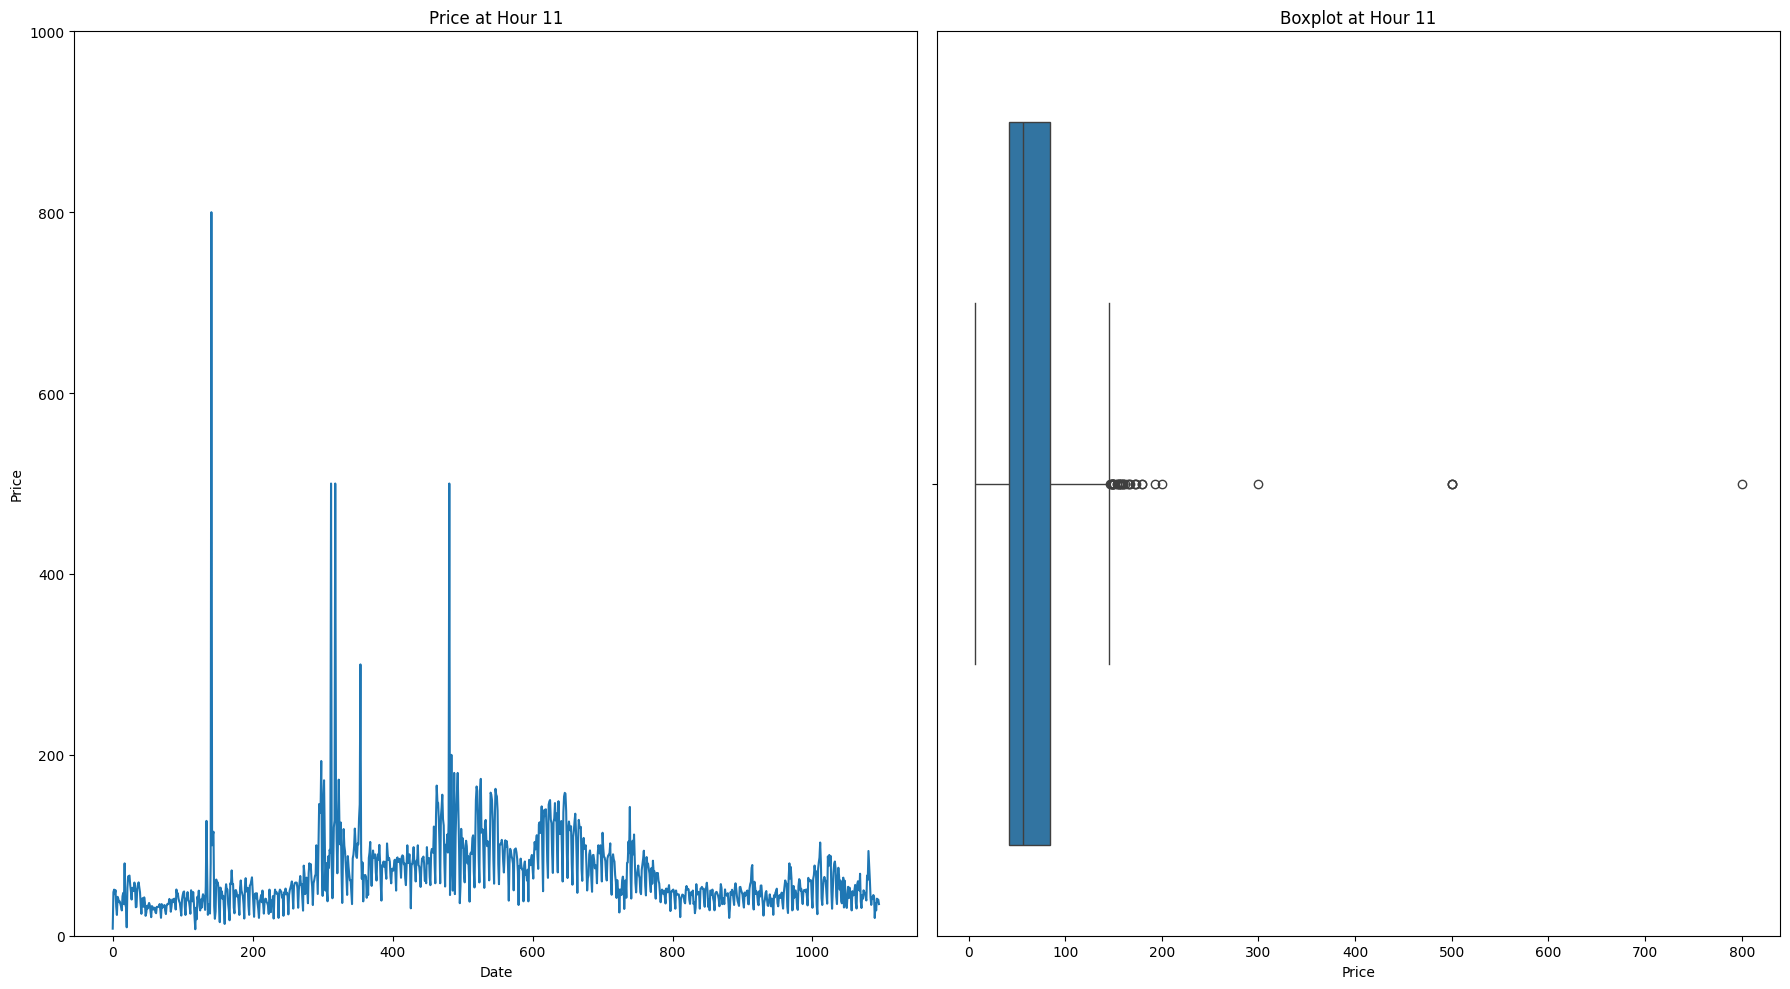

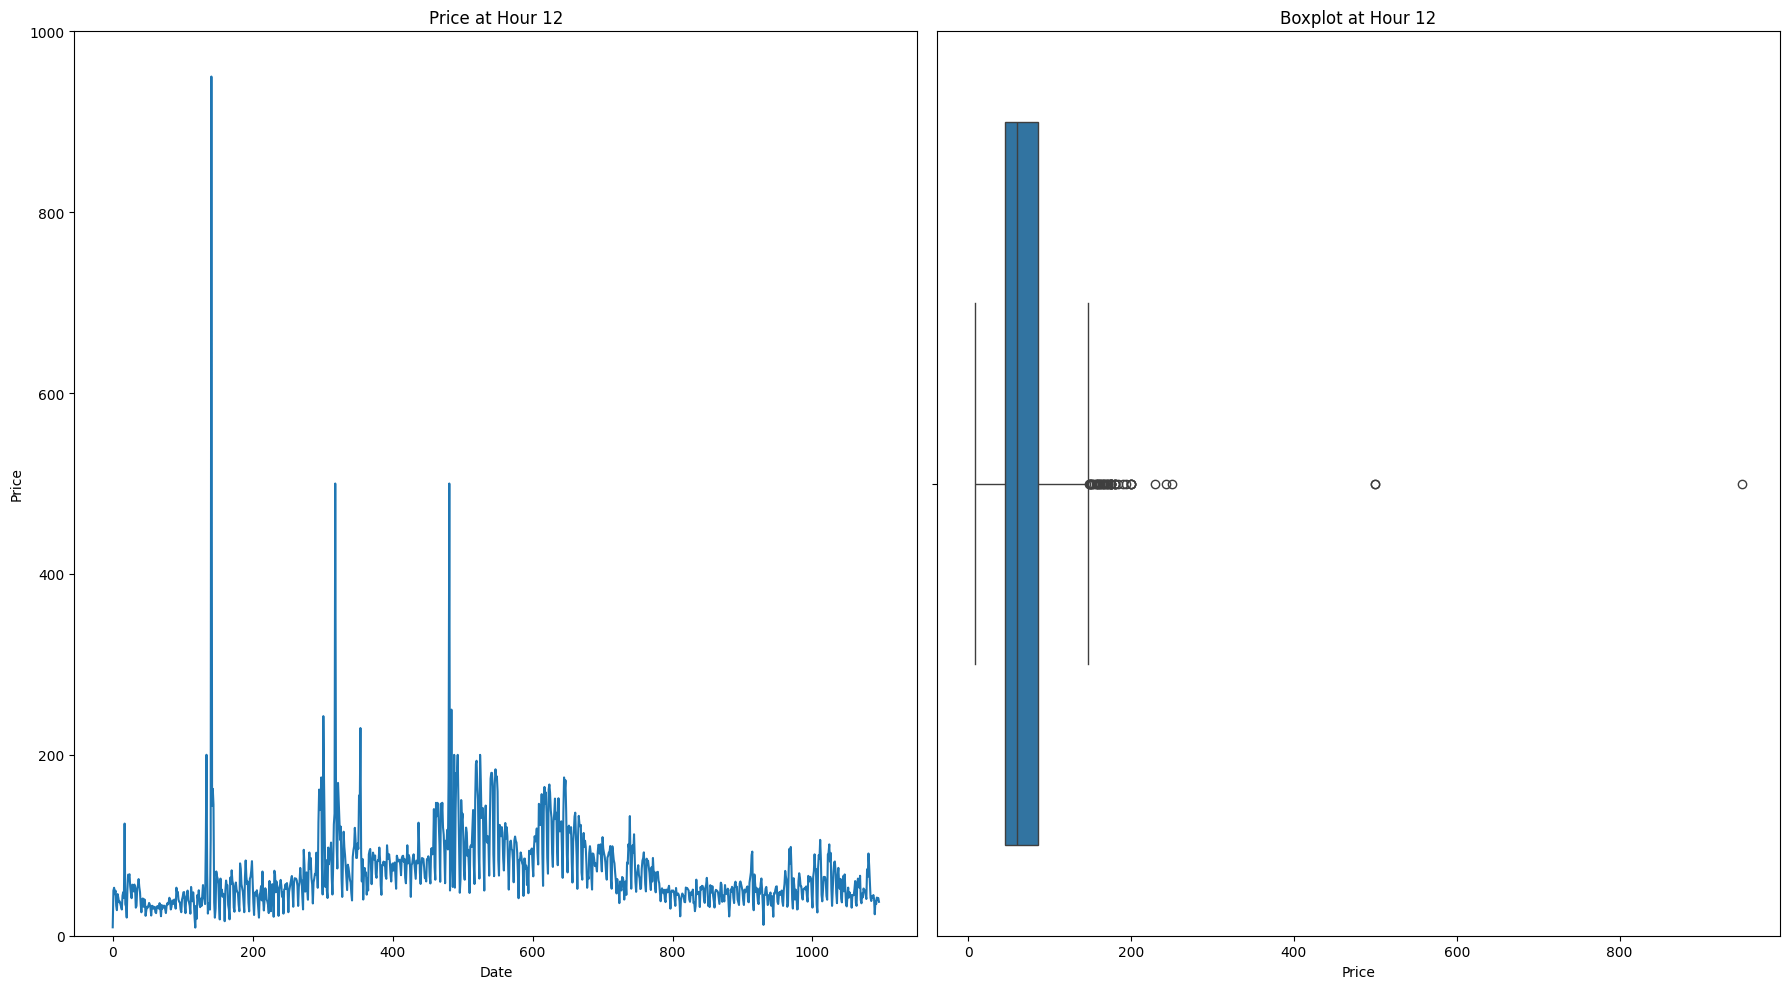

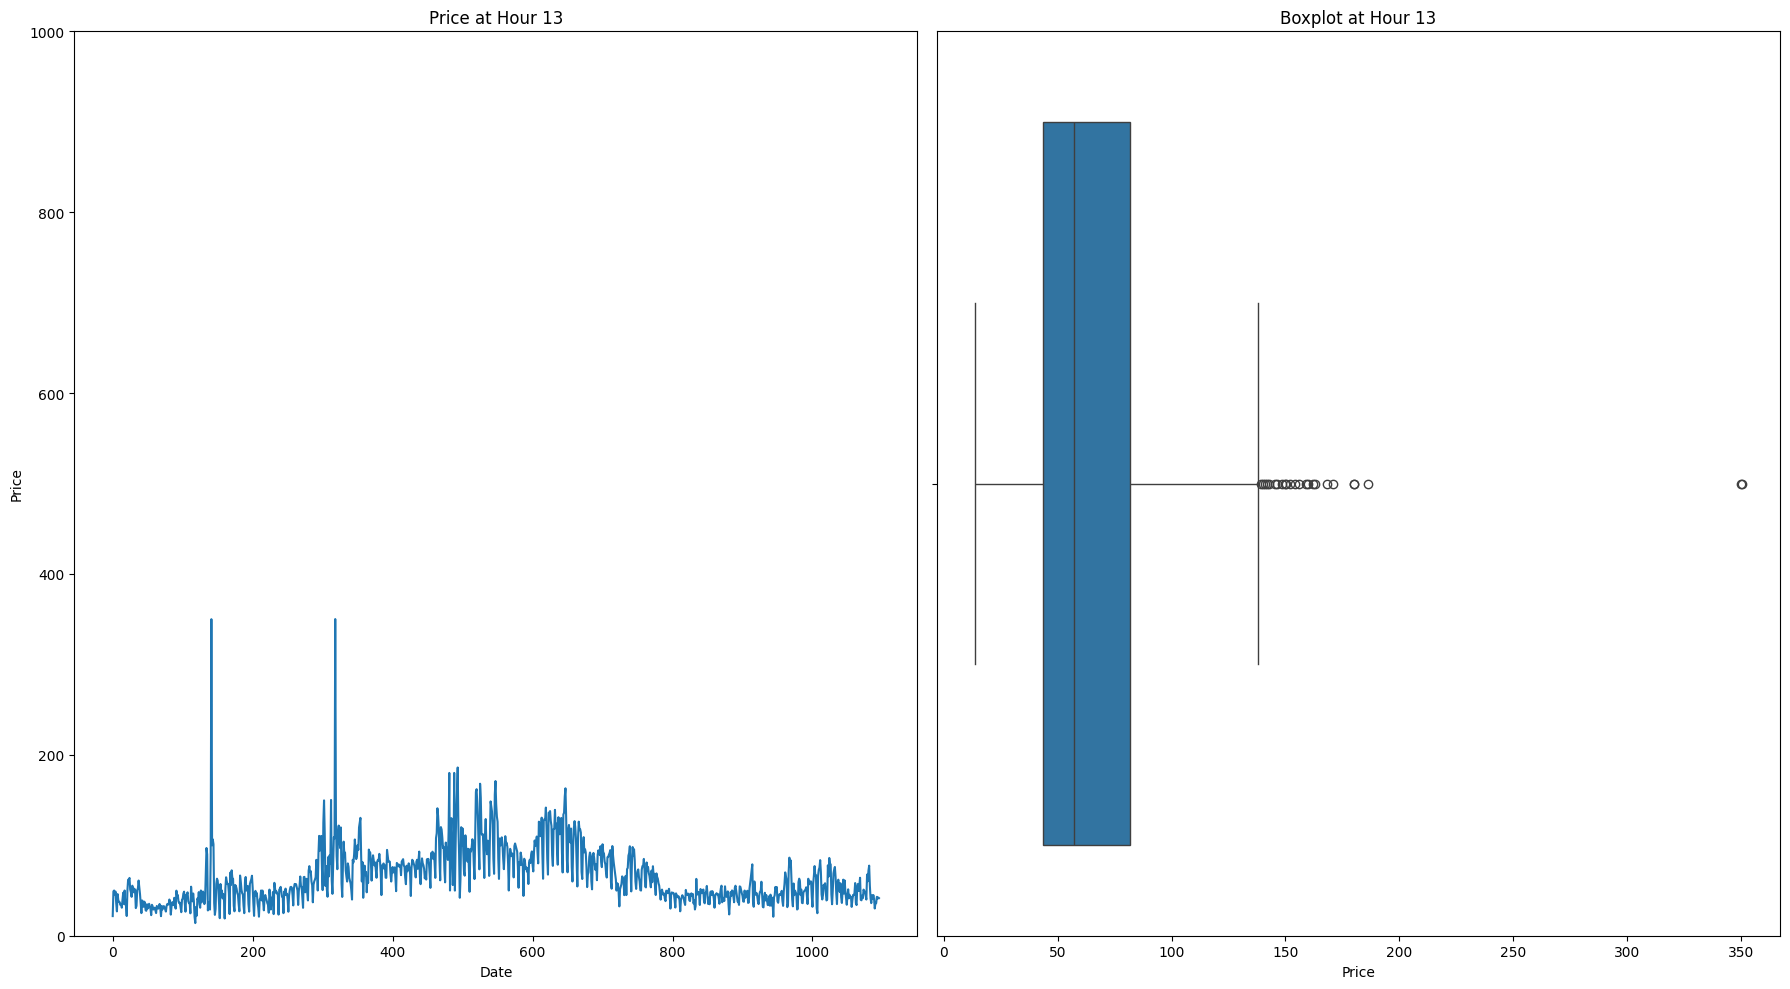

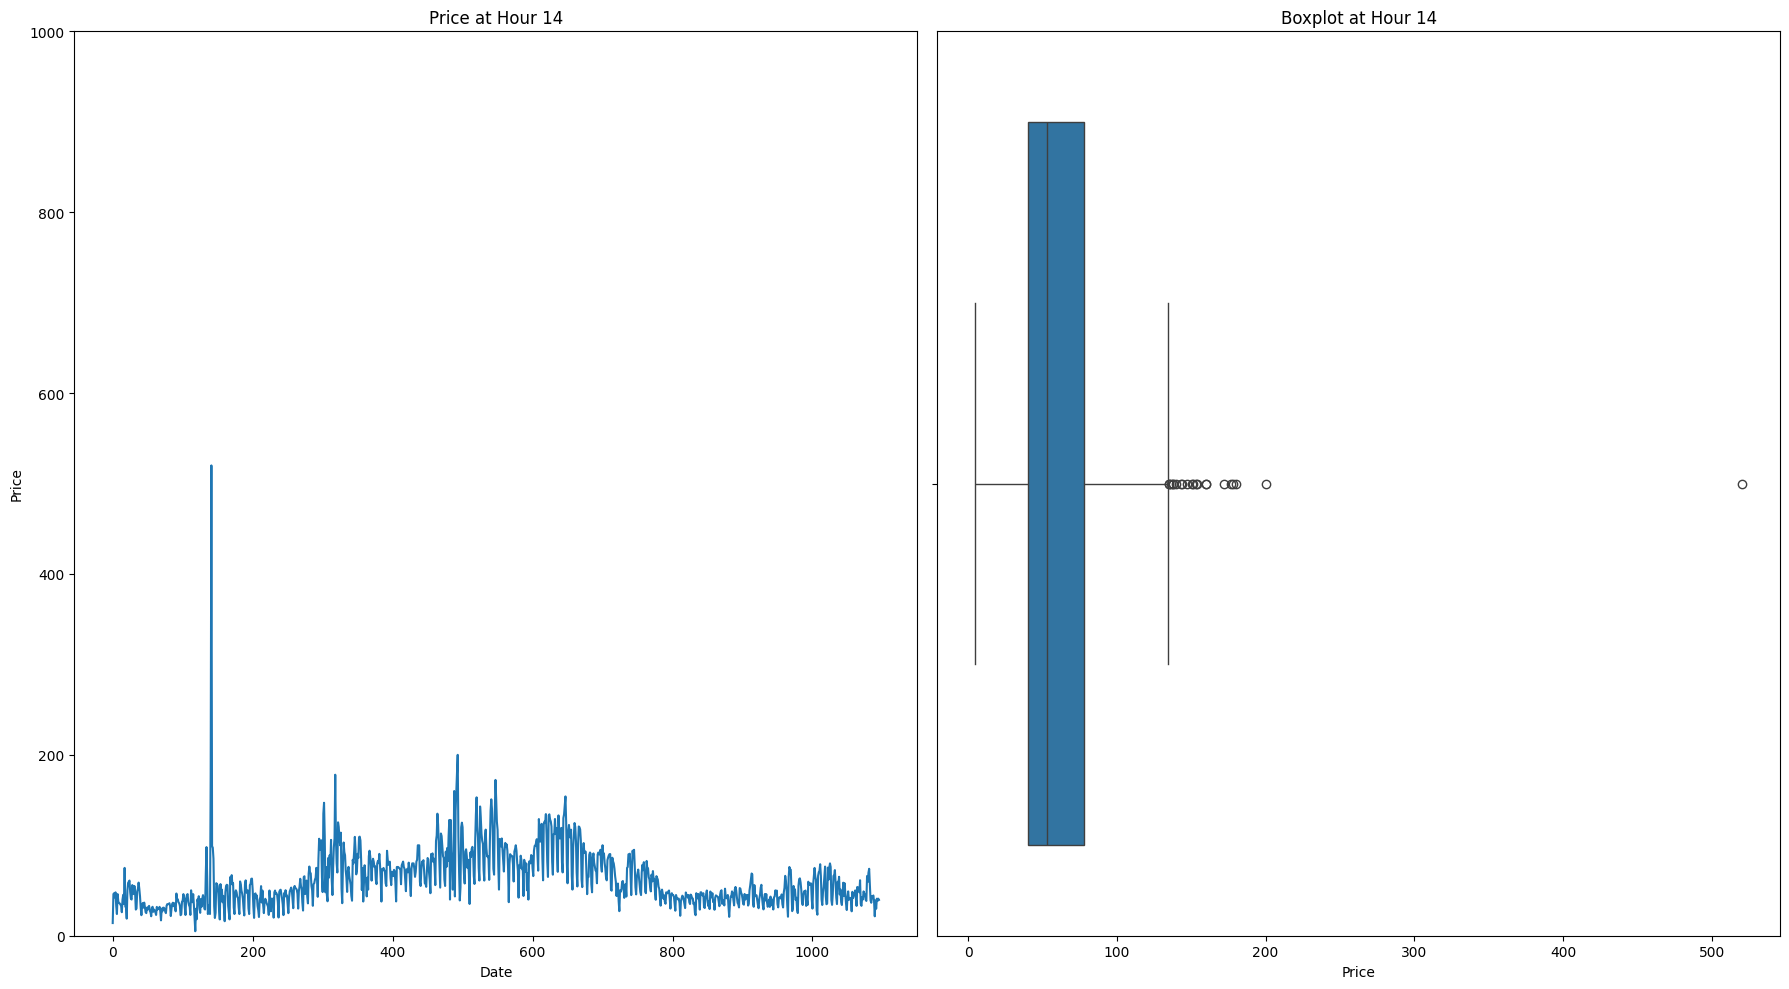

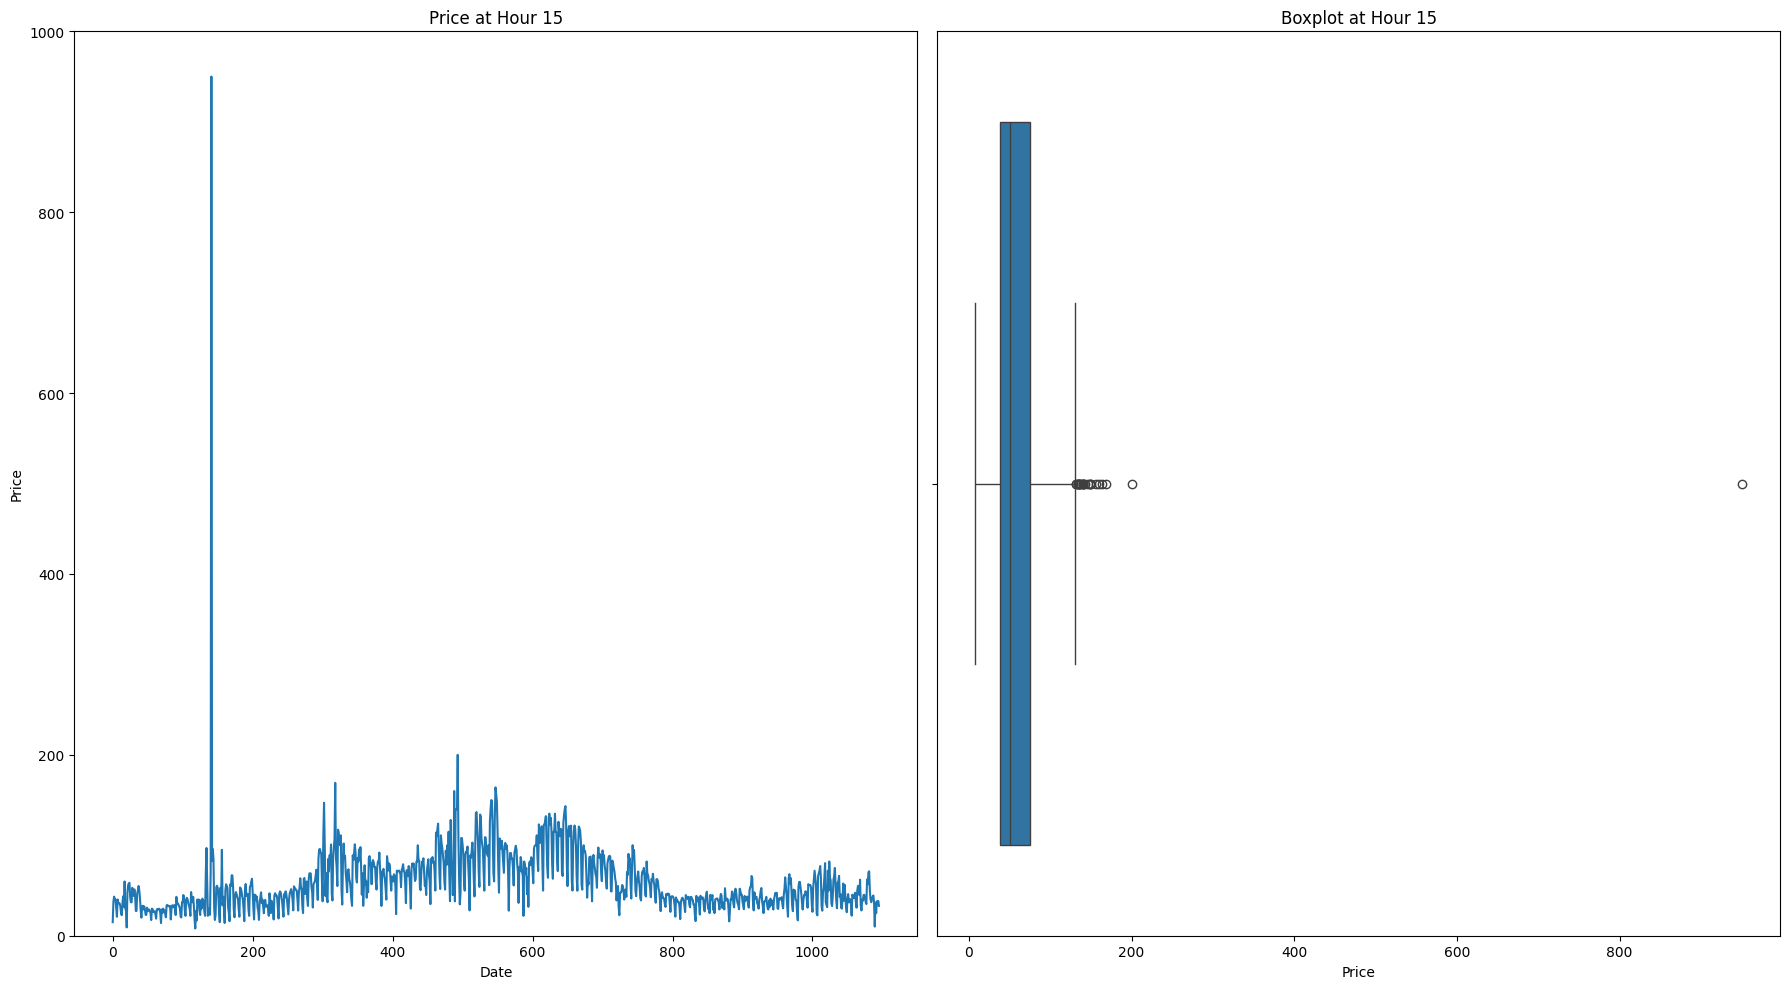

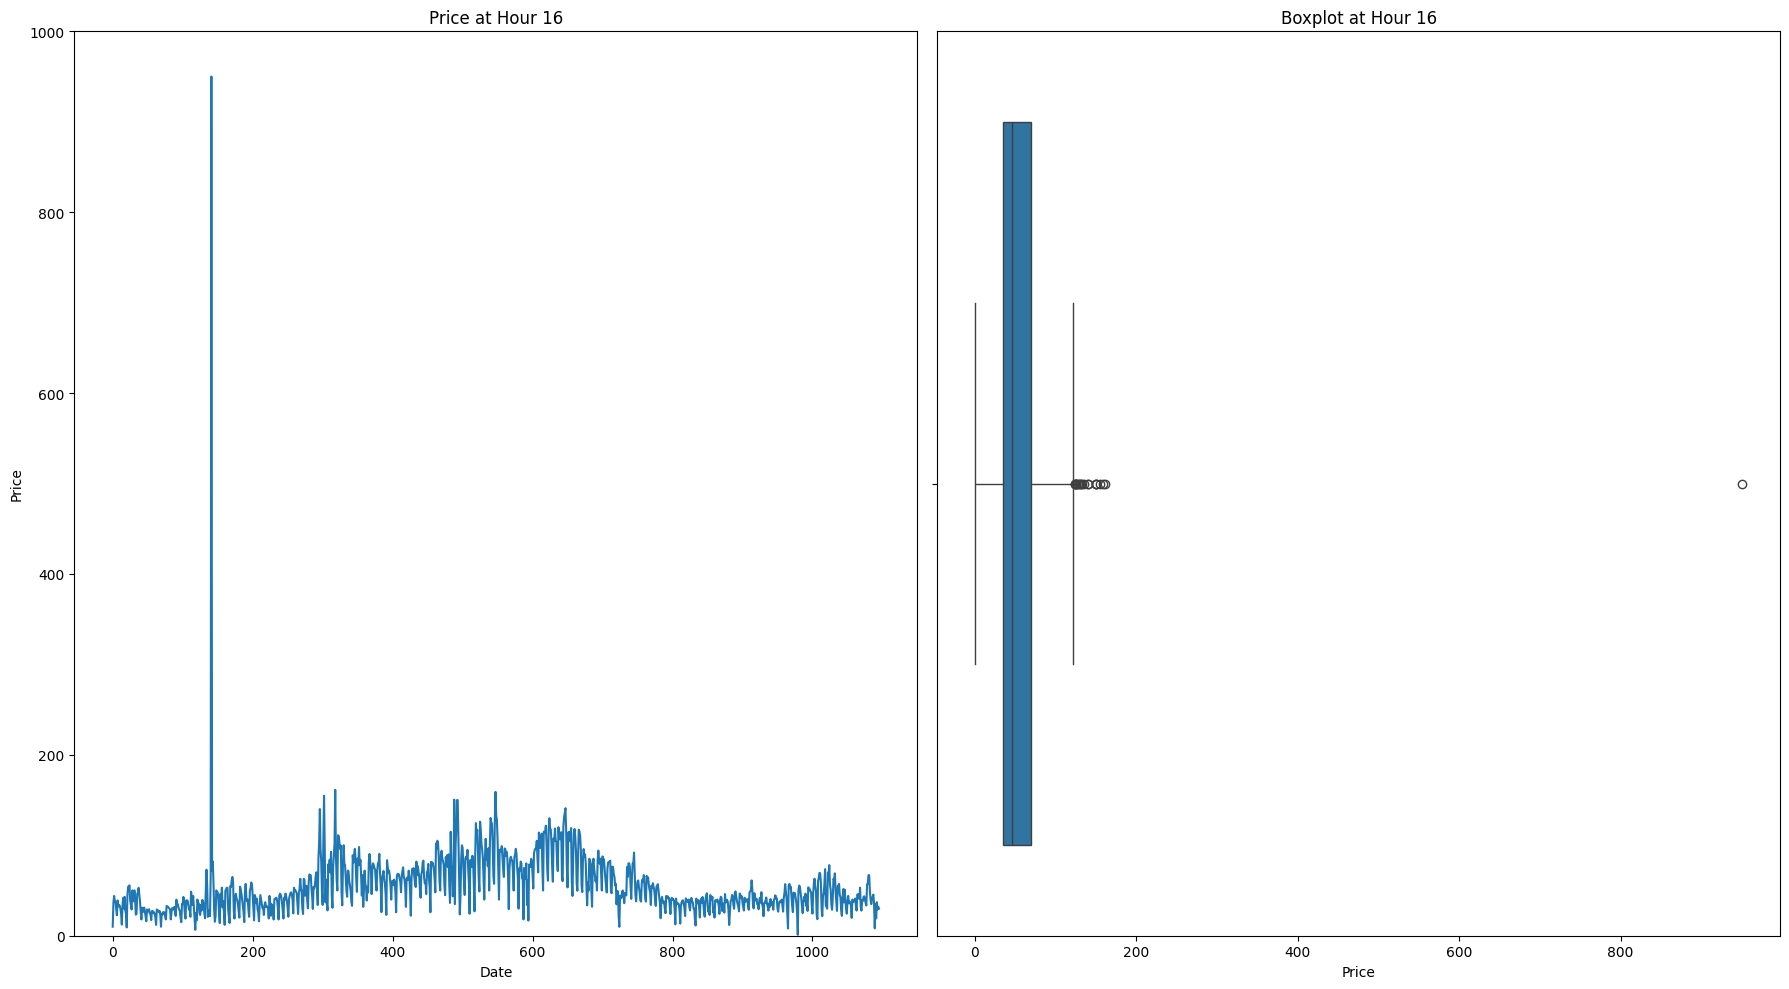

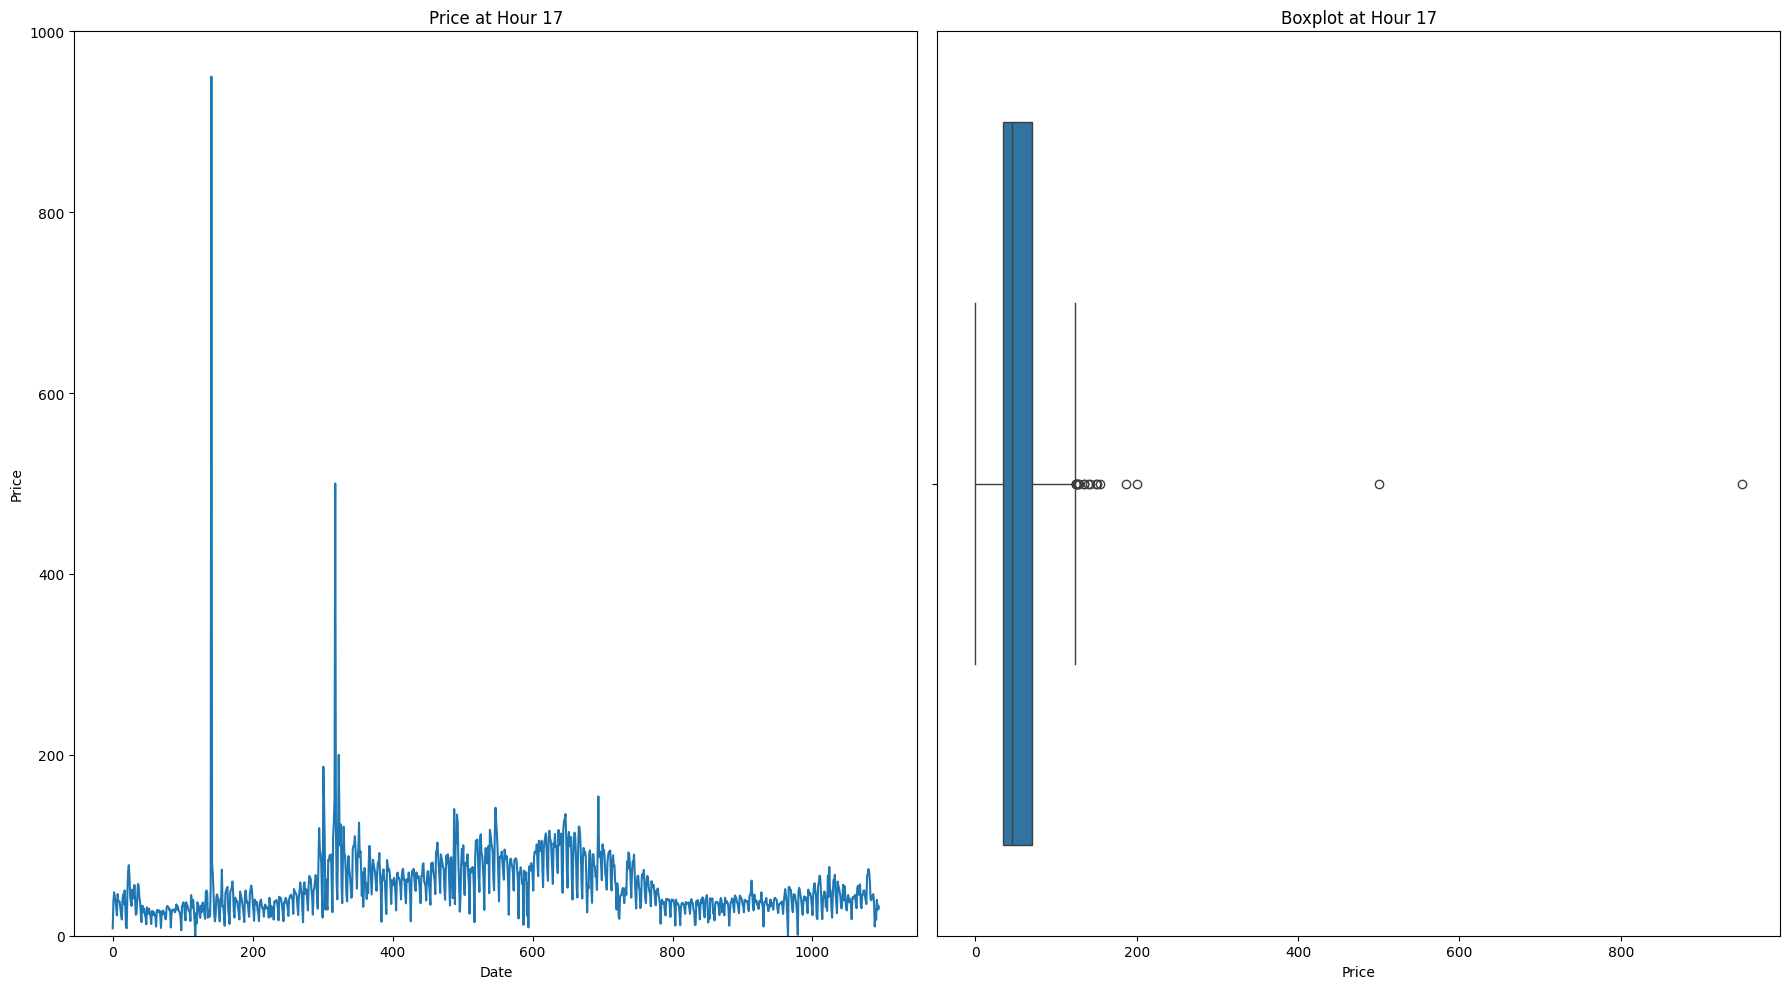

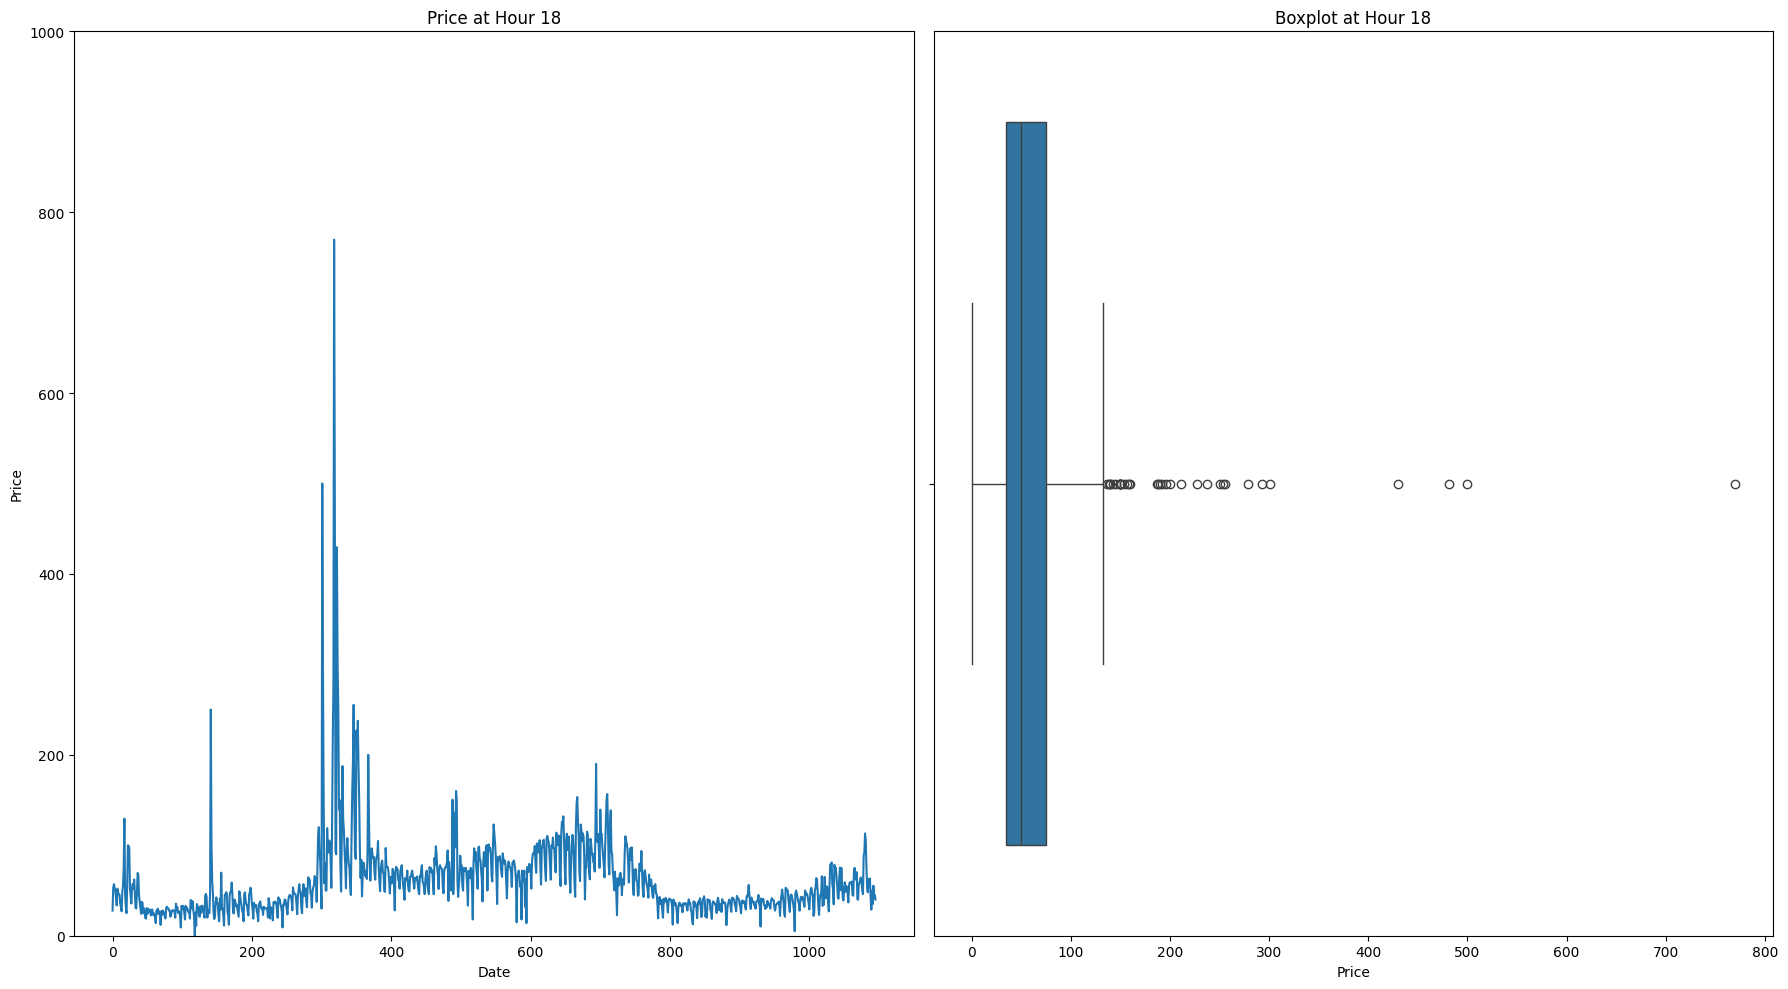

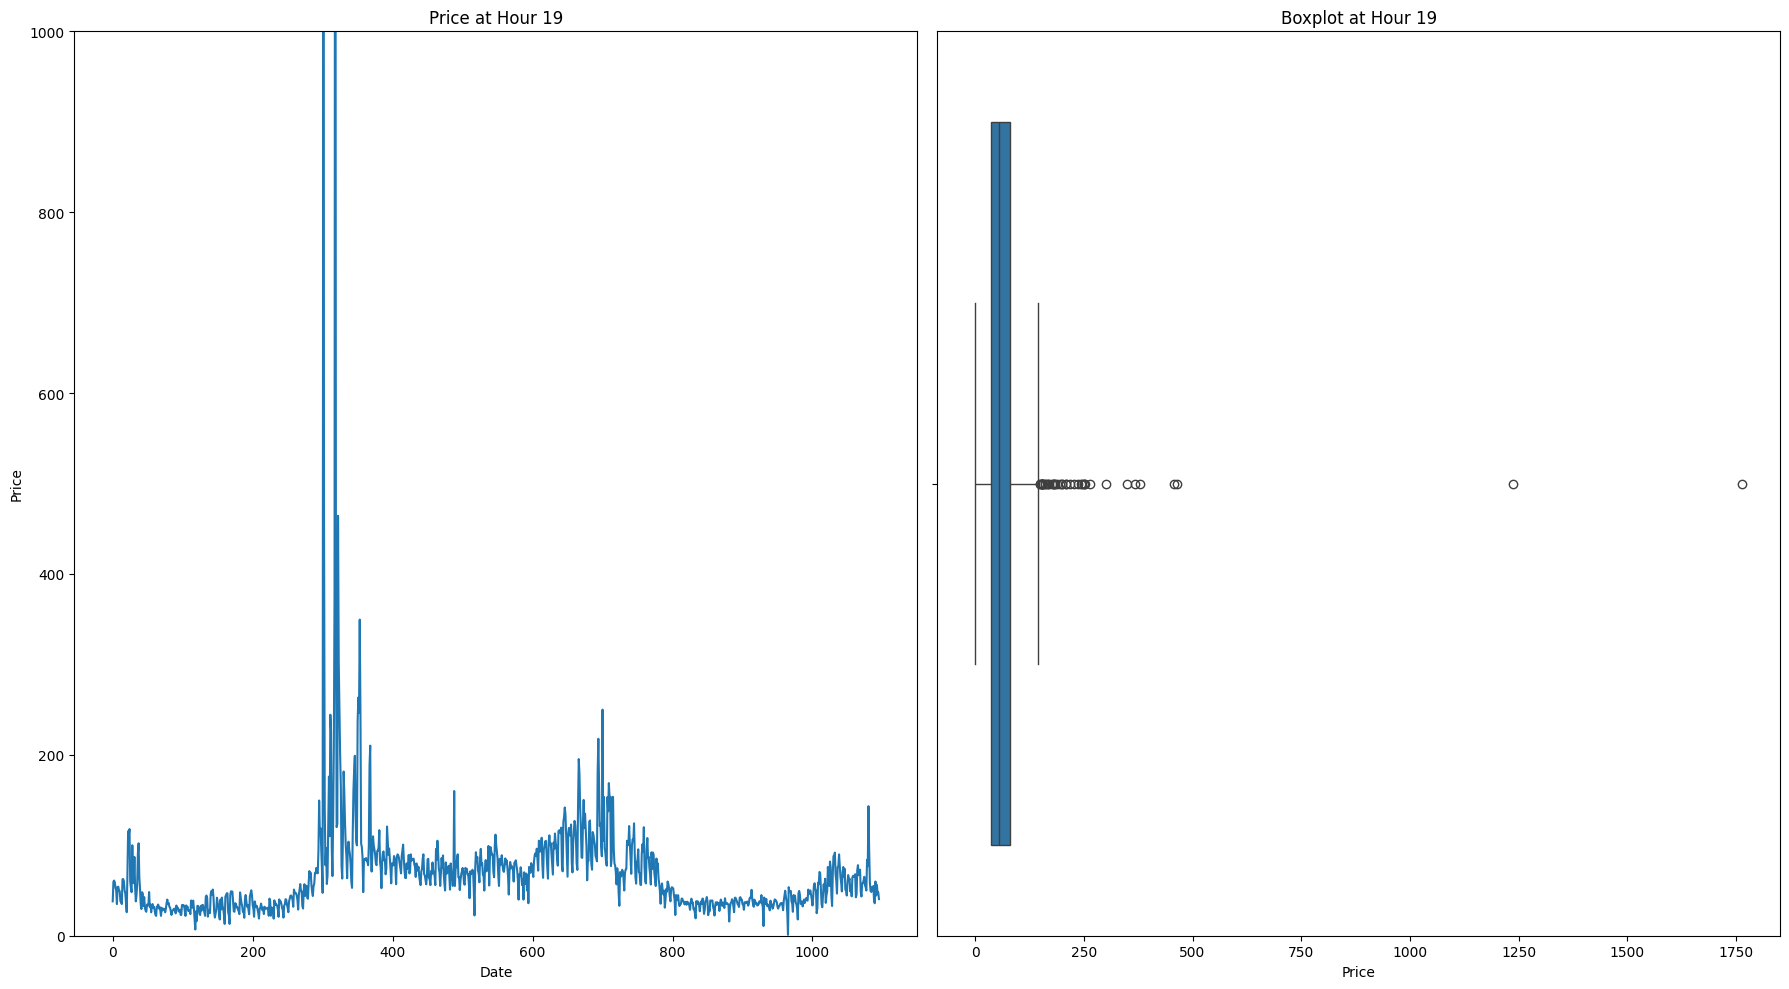

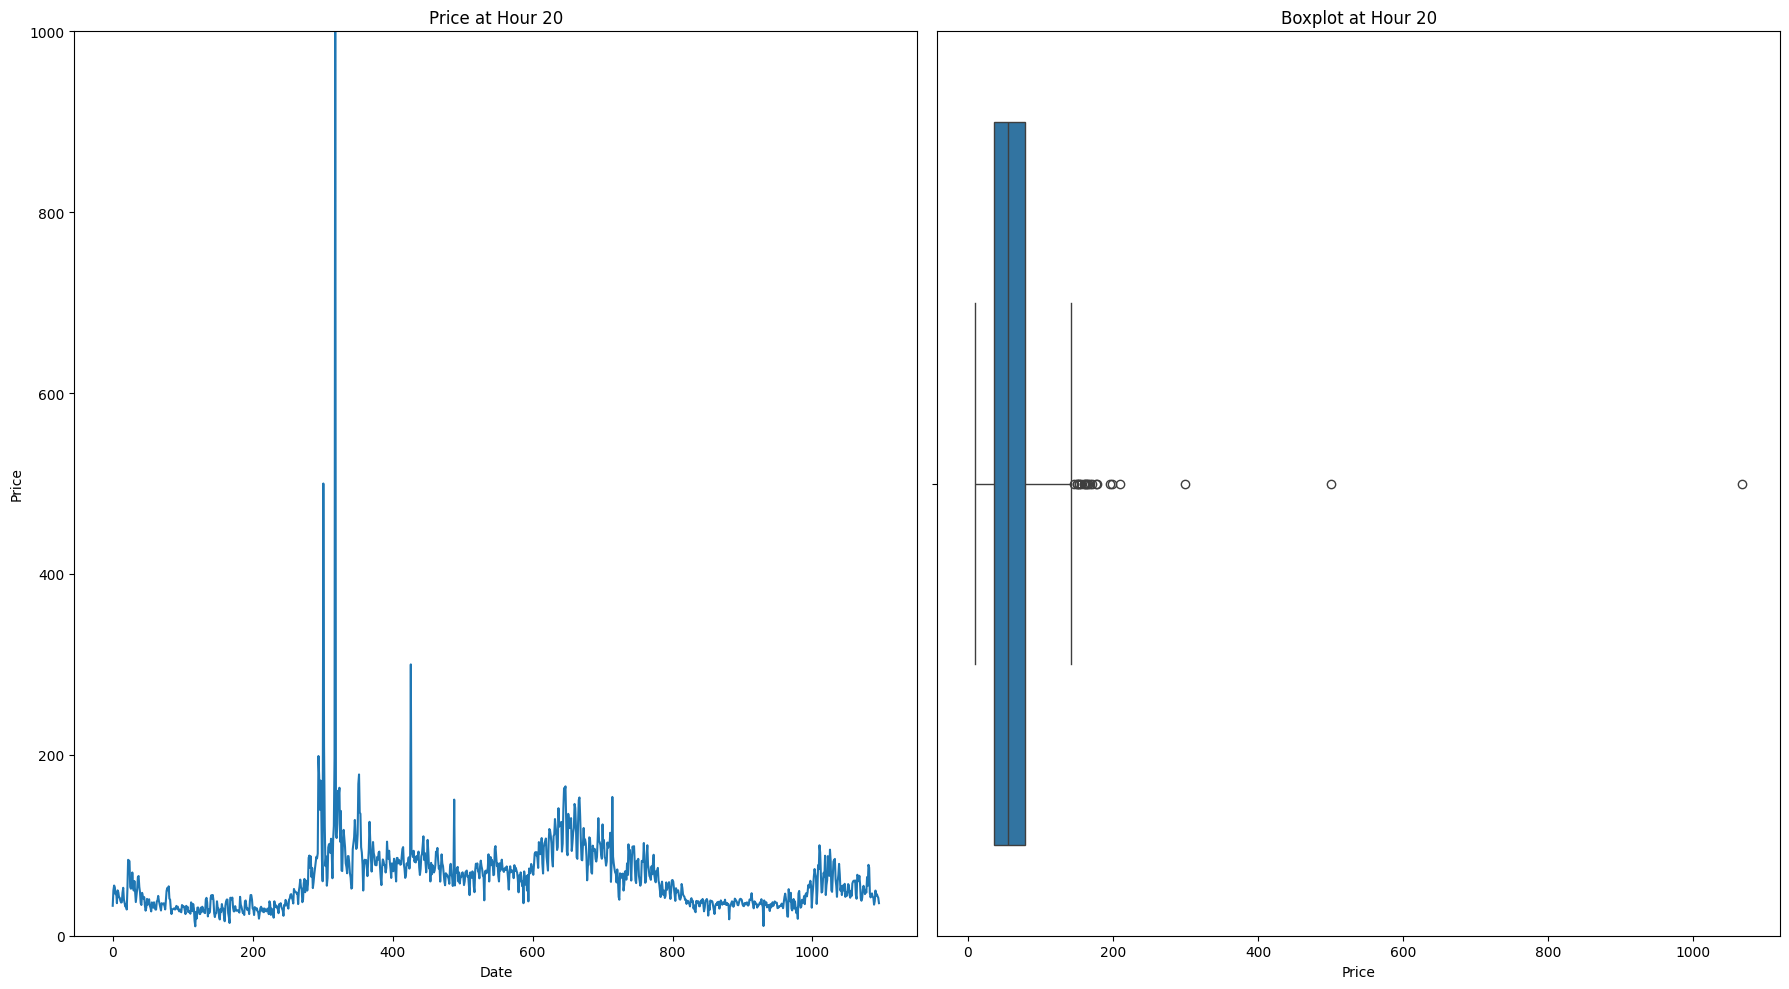

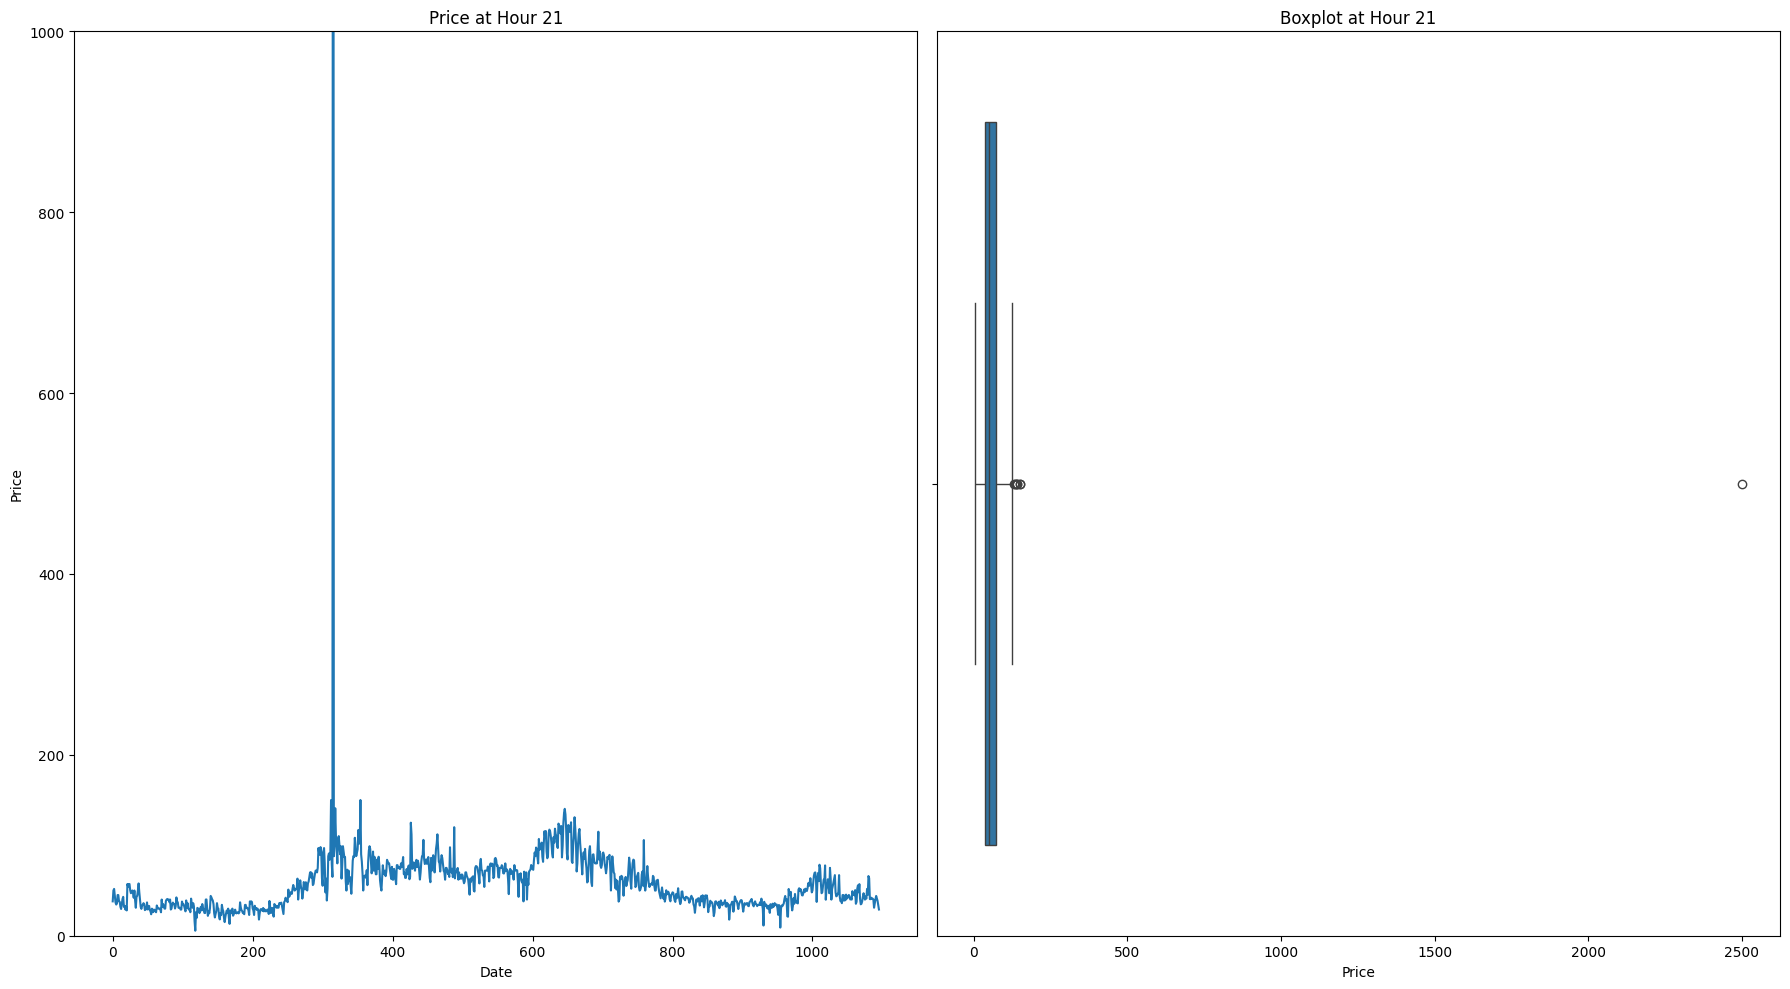

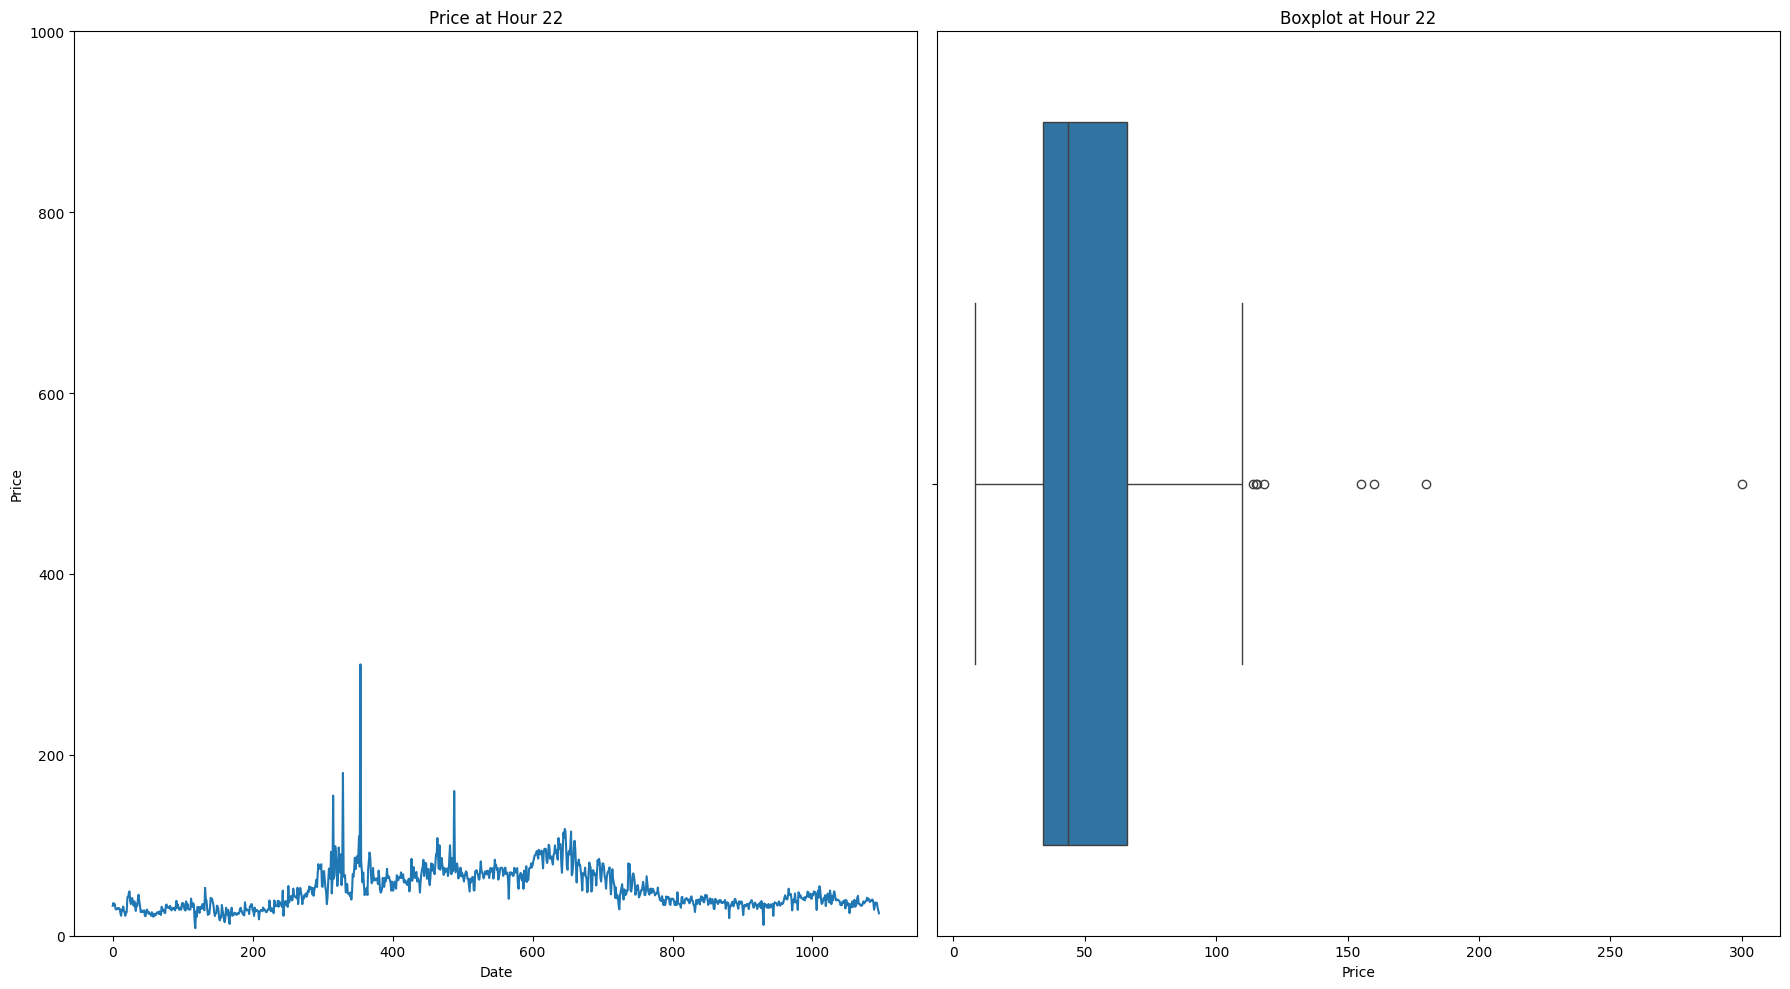

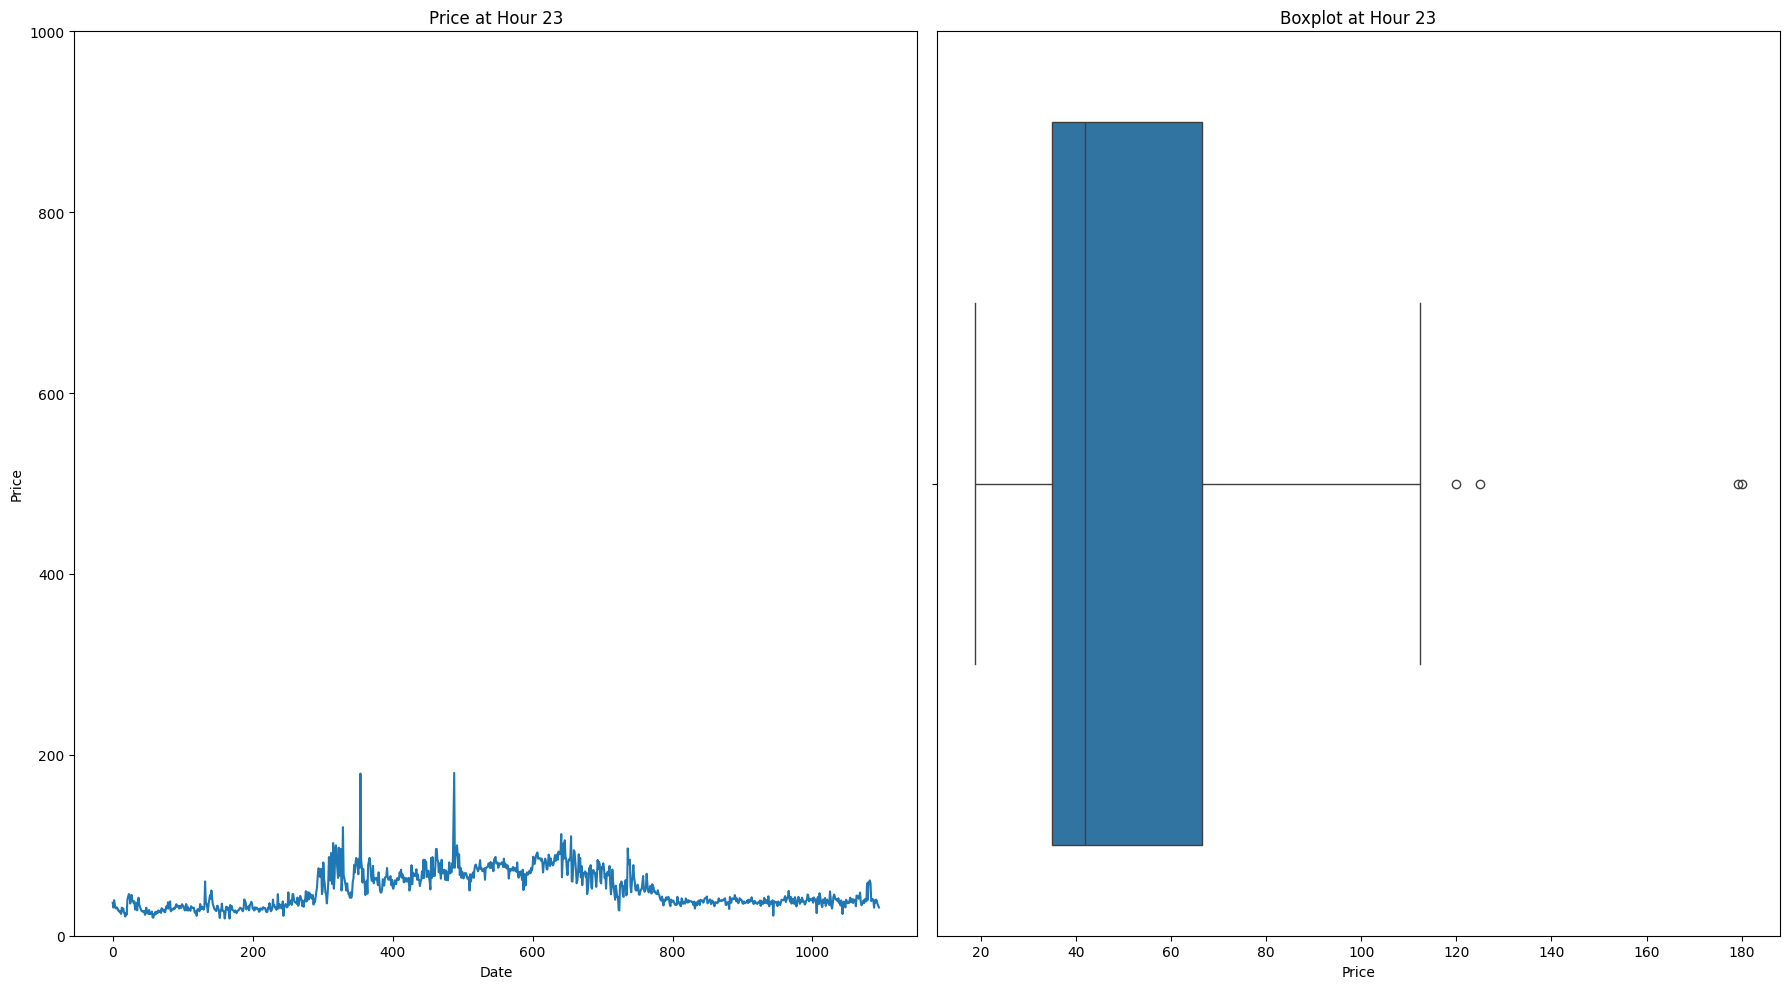

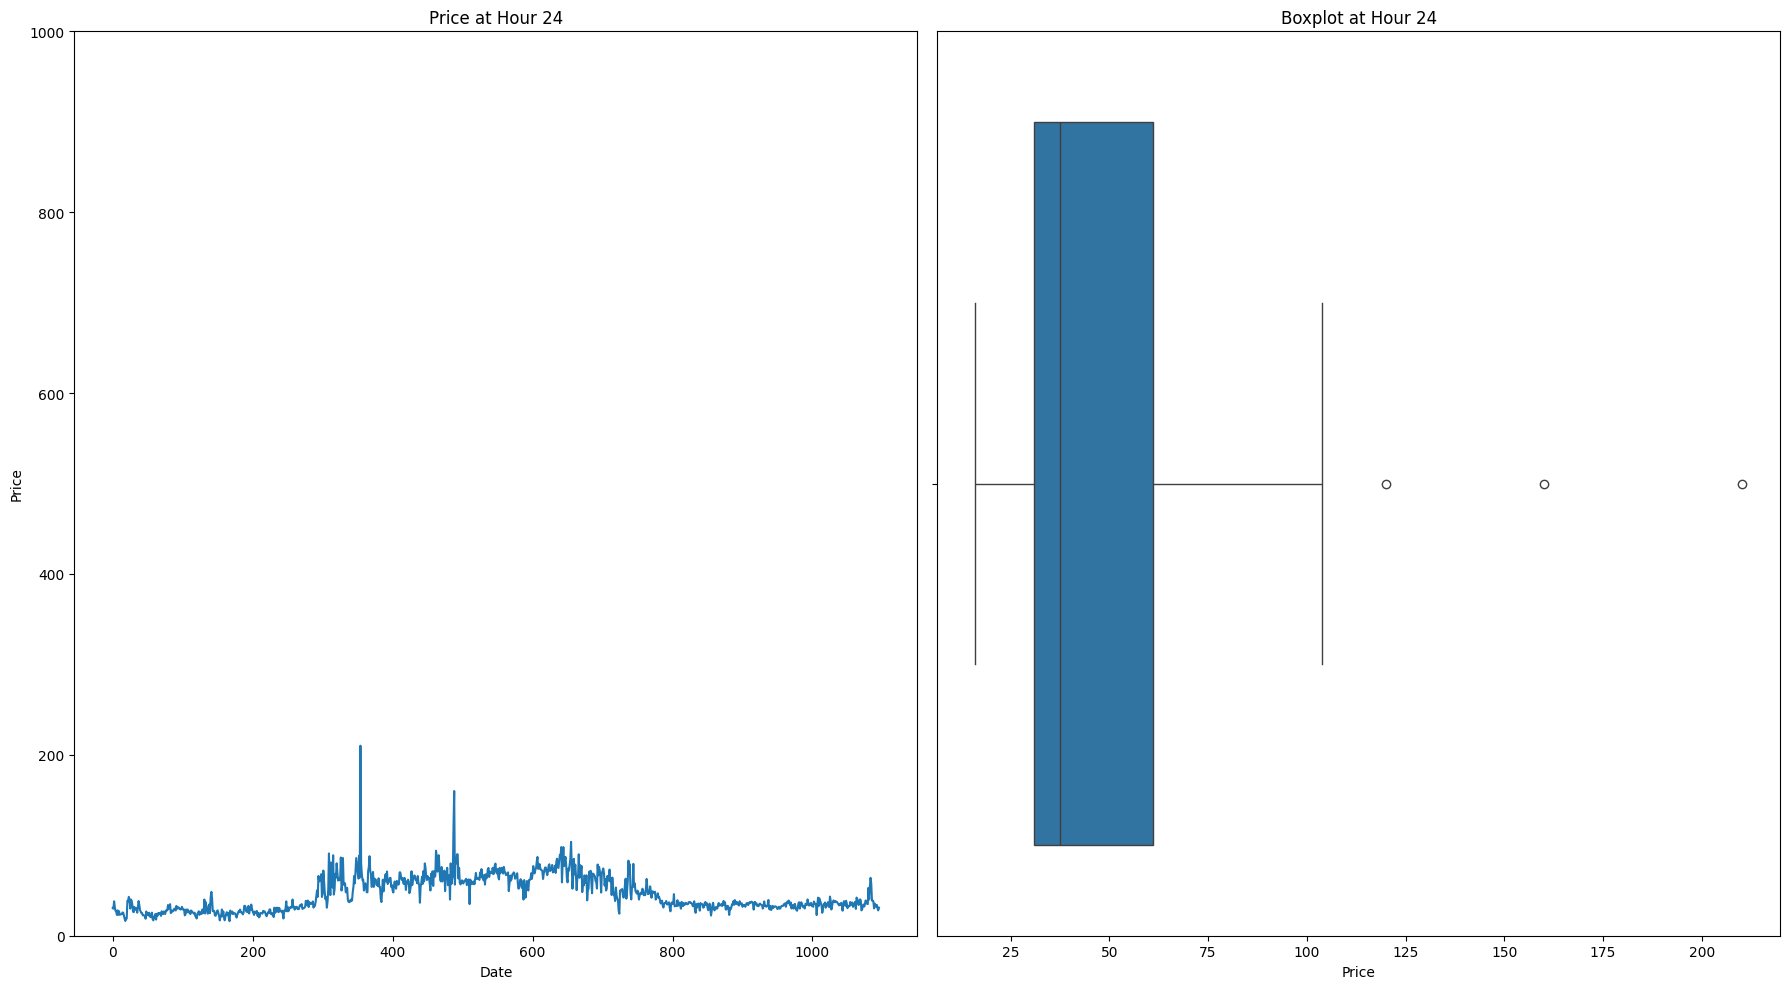

In [13]:
for i, hour in enumerate(train_data_without_date.columns, start=1):
    plt.figure(figsize=(18, 10))  # Set the figure size
    plt.subplot(1,2,1)  # Plot
    plt.plot(train_data[hour])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.ylim(0, 1000)
    plt.title(f'Price at {hour}')

    plt.subplot(1,2,2)  # Boxplot
    sns.boxplot(x=train_data[hour])
    plt.xlabel('Price')
    plt.title(f'Boxplot at {hour}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show all plots

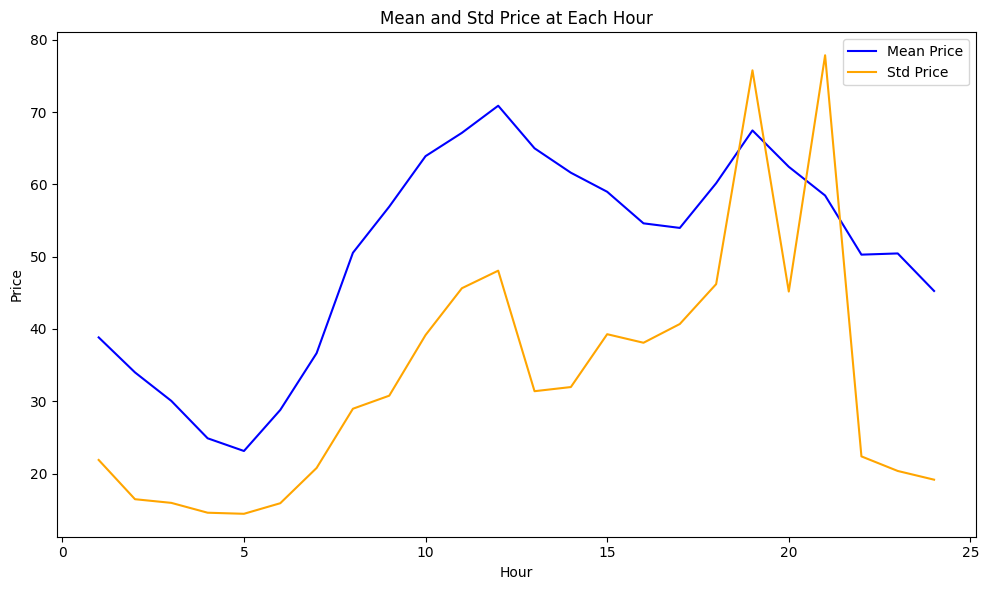

In [14]:
plt.figure(figsize=(10, 6))  # Set the figure size
x = list(range(1, 25))
y_mean = [train_data[f'Hour {i:02d}'].mean() for i in x]
y_std = [train_data[f'Hour {i:02d}'].std() for i in x]

plt.plot(x, y_mean, label='Mean Price', color='blue')  # Plot mean
plt.plot(x, y_std, label='Std Price', color='orange')  # Plot standard deviation
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Mean and Std Price at Each Hour')
plt.legend()  # Add a legend to differentiate the curves

plt.tight_layout()
plt.show()

What did we notice so far? 

price during late night (02-06) are low, around noon (11-13) is the highest, also high in the evening (18-21). <br>
There are extreme values in the price in the evening, as we see in the boxplot and sparks of std of these hours. <br>
An average, the price is the lowest at Hour 05, and the highest at Hour 12. <br>
Highest price in the history happened at Hour 21 on 2007-11-12 (2500 USD). <br>
Lowest price in the history happened at Hour 01 on 2009-10-04 and 2009-10-12 (0.01 USD). <br><br>

We do another analysis after removing the outliers to see if this result is robust.




Hour 01

Number of outliers: 32

Mean: 38.838120437956206, Std: 21.88488689192246



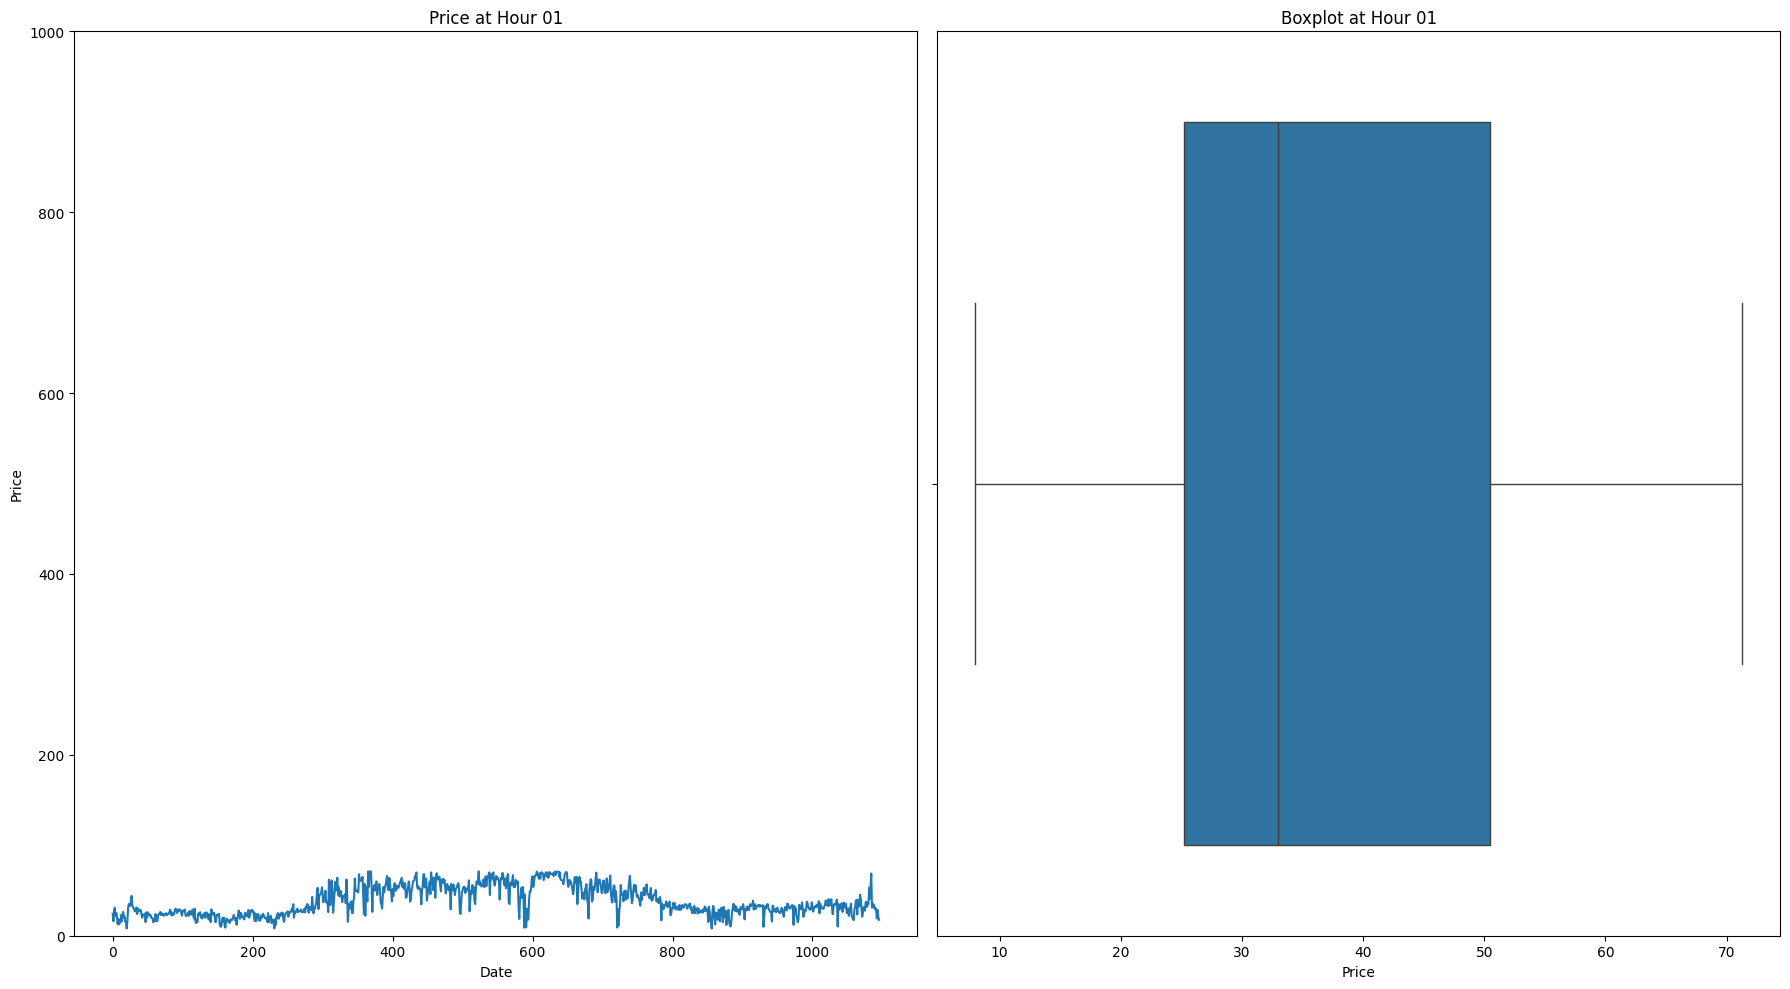

Hour 02

Number of outliers: 122

Mean: 33.99355839416059, Std: 16.453506526167384



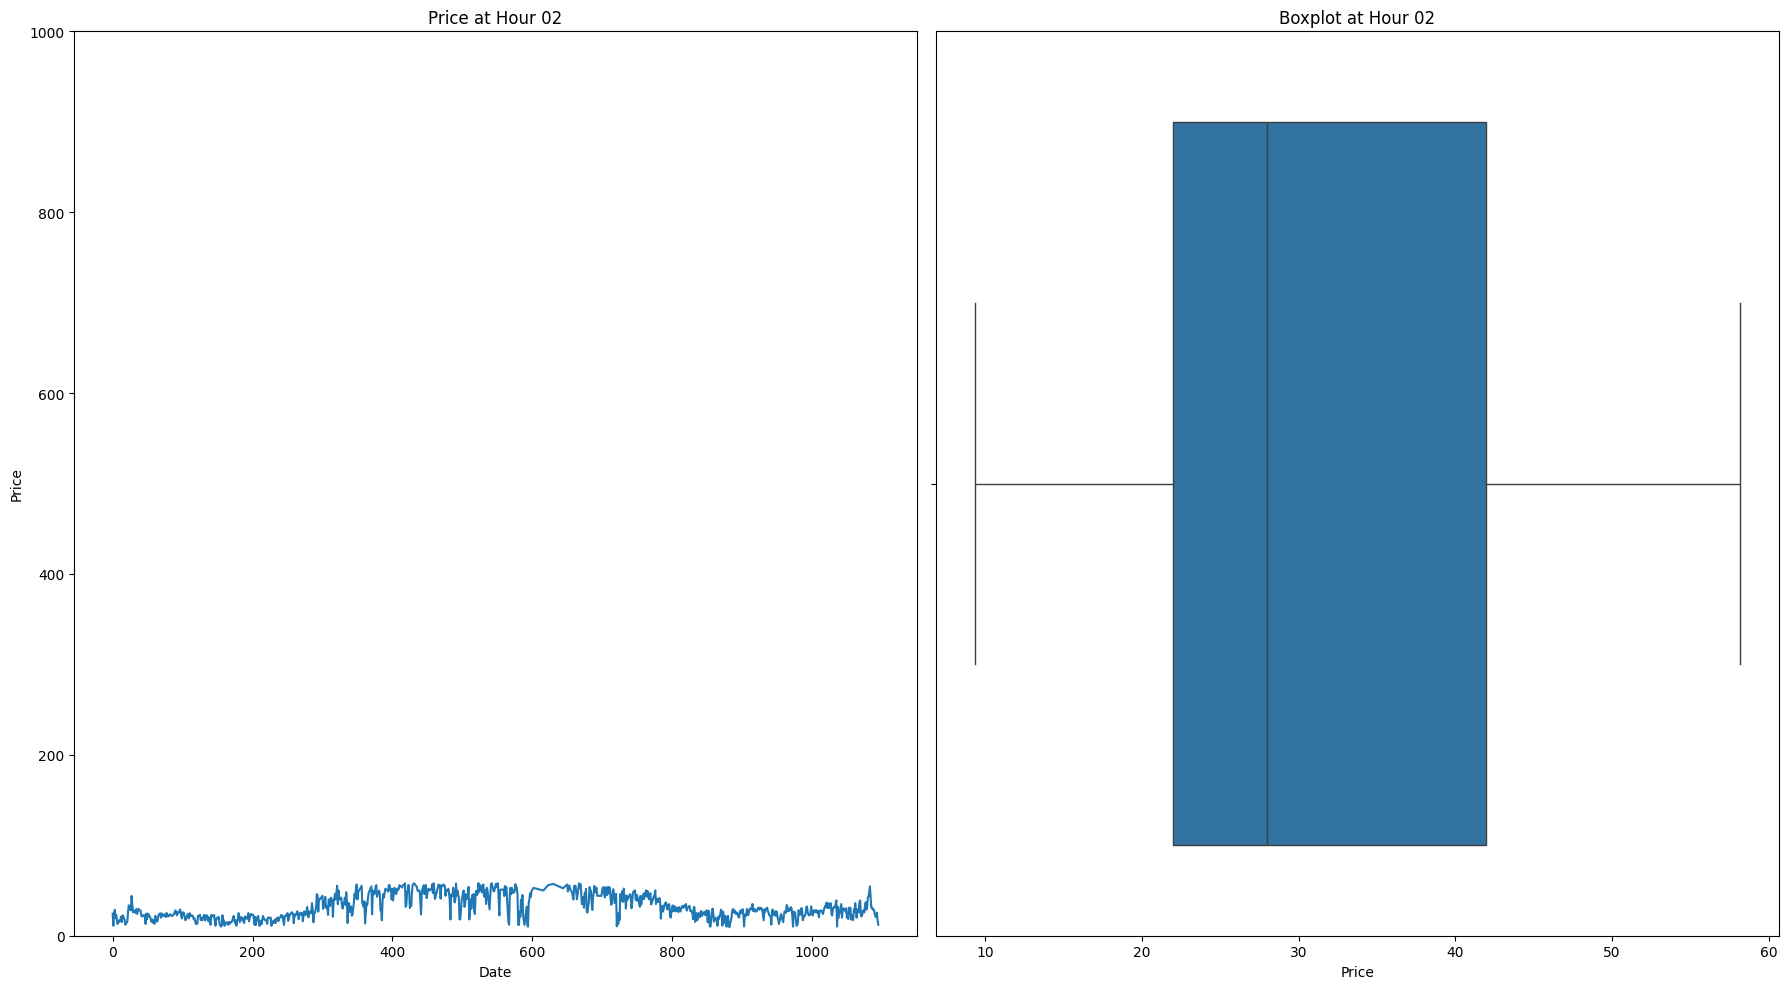

Hour 03

Number of outliers: 110

Mean: 30.05389598540146, Std: 15.947602309416549



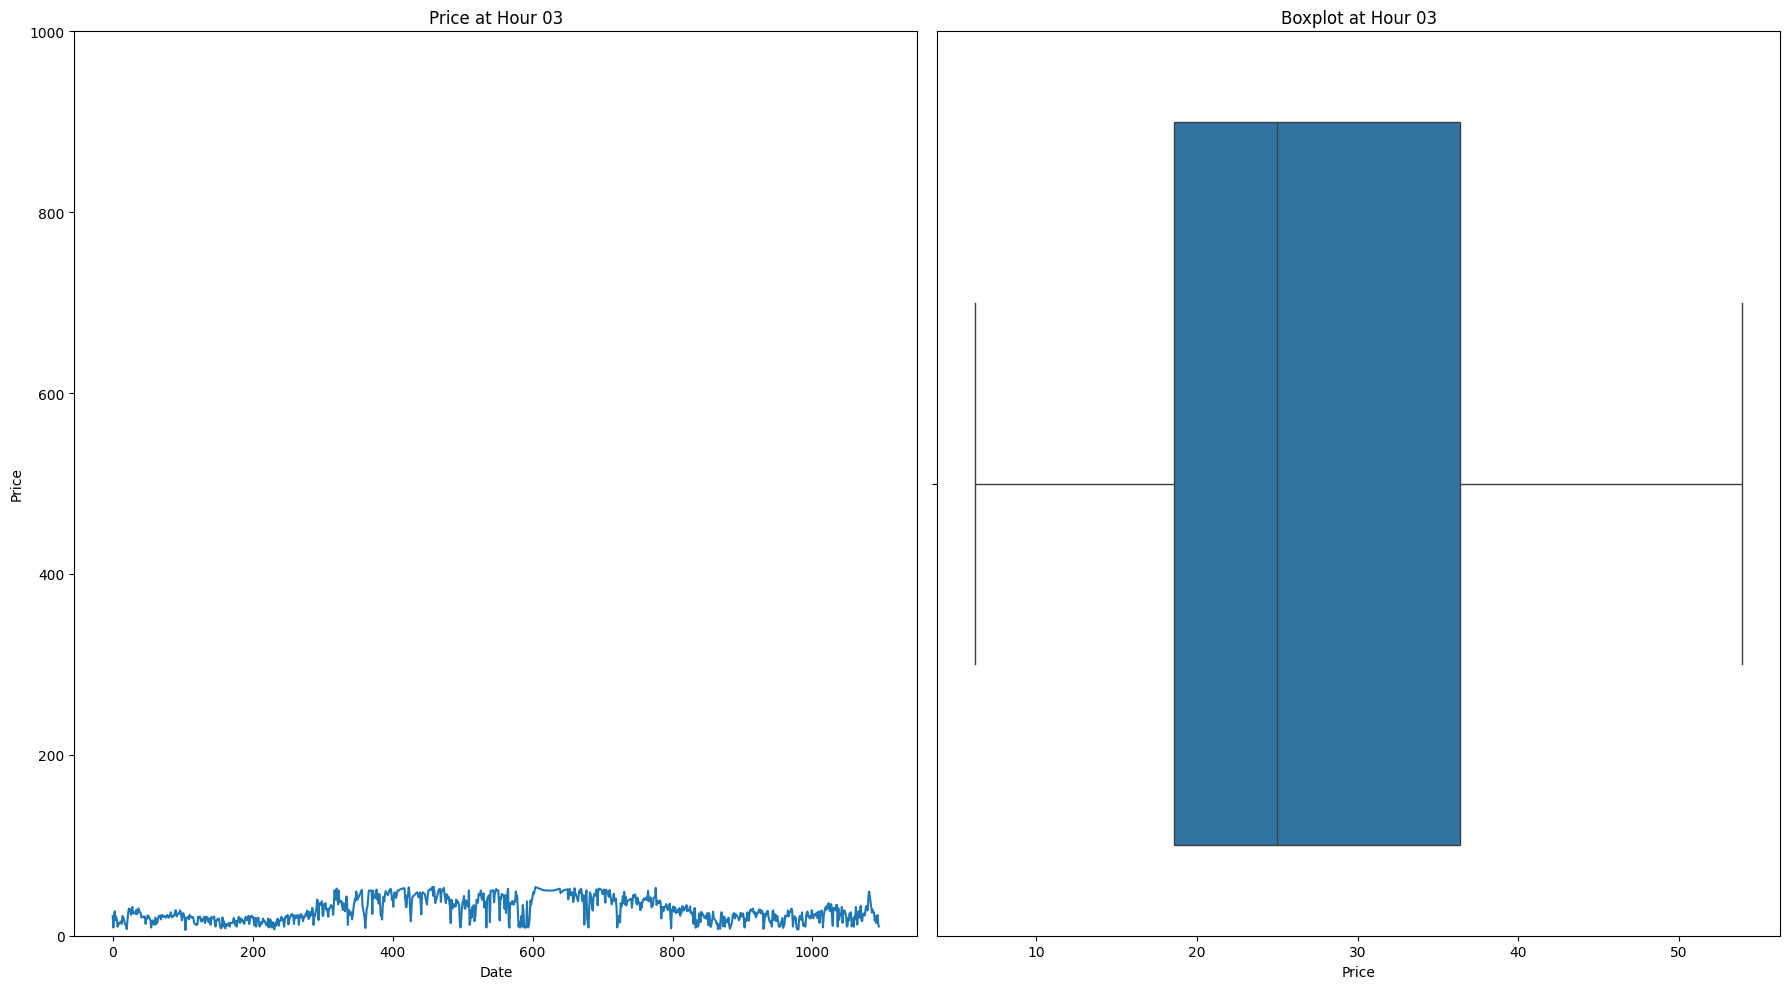

Hour 04

Number of outliers: 123

Mean: 24.881167883211678, Std: 14.58549816172457



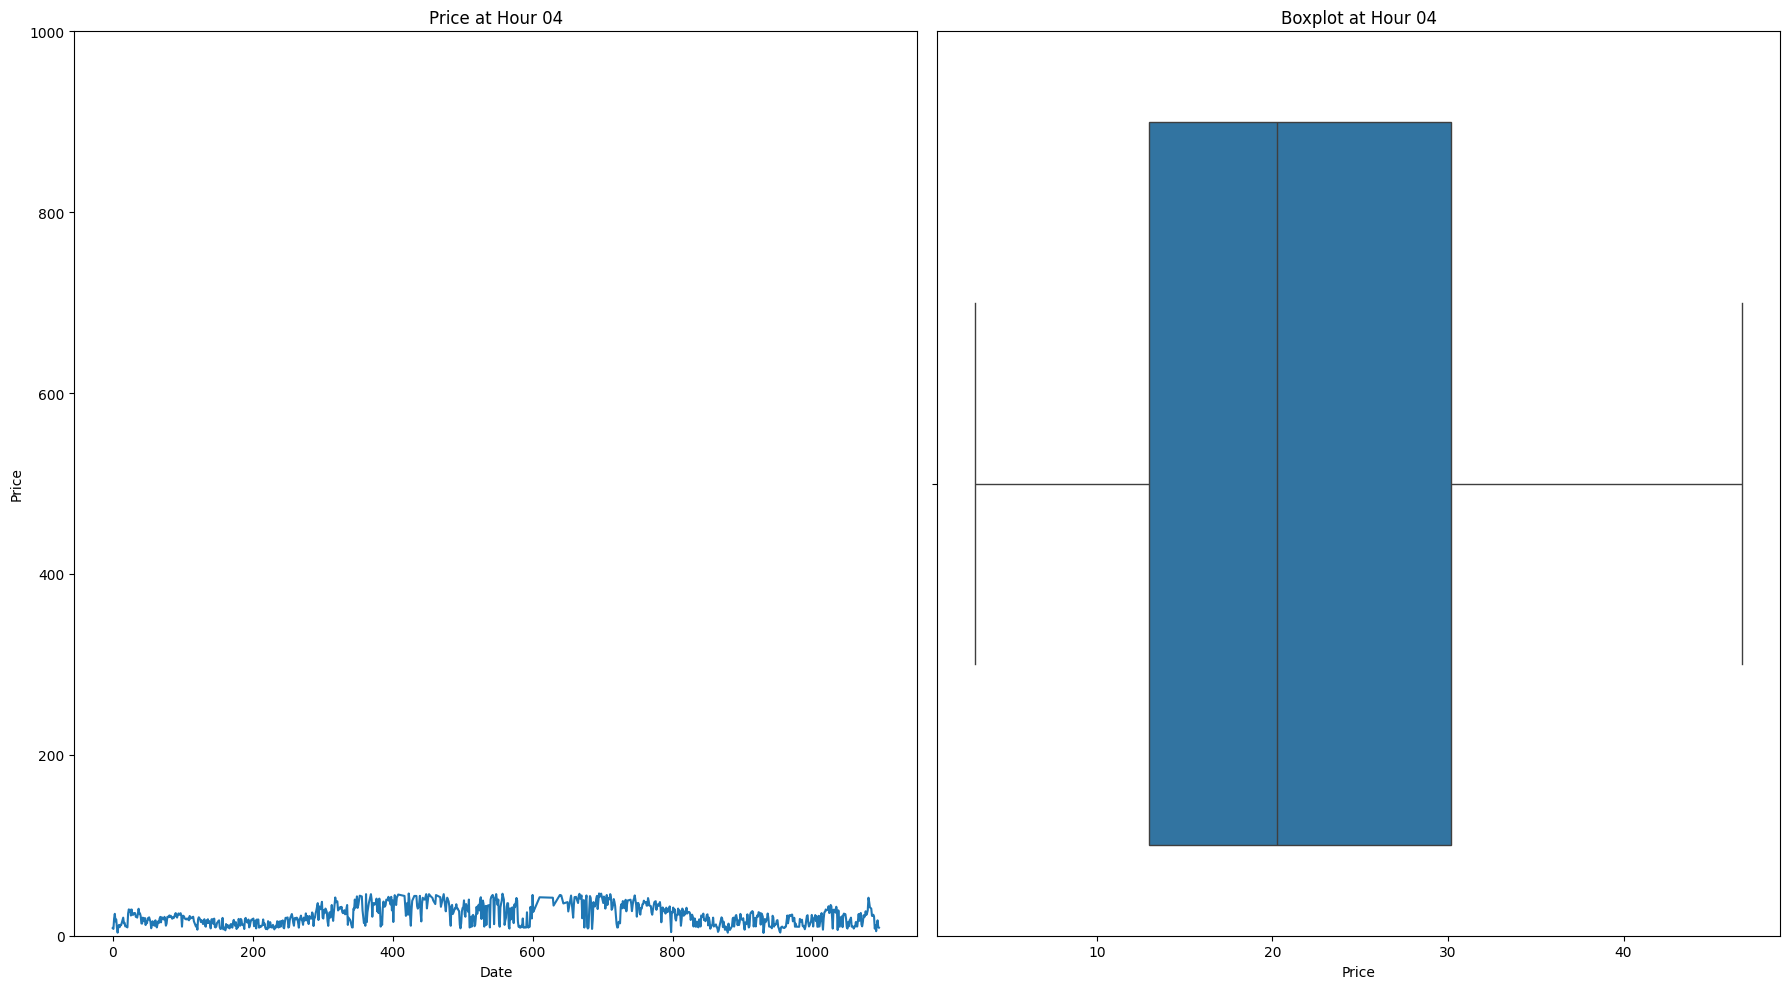

Hour 05

Number of outliers: 133

Mean: 23.12443430656934, Std: 14.436540037840562



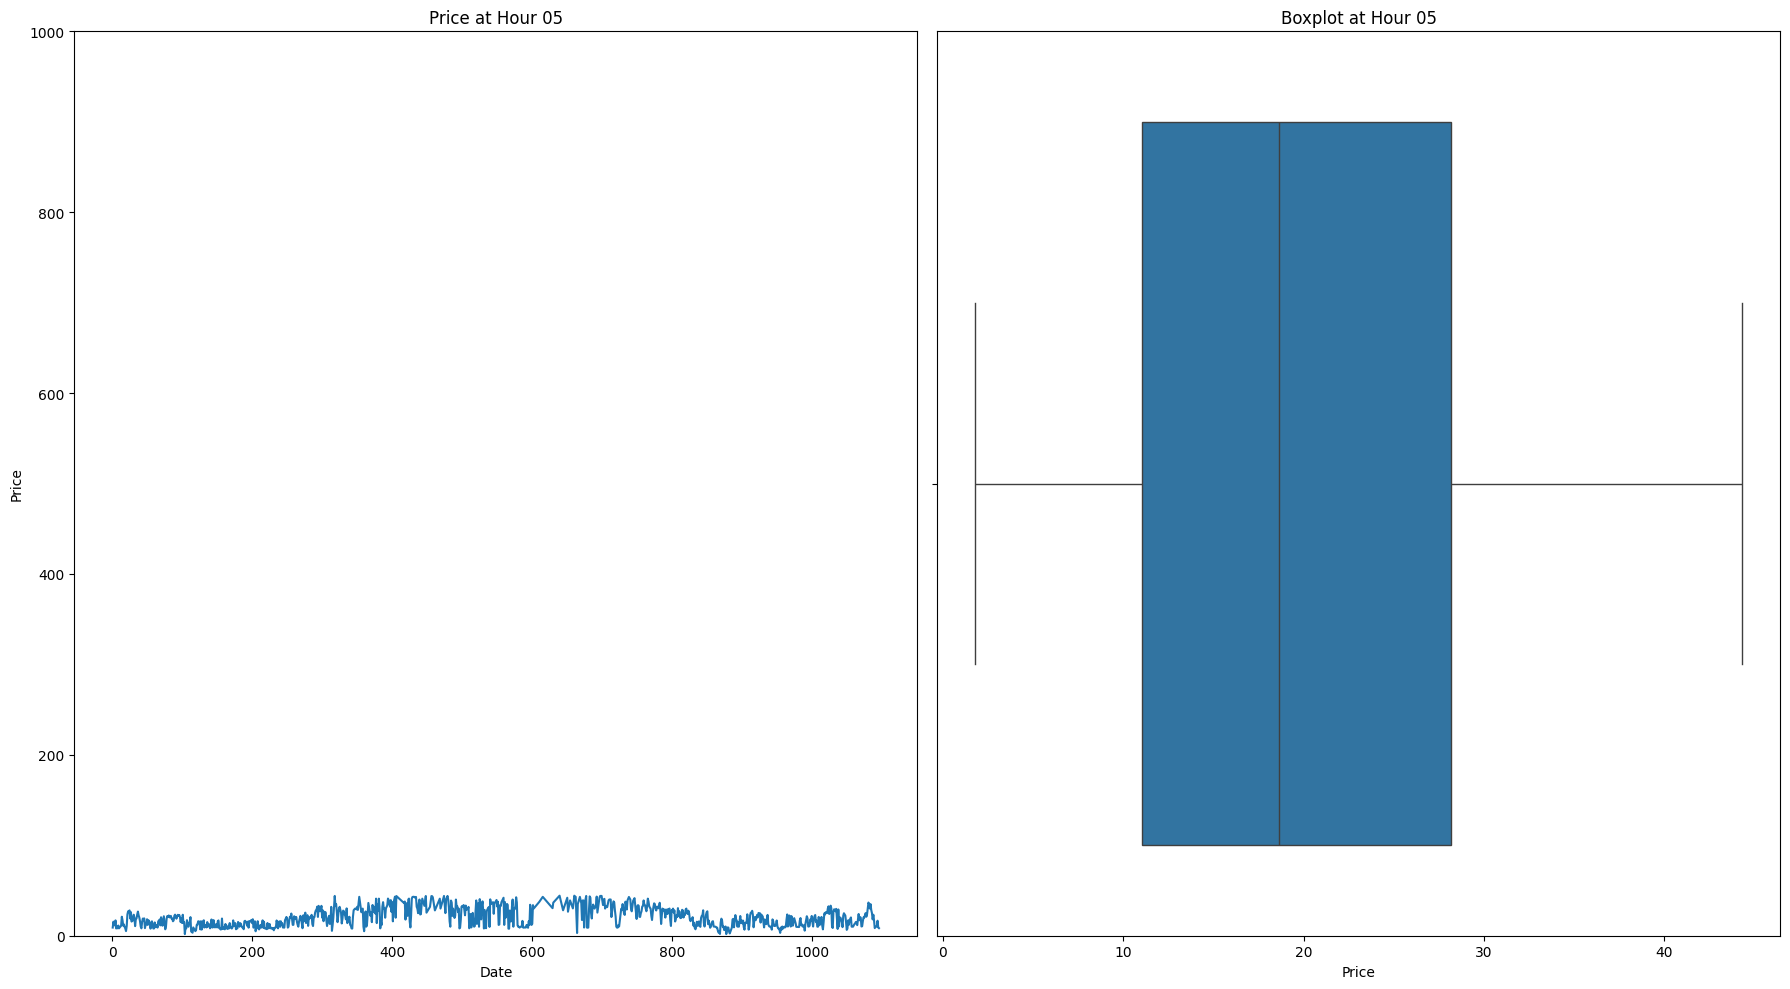

Hour 06

Number of outliers: 120

Mean: 28.80376824817518, Std: 15.899612761636252



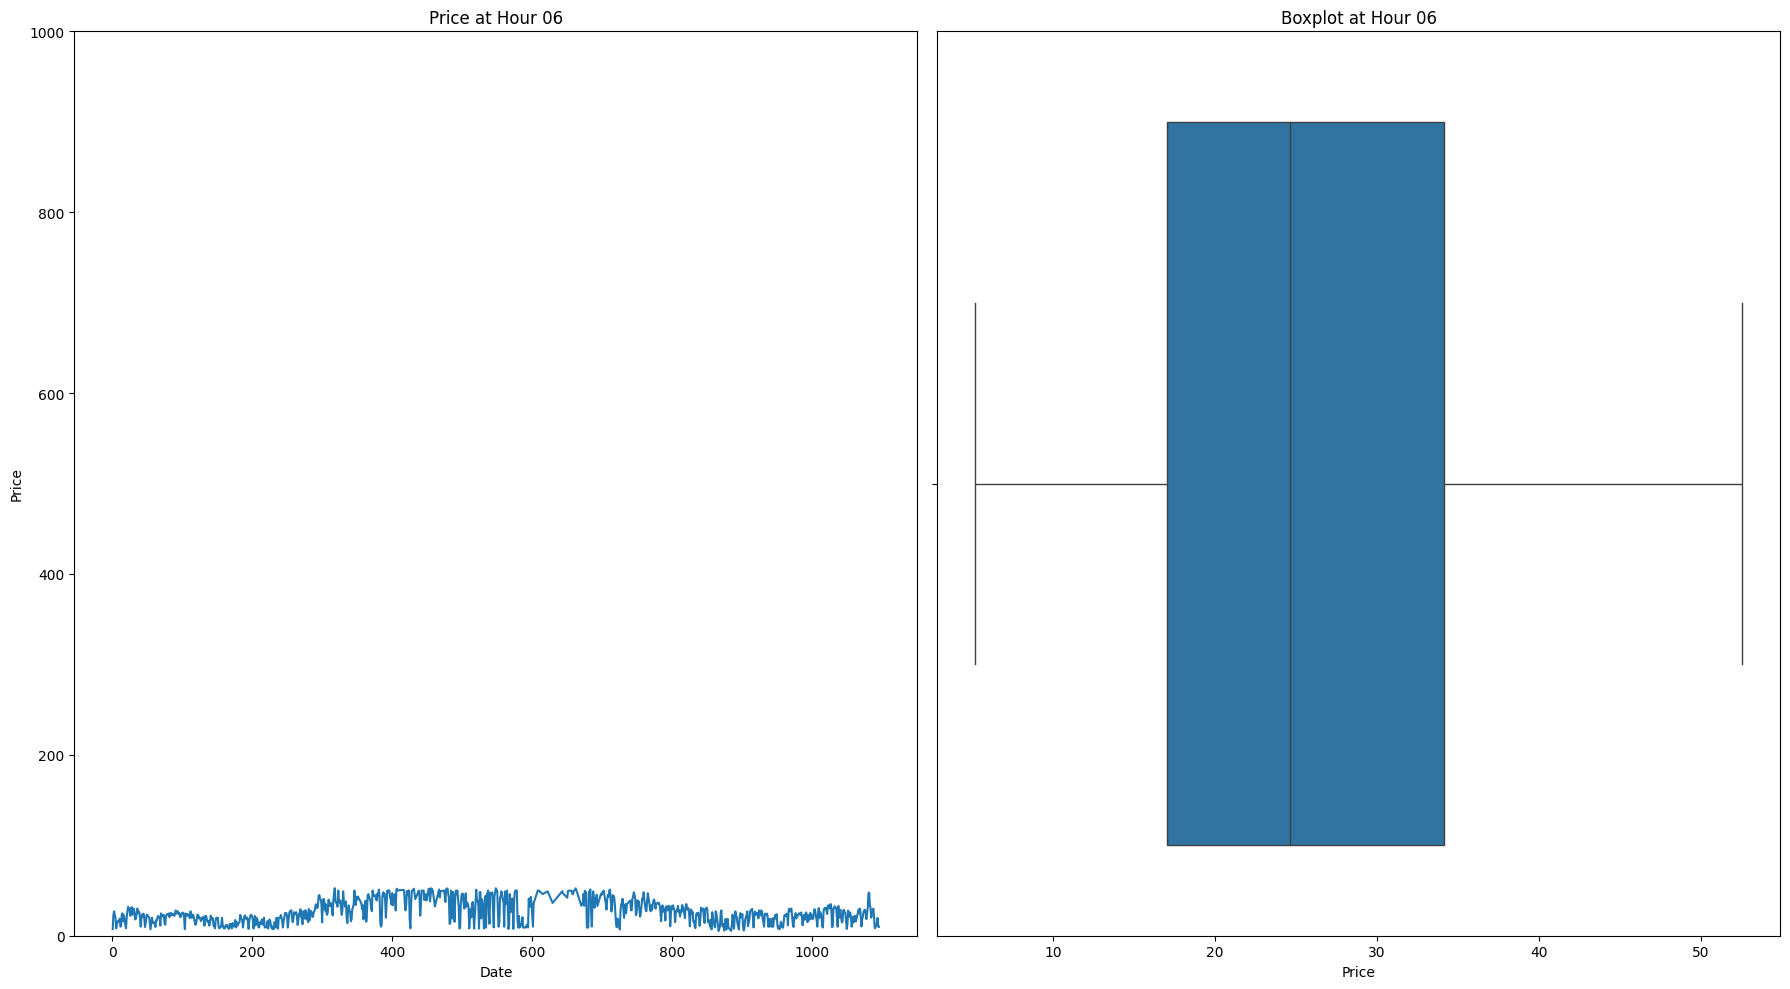

Hour 07

Number of outliers: 115

Mean: 36.652198905109486, Std: 20.77520595045181



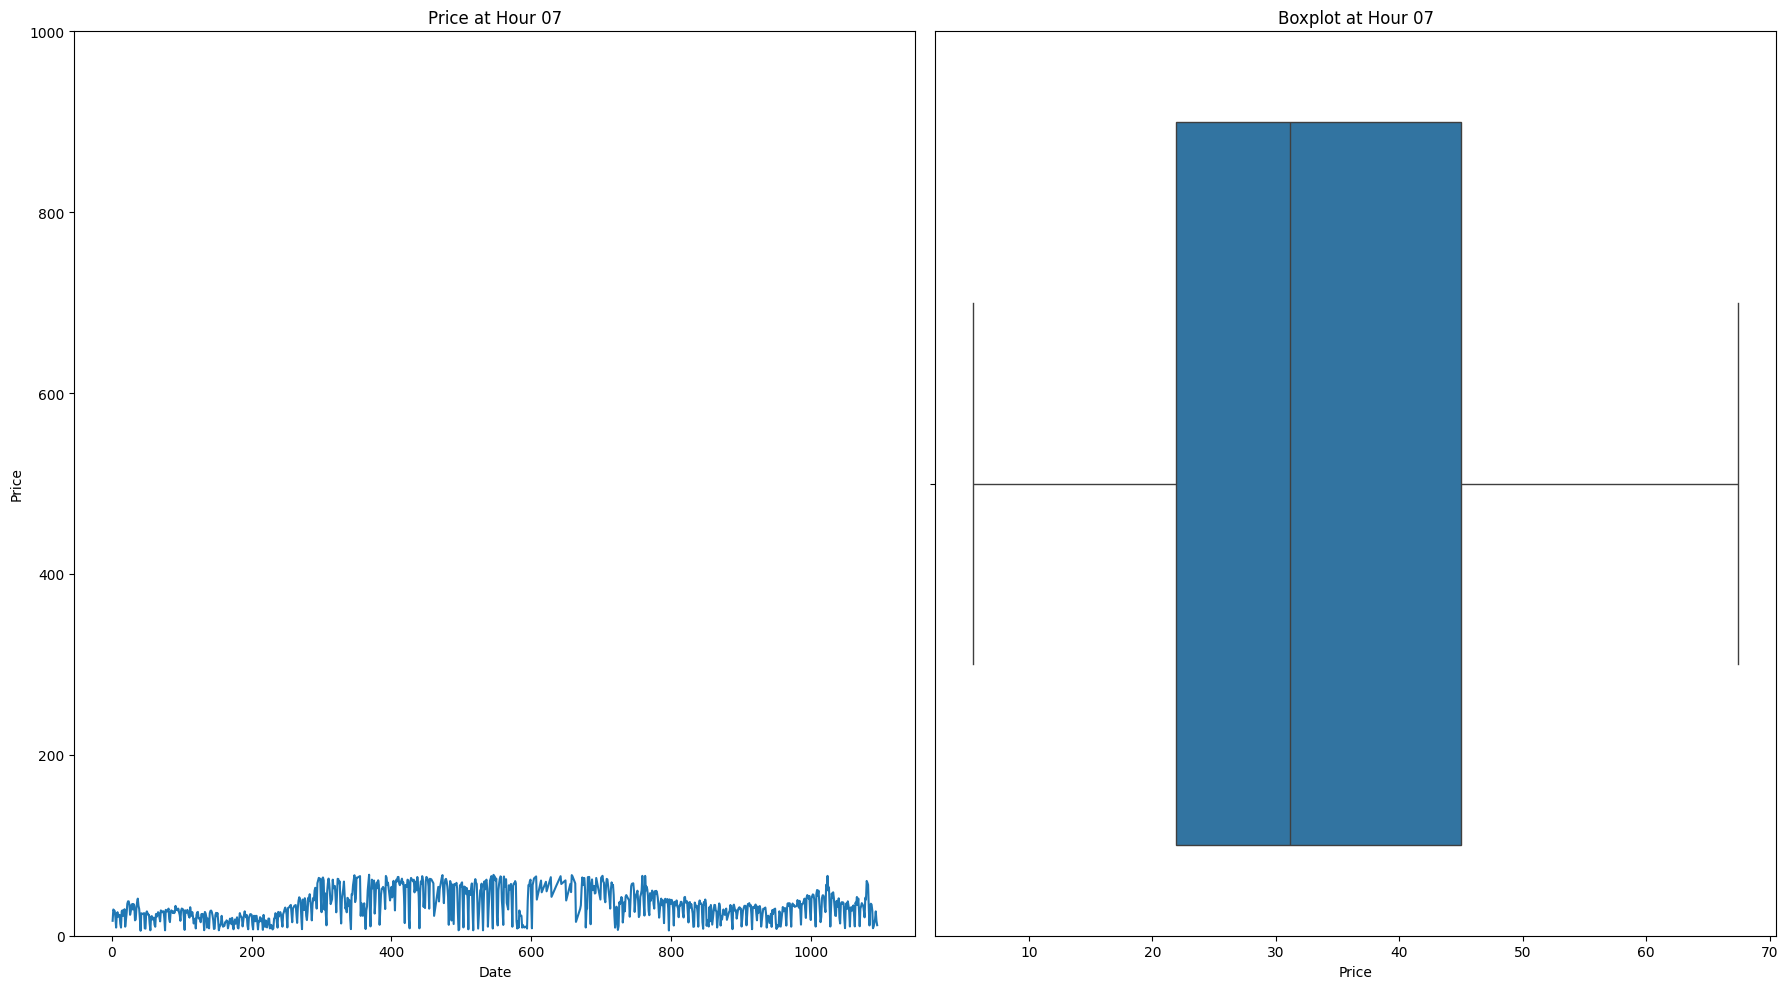

Hour 08

Number of outliers: 112

Mean: 50.5447901459854, Std: 28.96947727301794



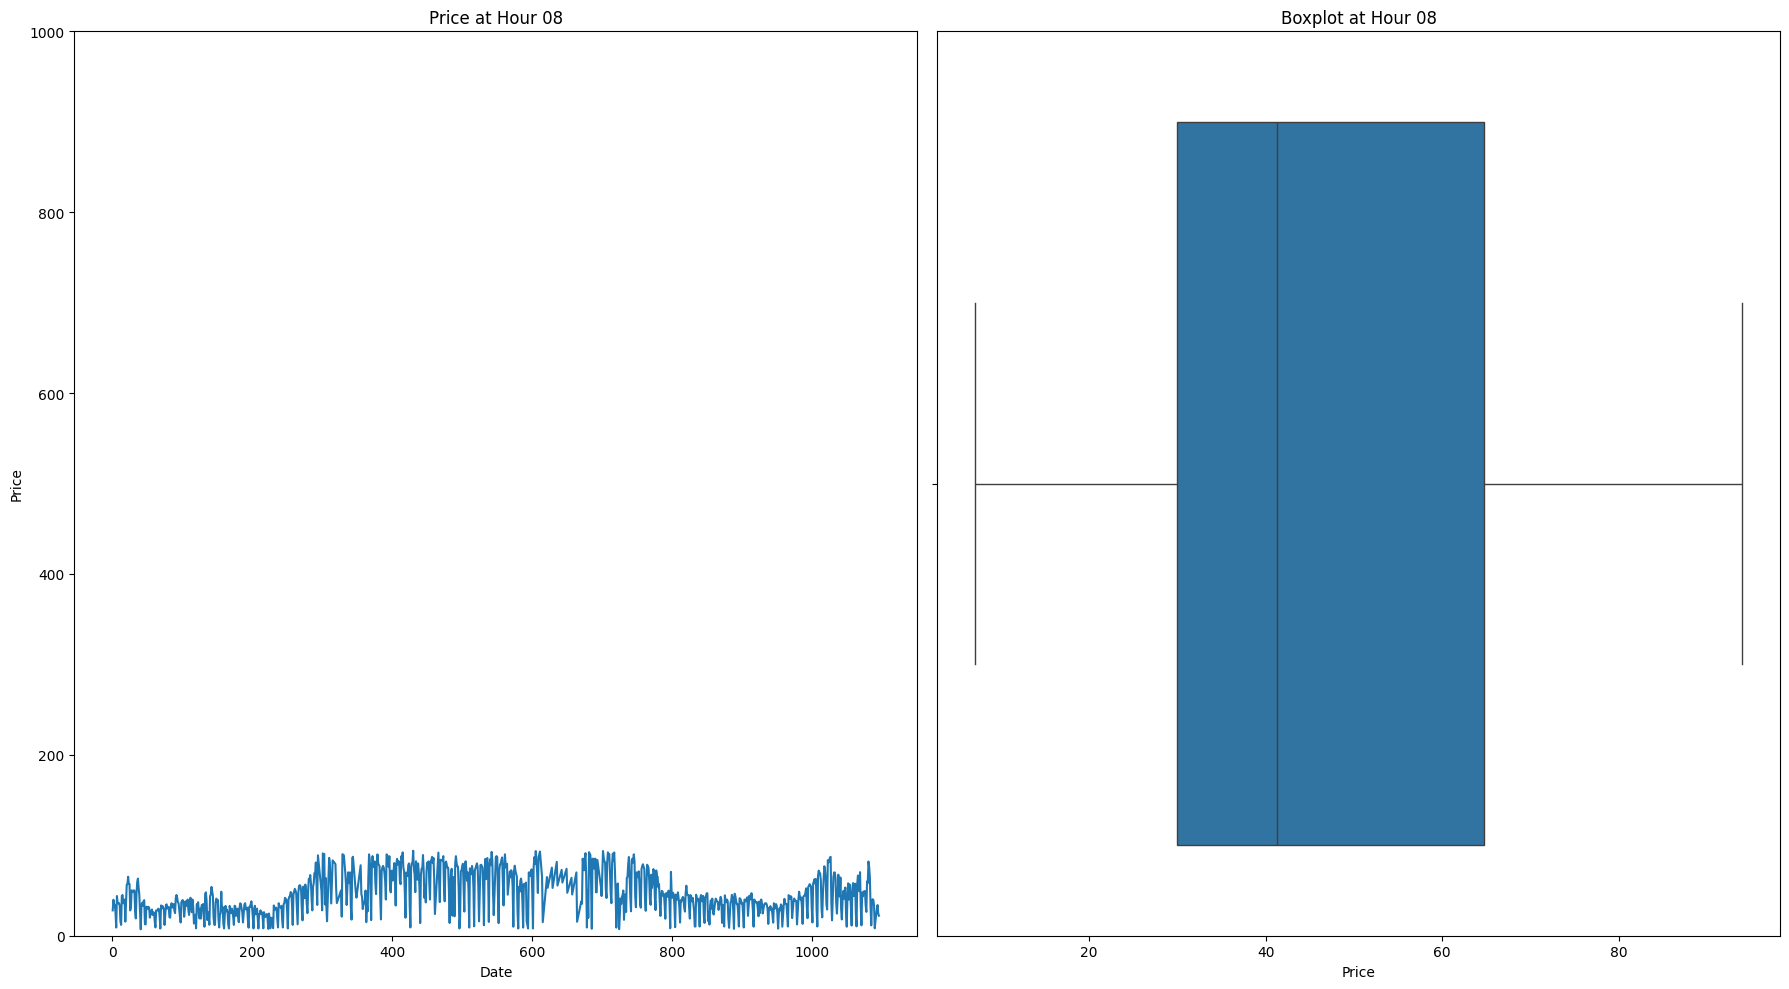

Hour 09

Number of outliers: 114

Mean: 56.92439781021898, Std: 30.77590264121149



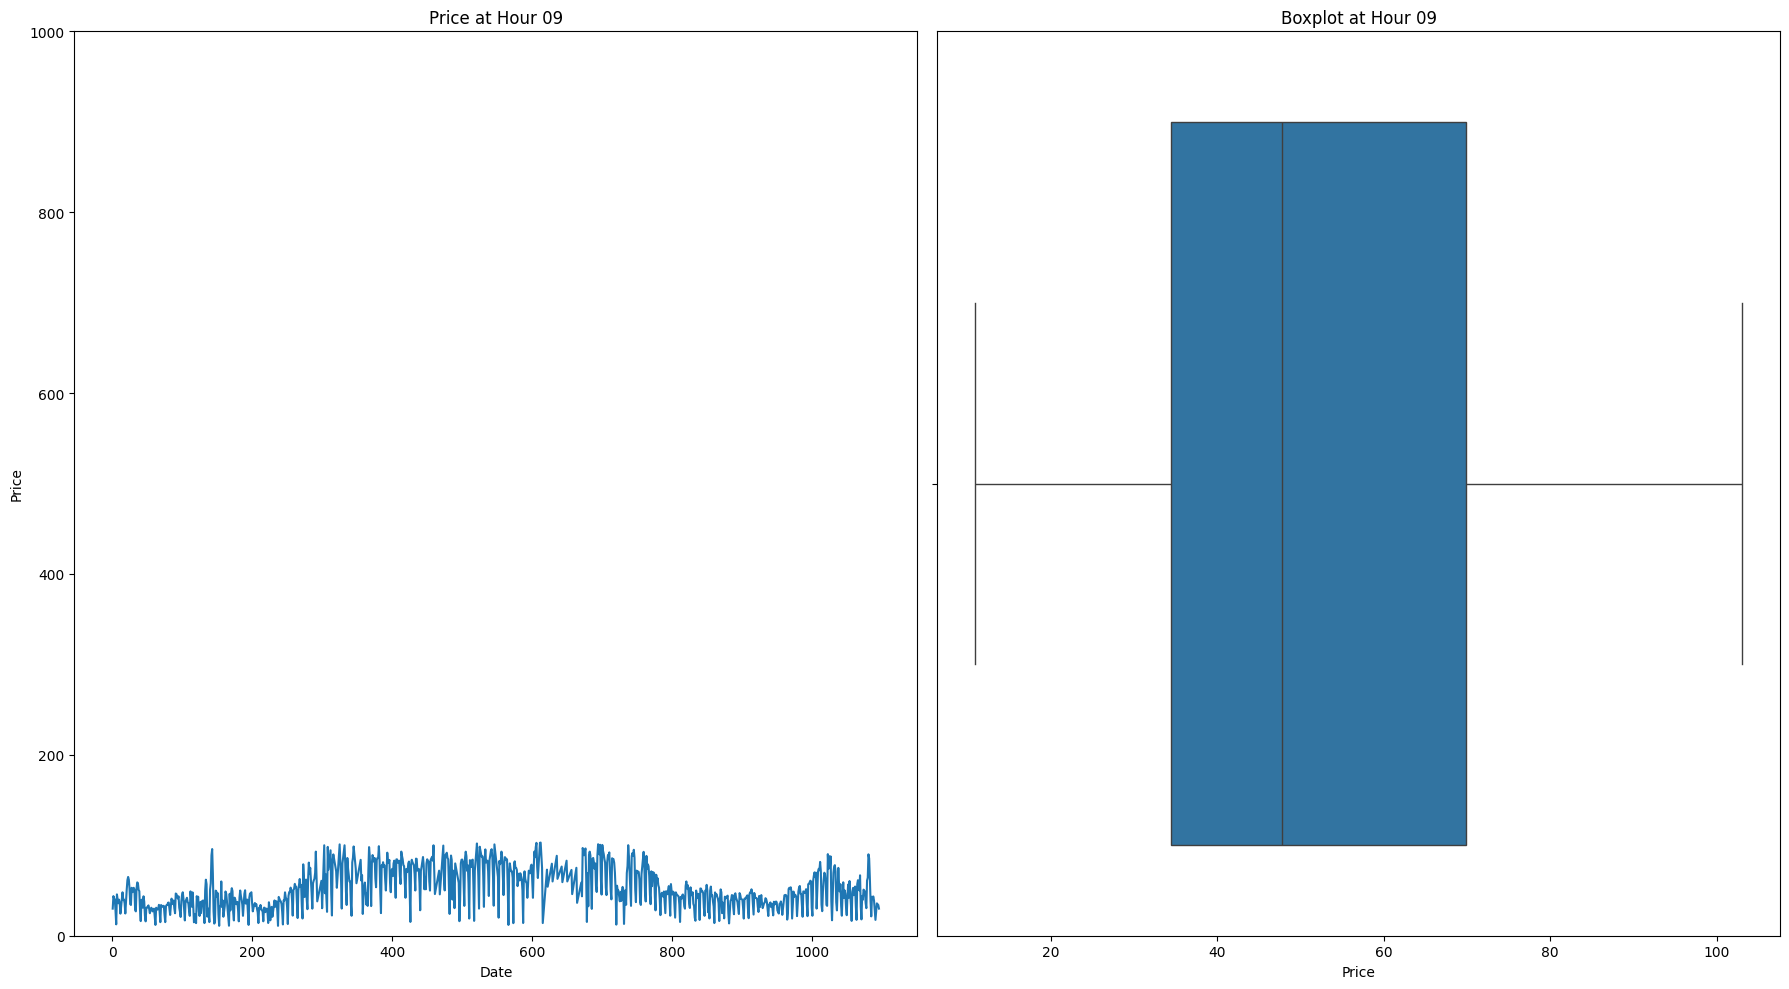

Hour 10

Number of outliers: 69

Mean: 63.91174270072992, Std: 39.16509316848734



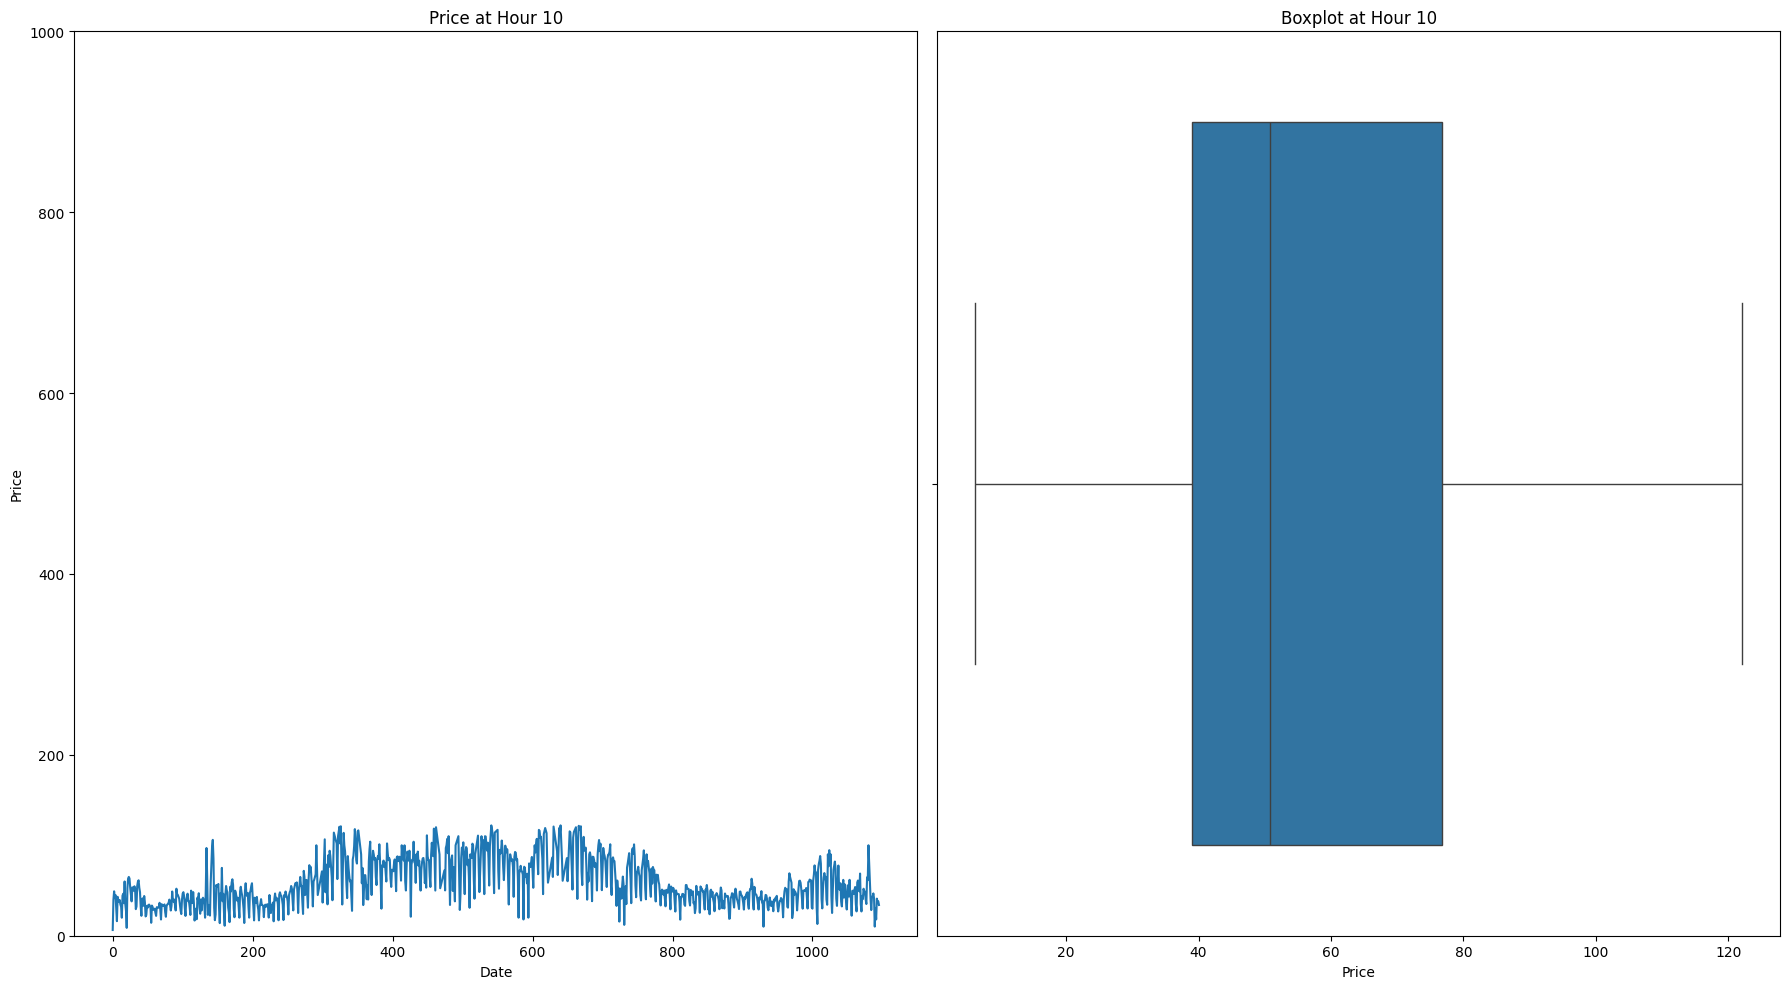

Hour 11

Number of outliers: 51

Mean: 67.13242700729927, Std: 45.63861039973075



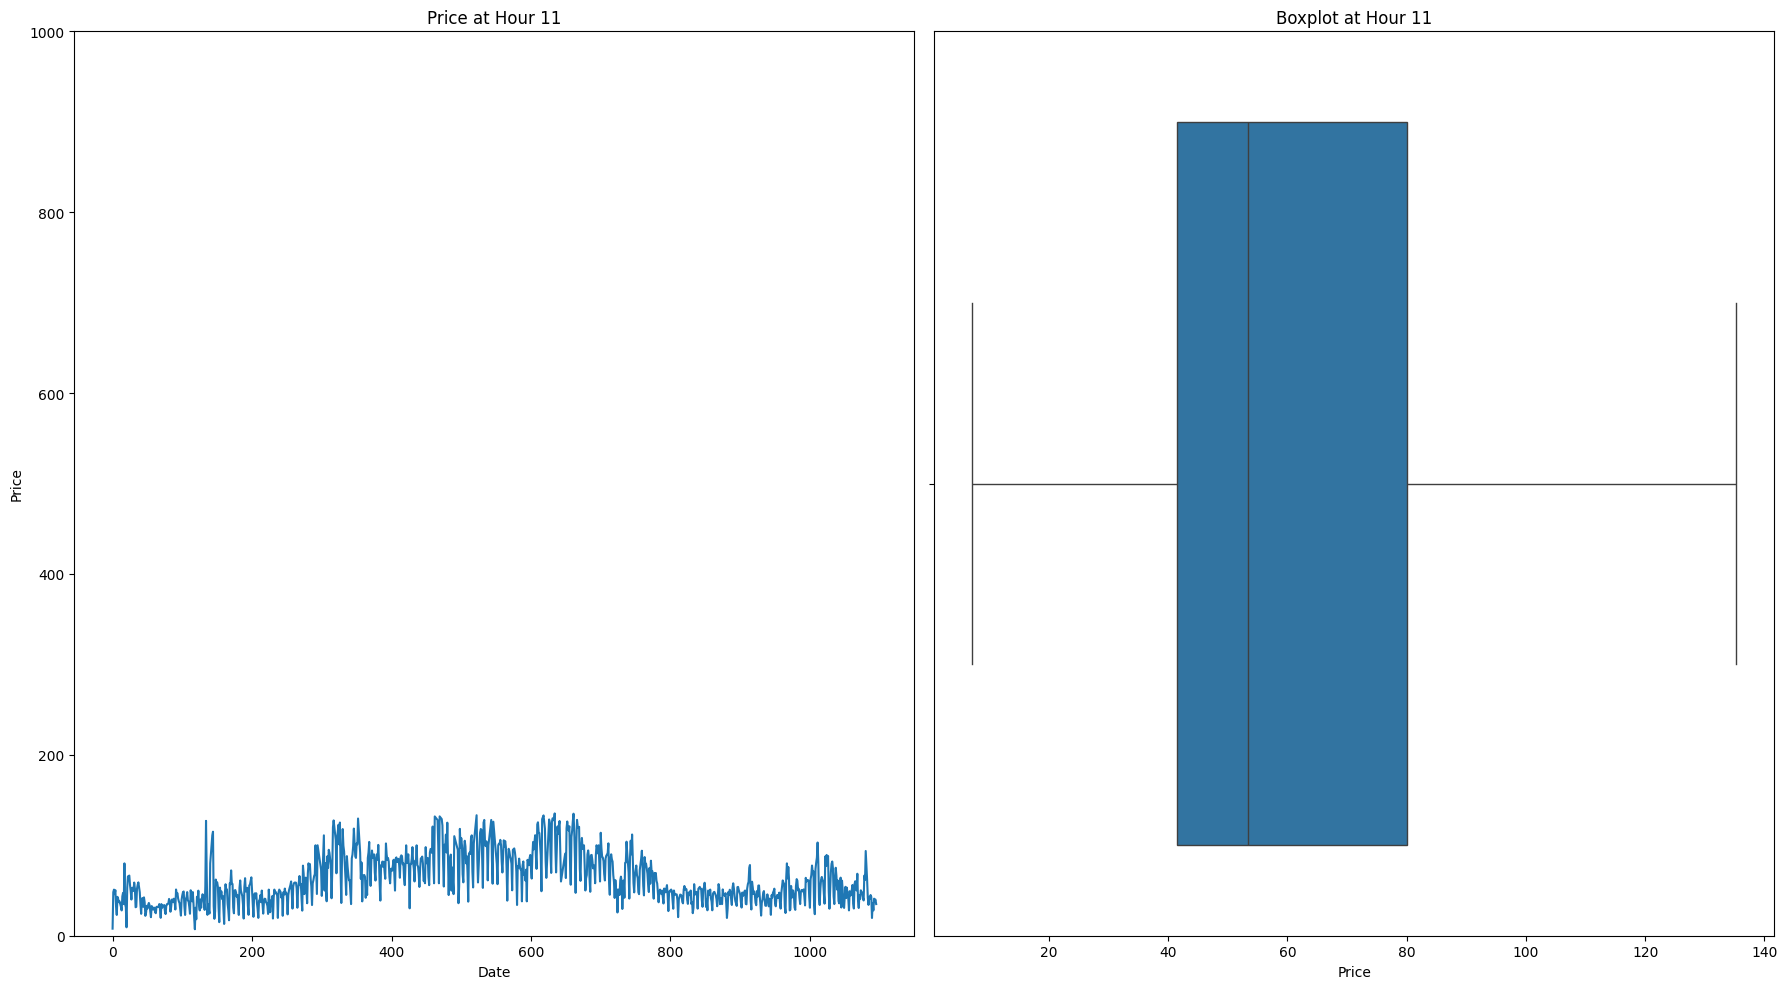

Hour 12

Number of outliers: 60

Mean: 70.88373175182483, Std: 48.067980727043924



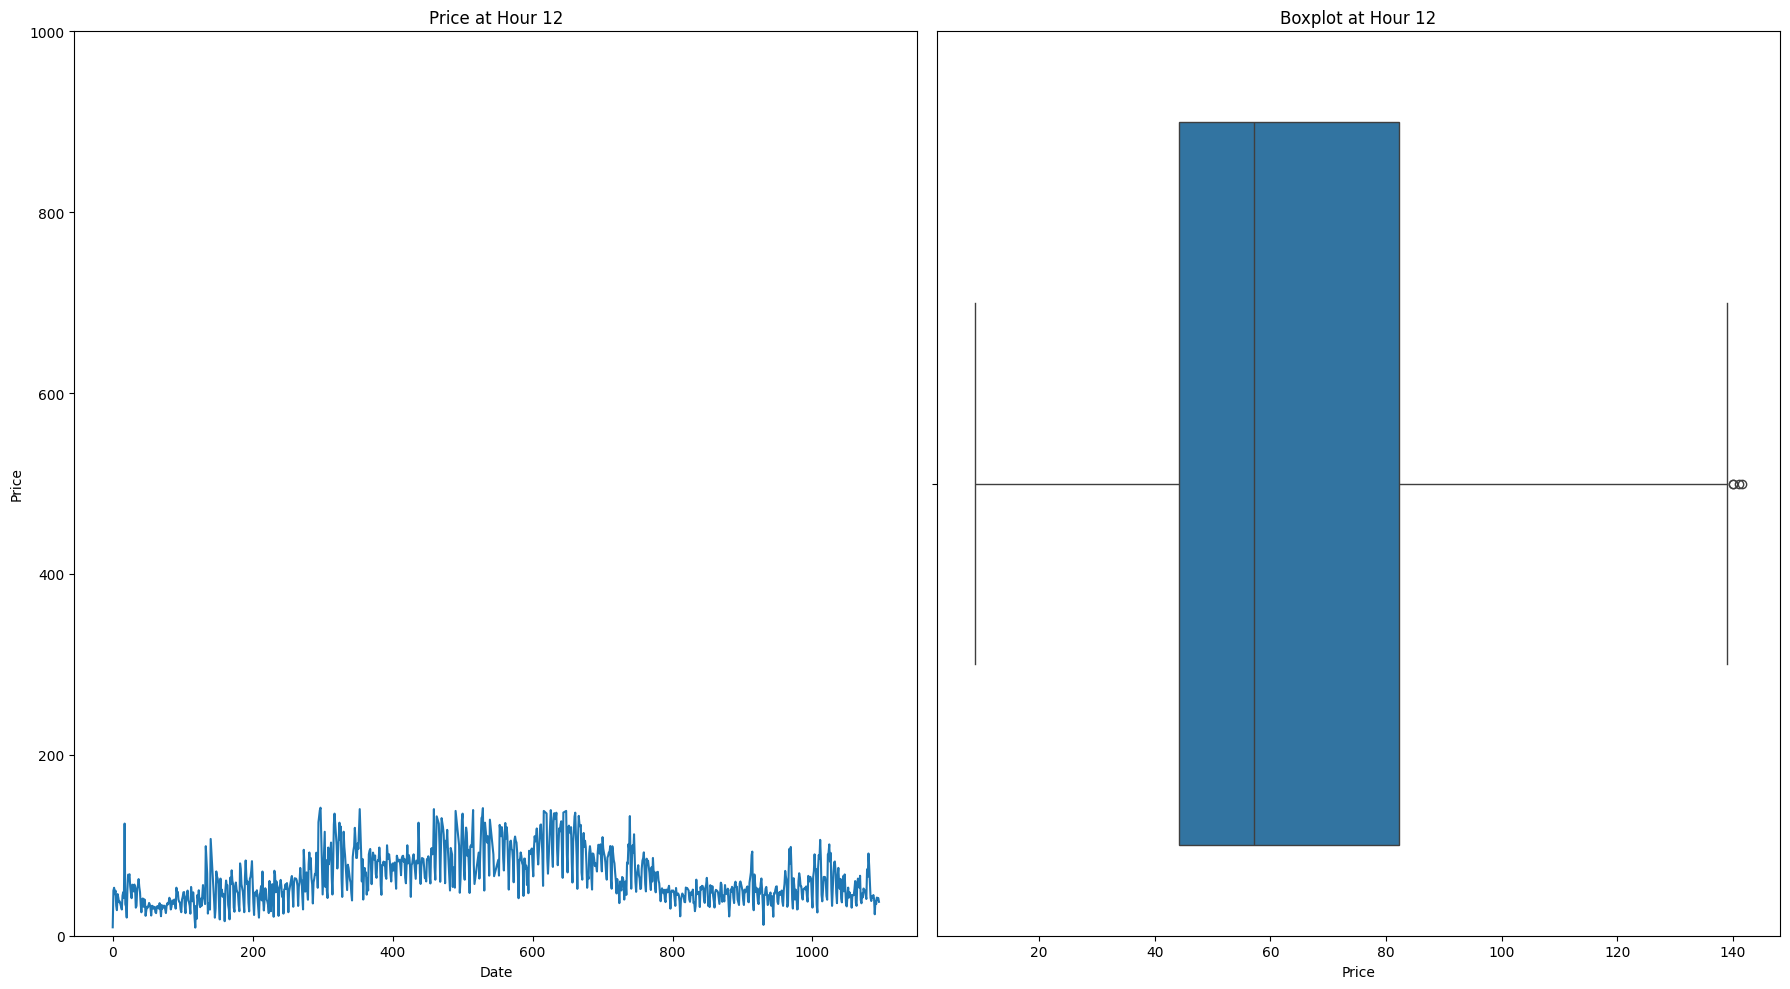

Hour 13

Number of outliers: 88

Mean: 64.99515510948905, Std: 31.39541076275672



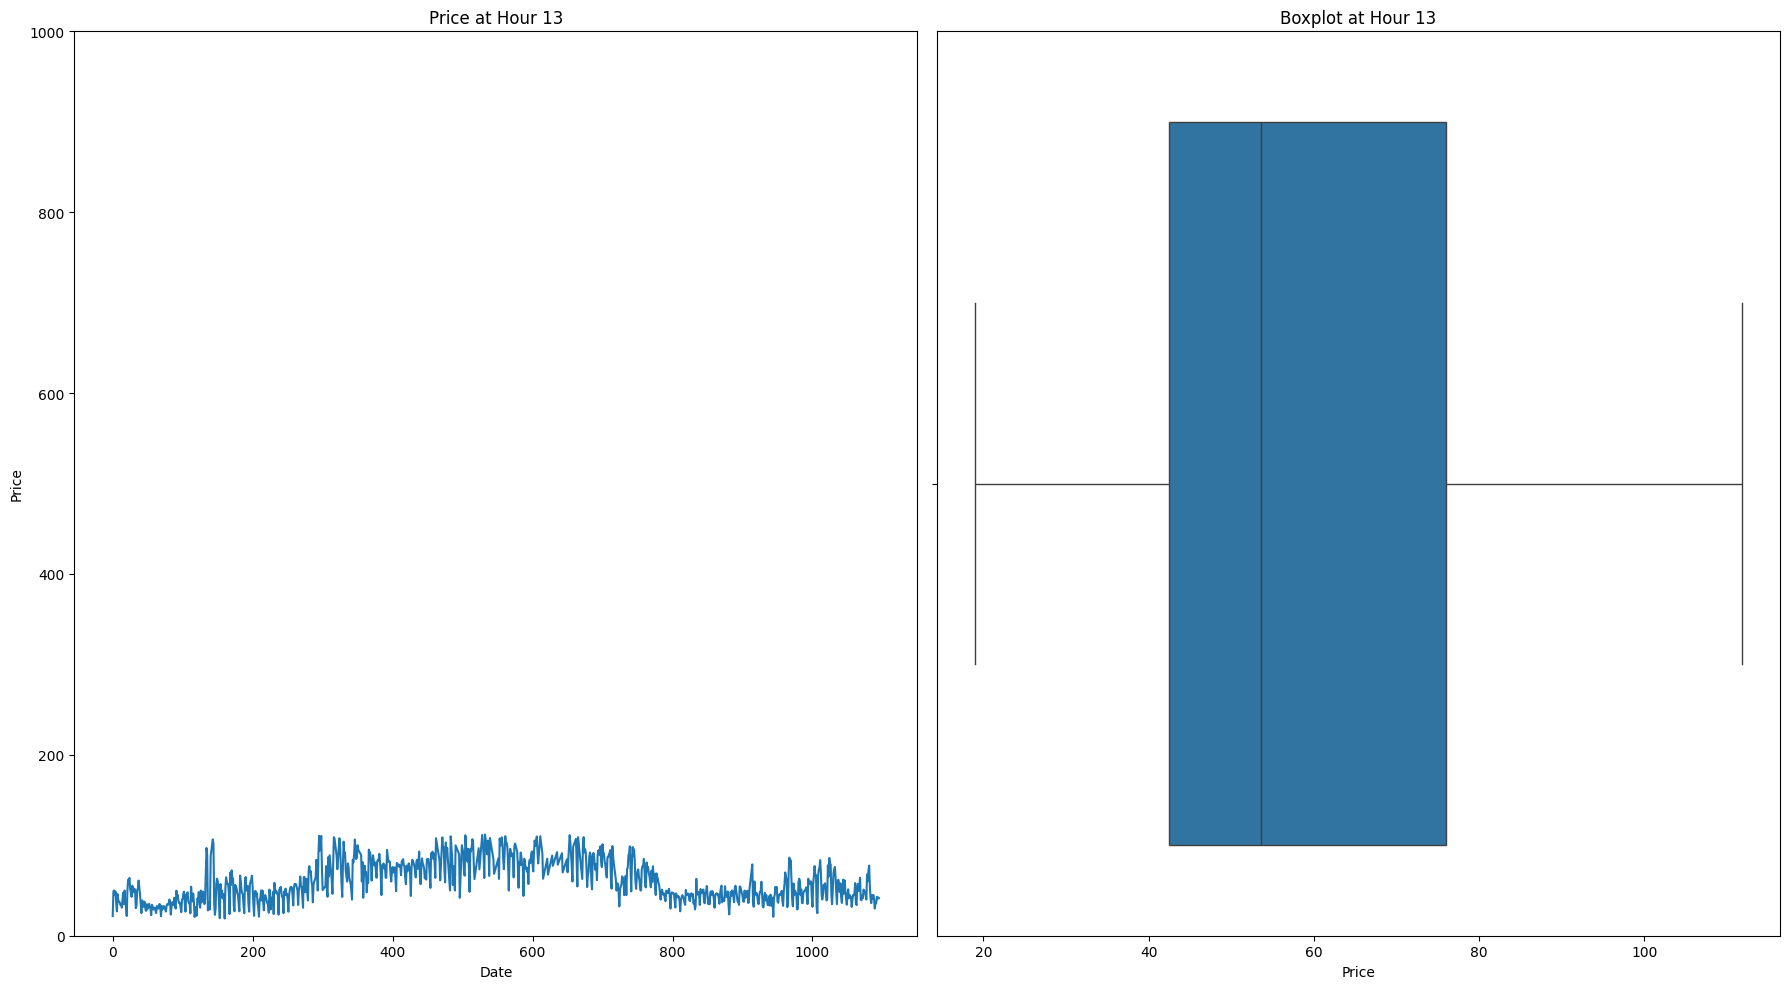

Hour 14

Number of outliers: 82

Mean: 61.618257299270084, Std: 31.96929821096755



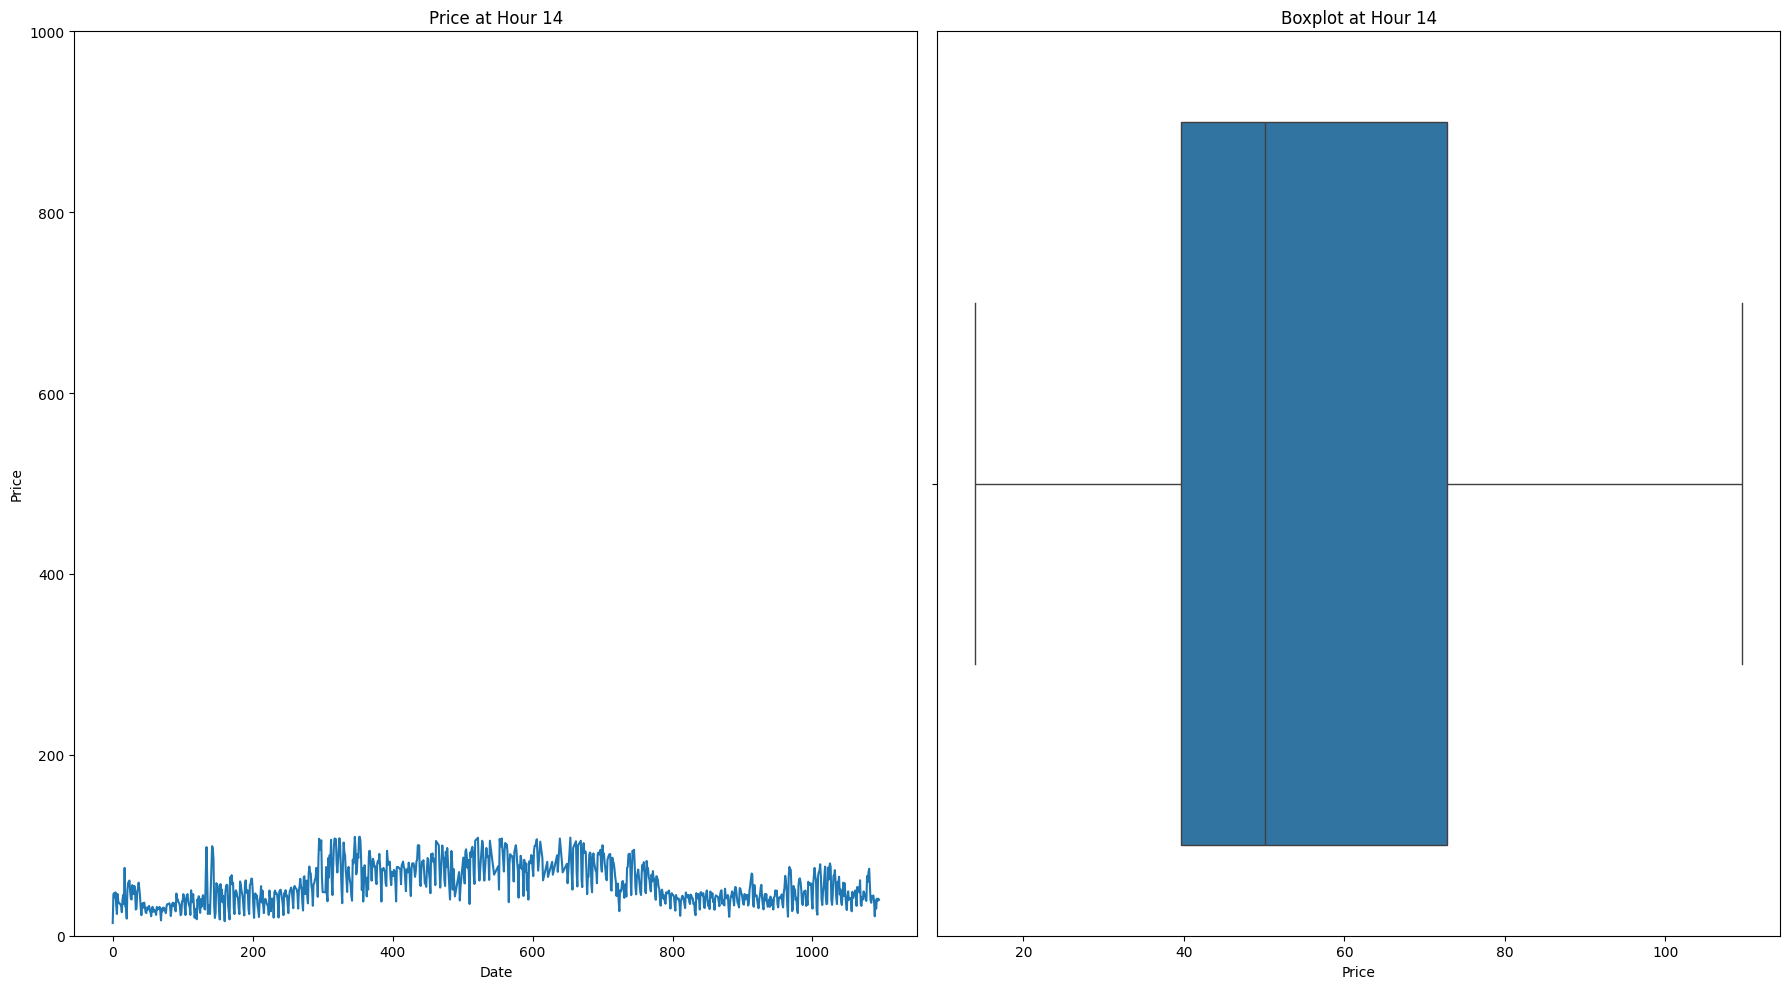

Hour 15

Number of outliers: 47

Mean: 58.981094890510946, Std: 39.27906821573051



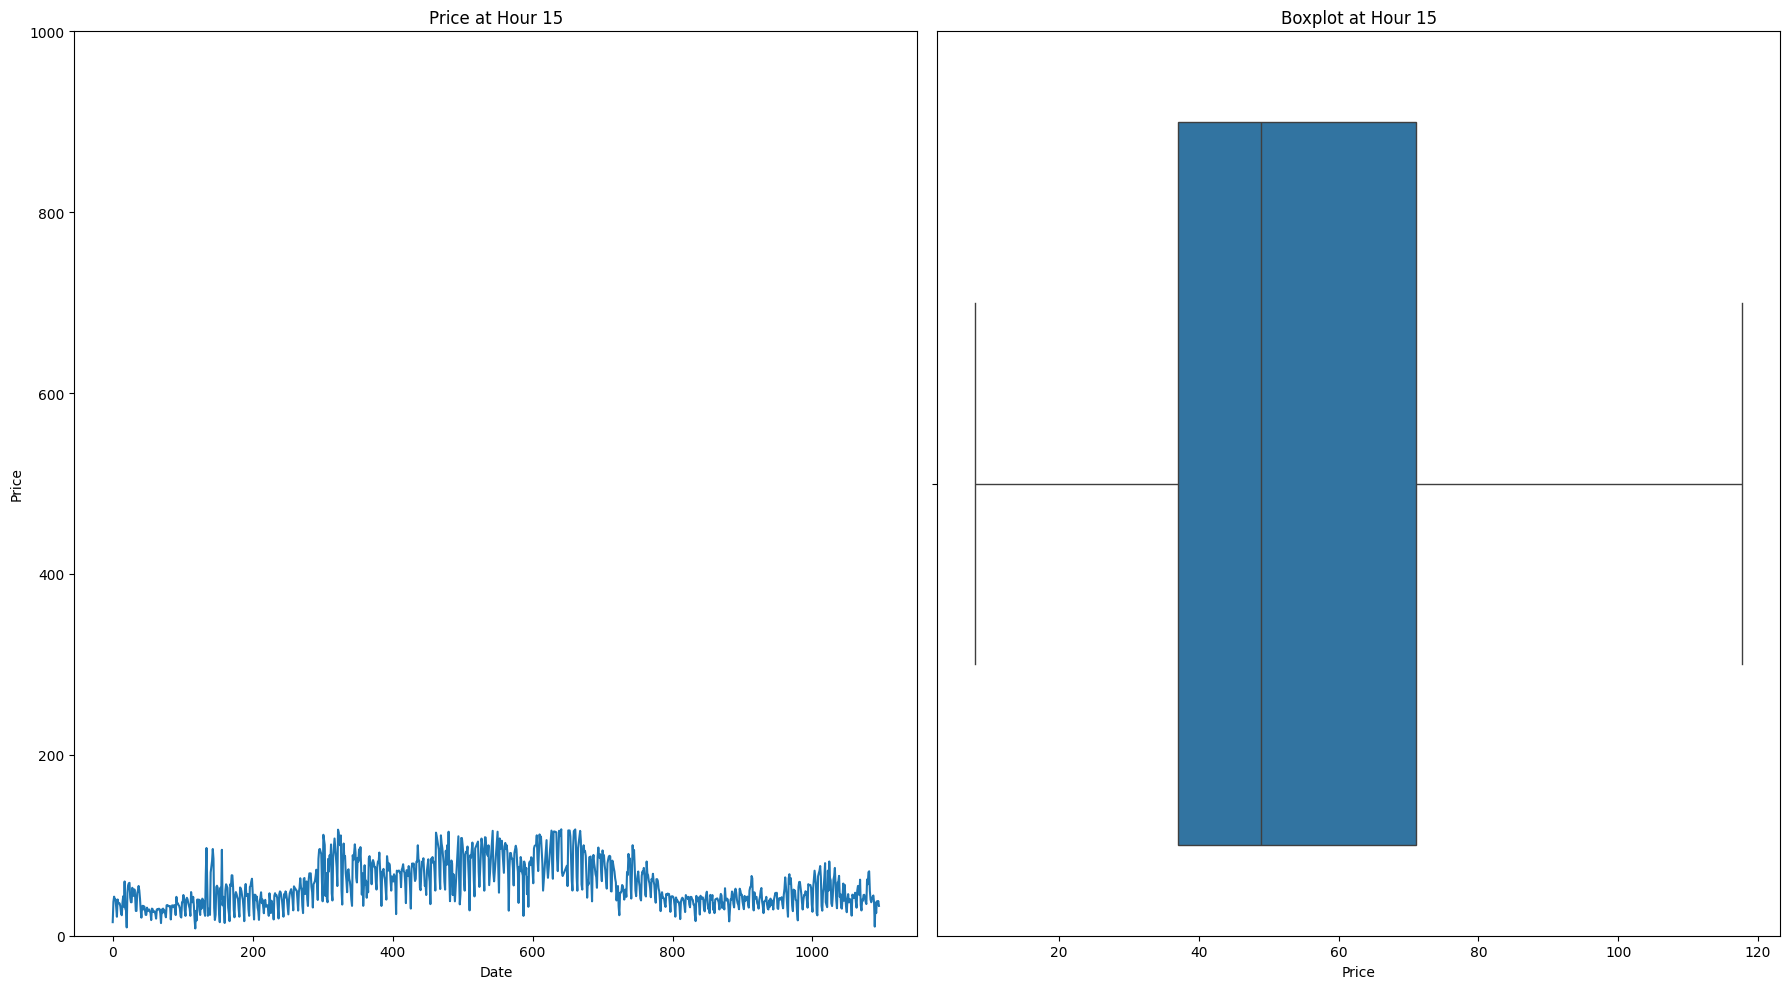

Hour 16

Number of outliers: 45

Mean: 54.61488138686132, Std: 38.09626311309634



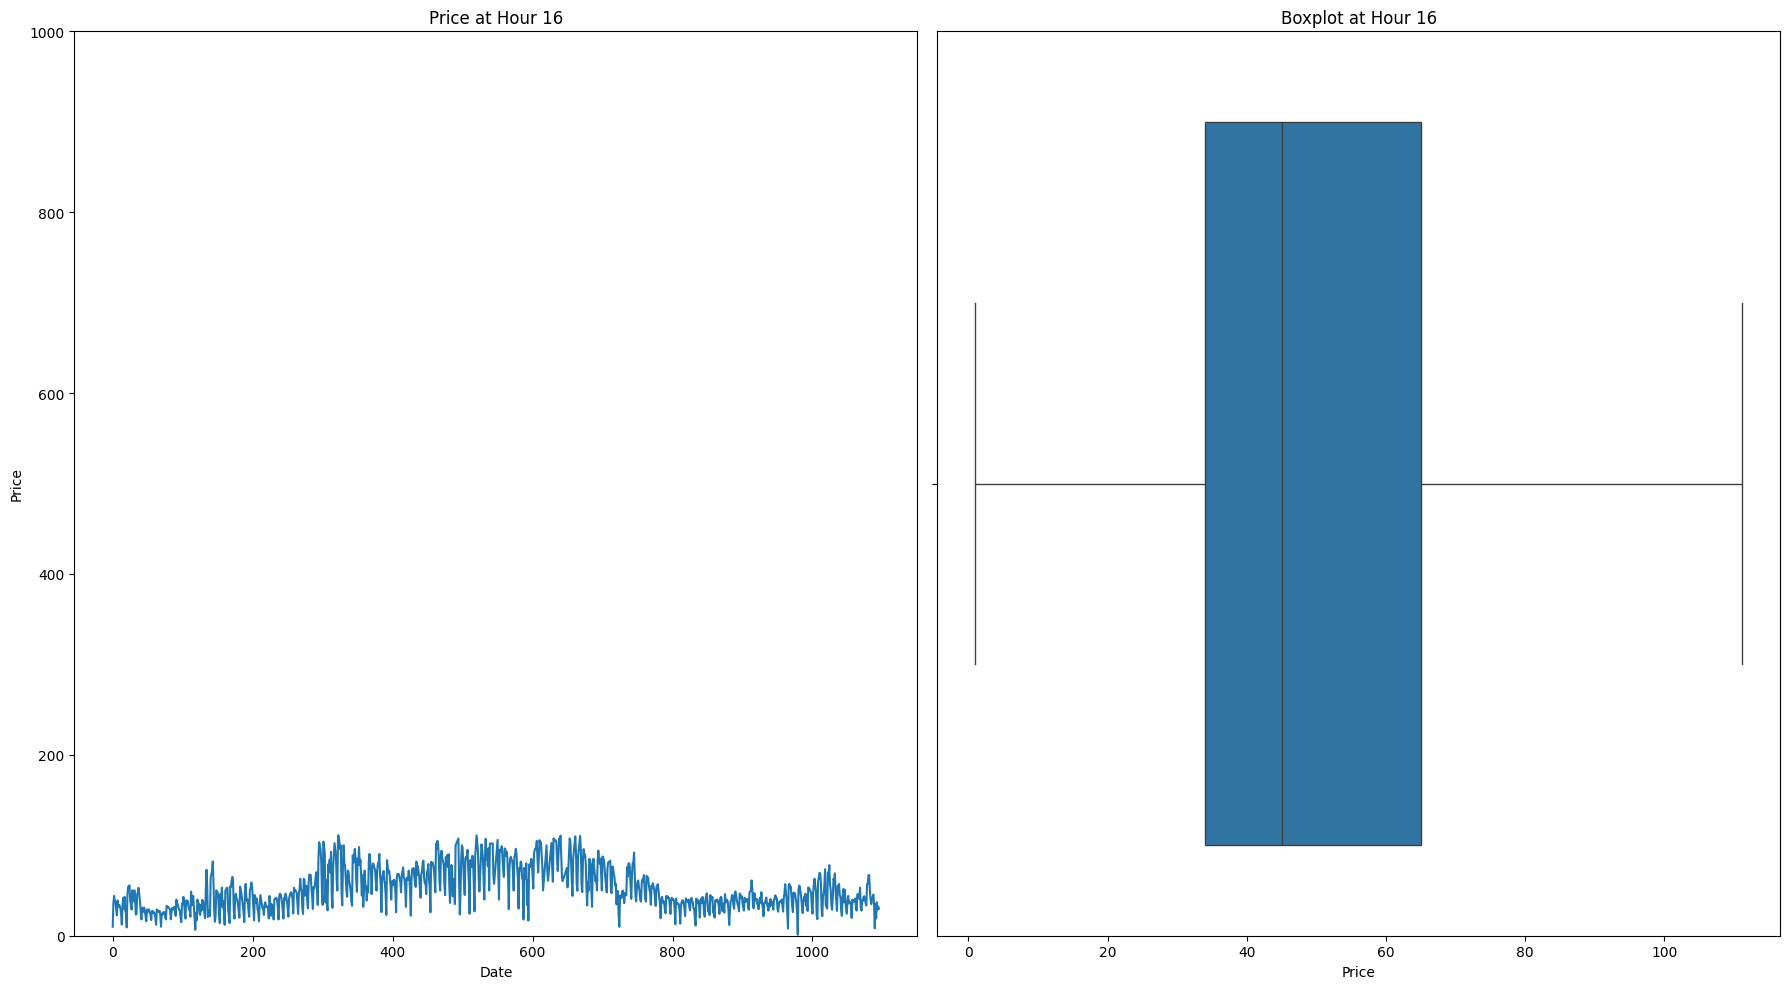

Hour 17

Number of outliers: 28

Mean: 53.98165145985401, Std: 40.69156417922985



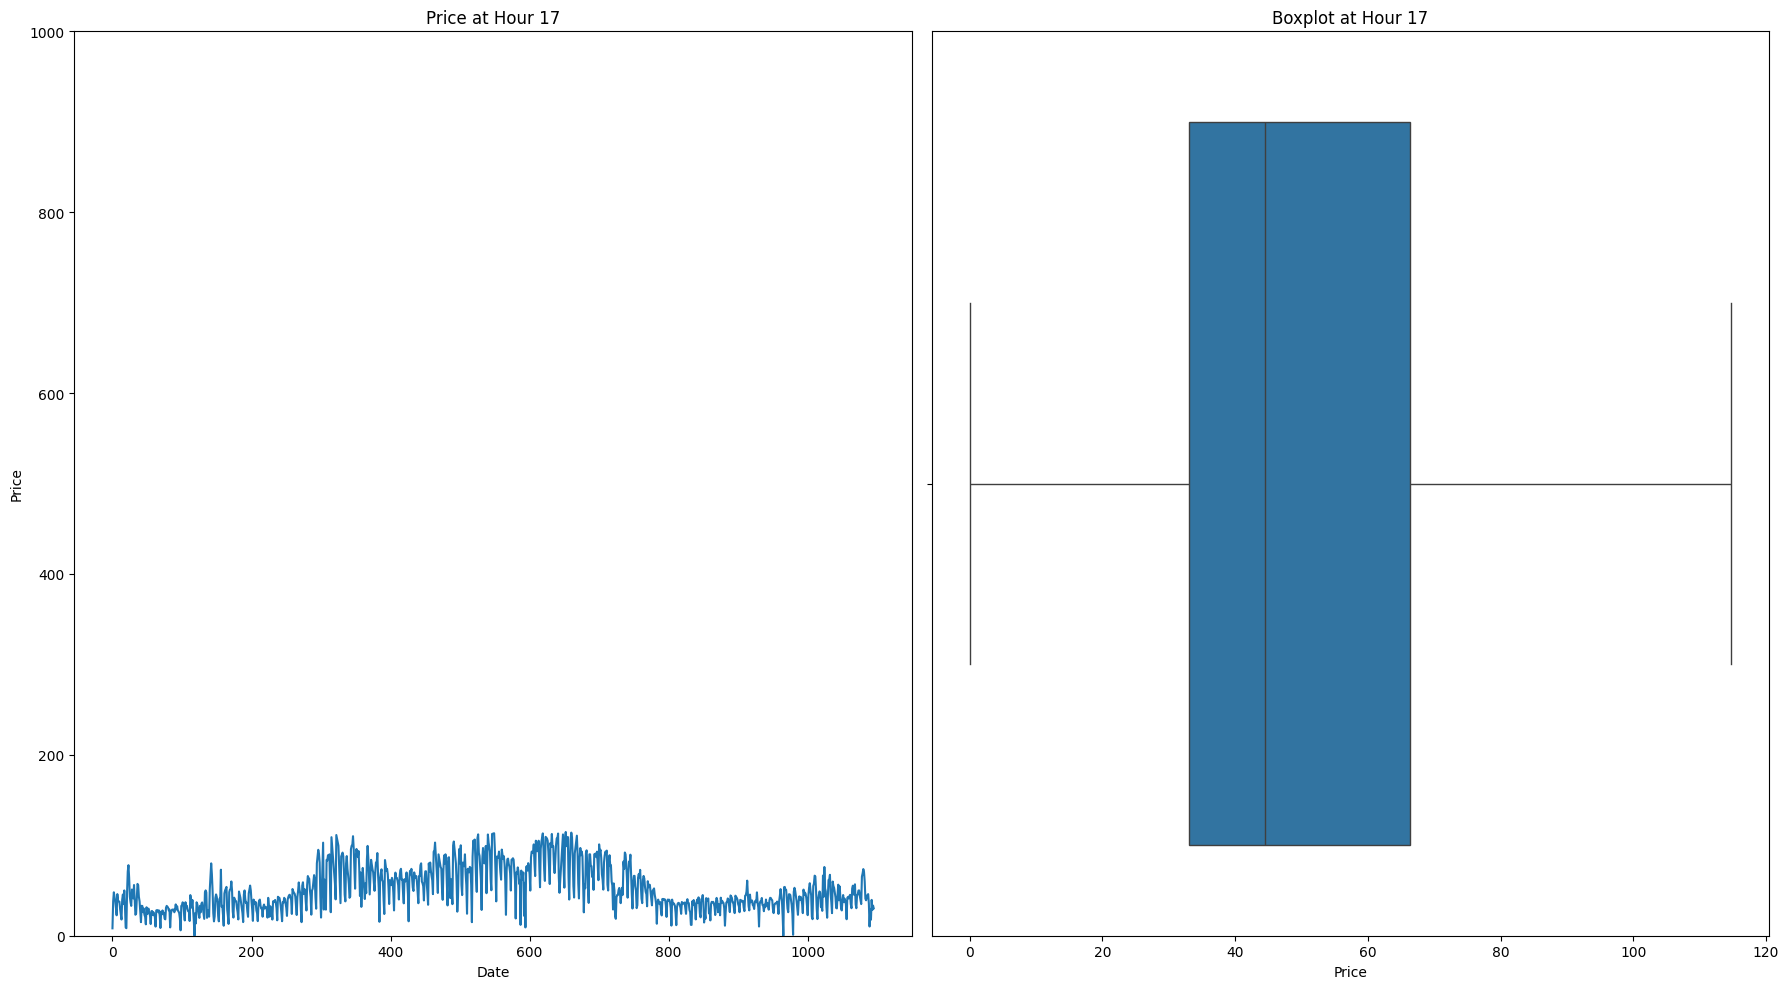

Hour 18

Number of outliers: 37

Mean: 60.16250912408759, Std: 46.205985694198965



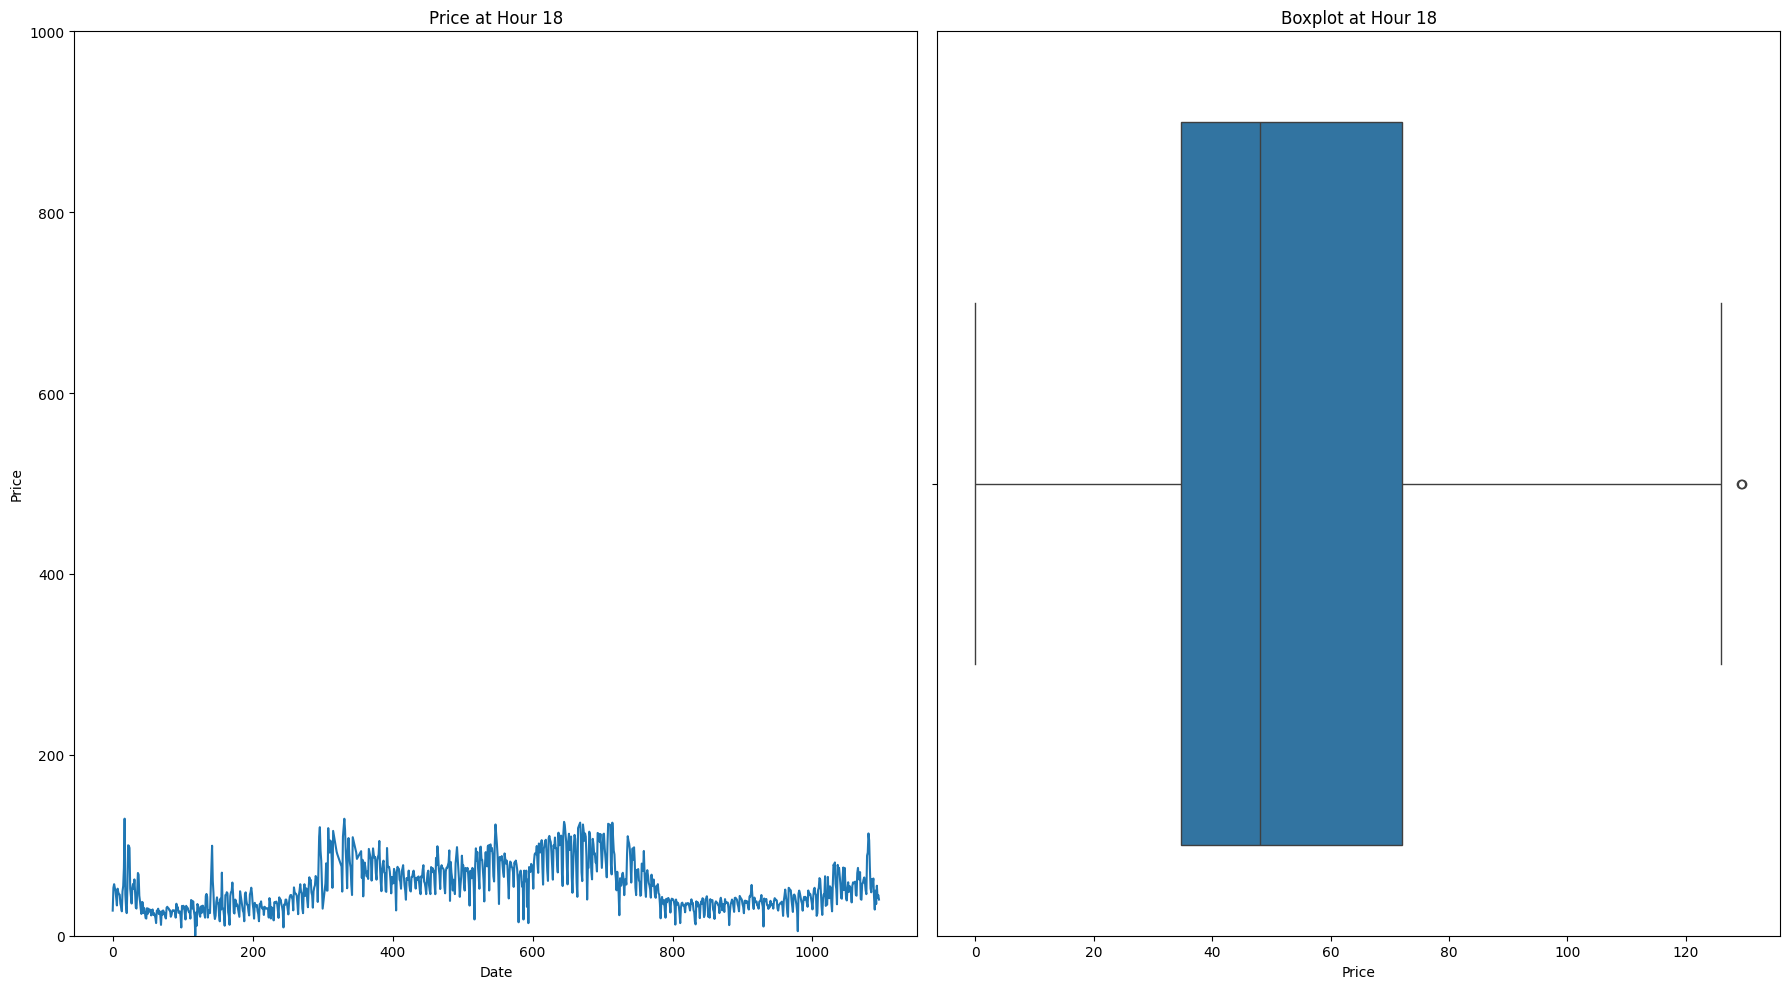

Hour 19

Number of outliers: 25

Mean: 67.46607664233578, Std: 75.78043589965125



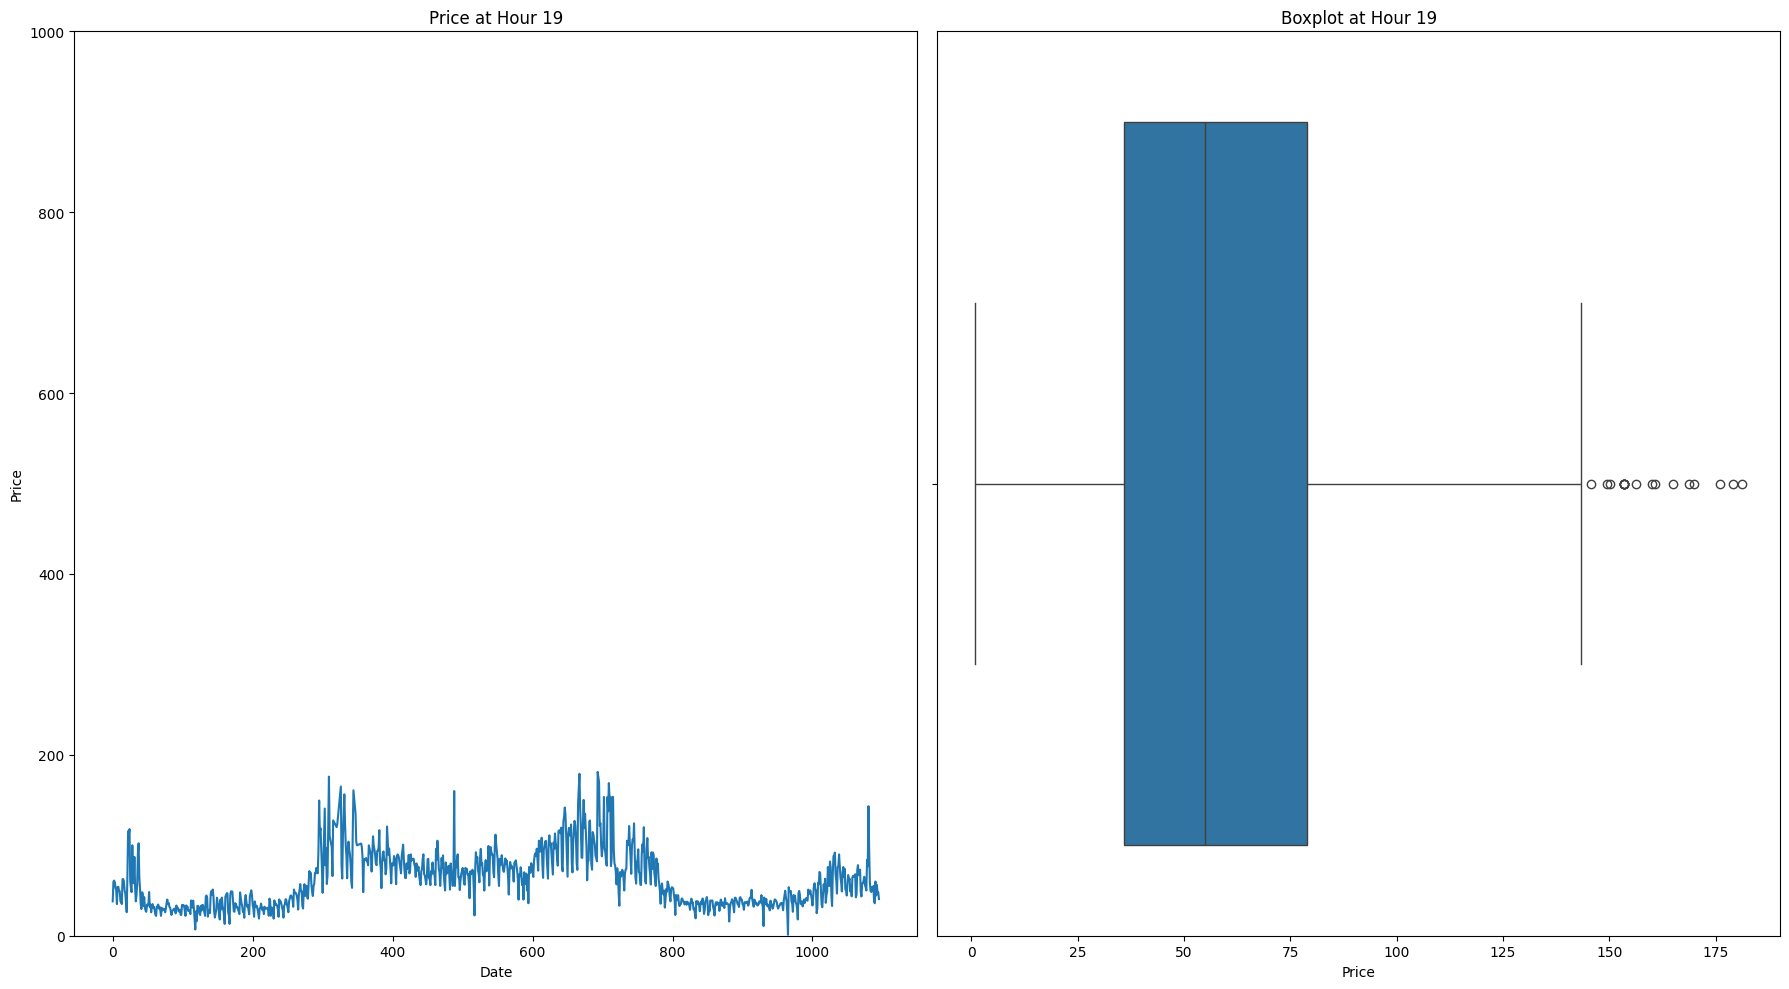

Hour 20

Number of outliers: 32

Mean: 62.436697080291964, Std: 45.1823180192448



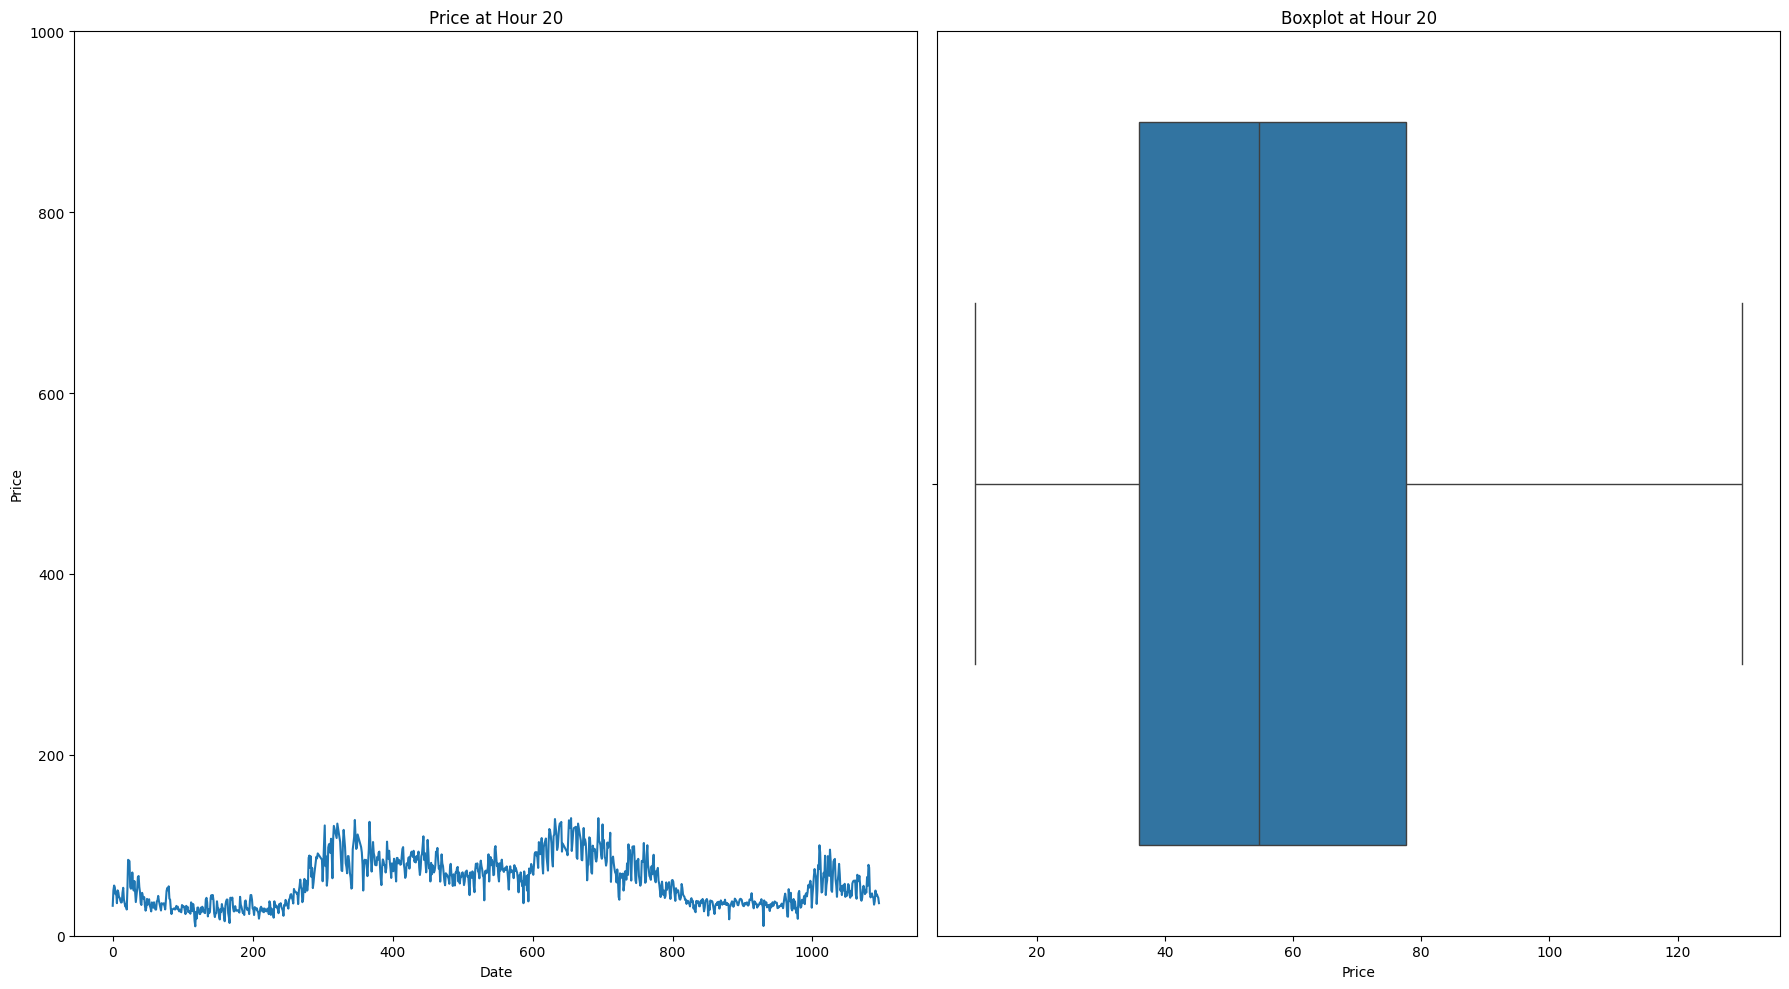

Hour 21

Number of outliers: 1

Mean: 58.46425182481752, Std: 77.86540636560514



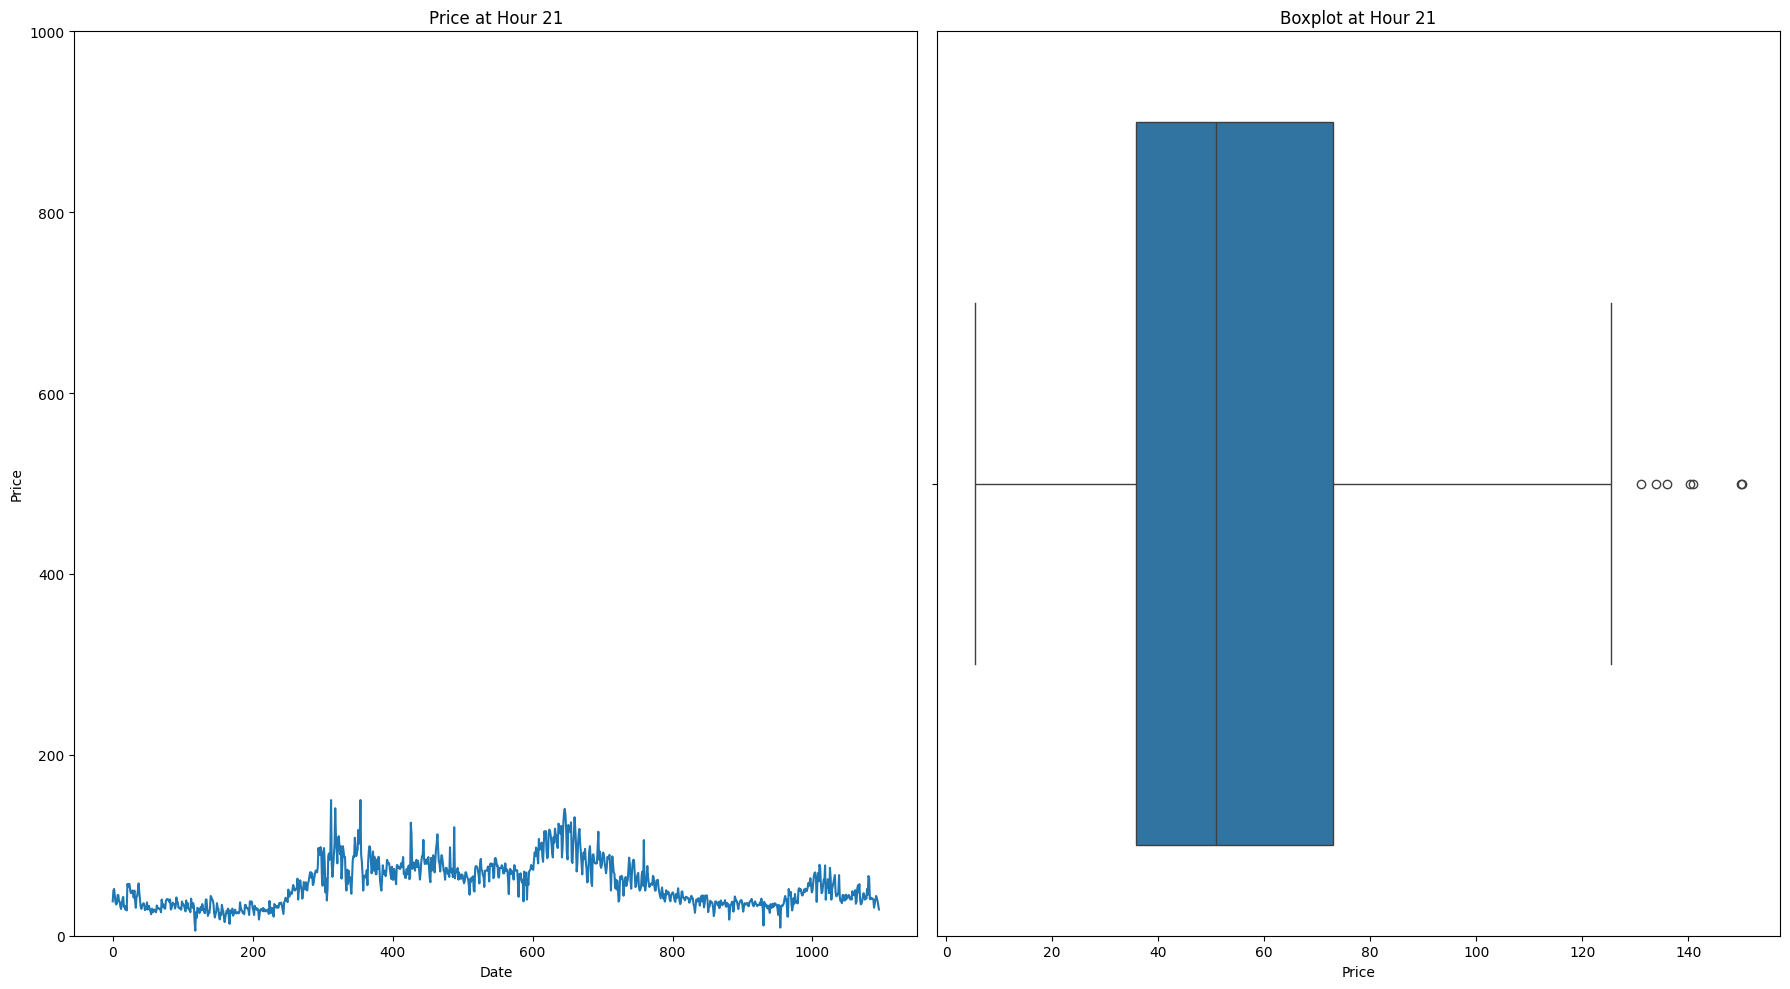

Hour 22

Number of outliers: 81

Mean: 50.285711678832115, Std: 22.377122711888447



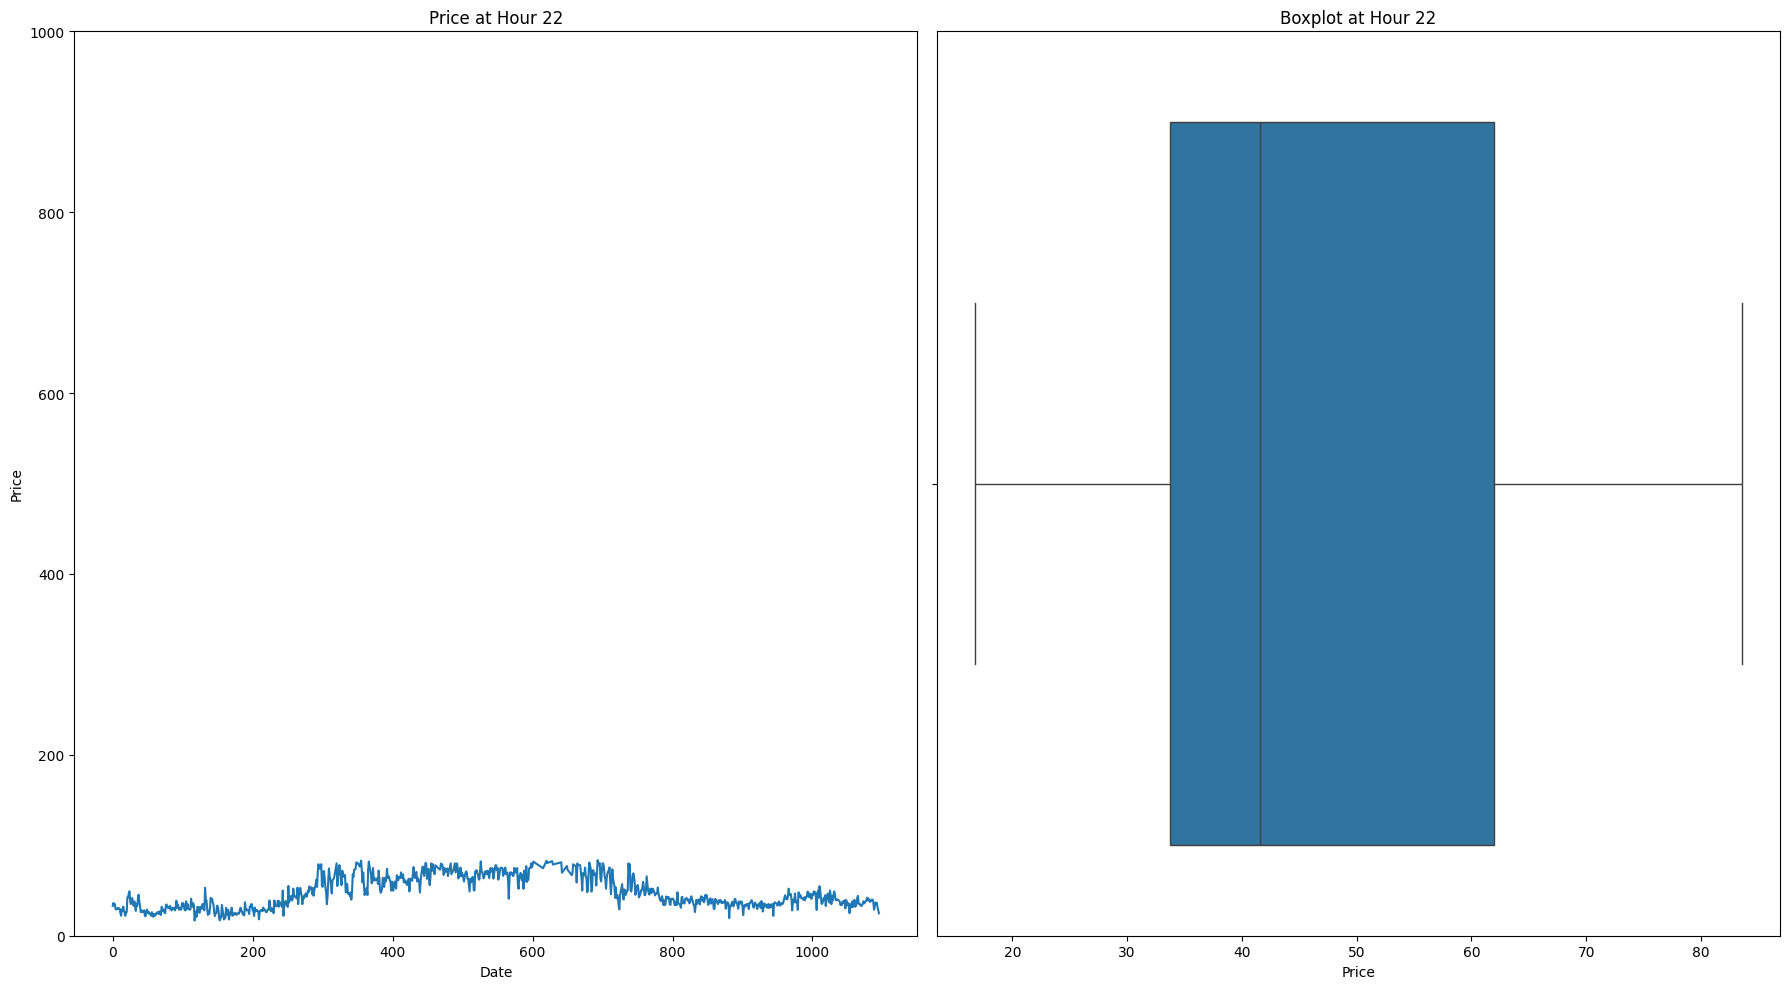

Hour 23

Number of outliers: 98

Mean: 50.45126824817518, Std: 20.360751669009275



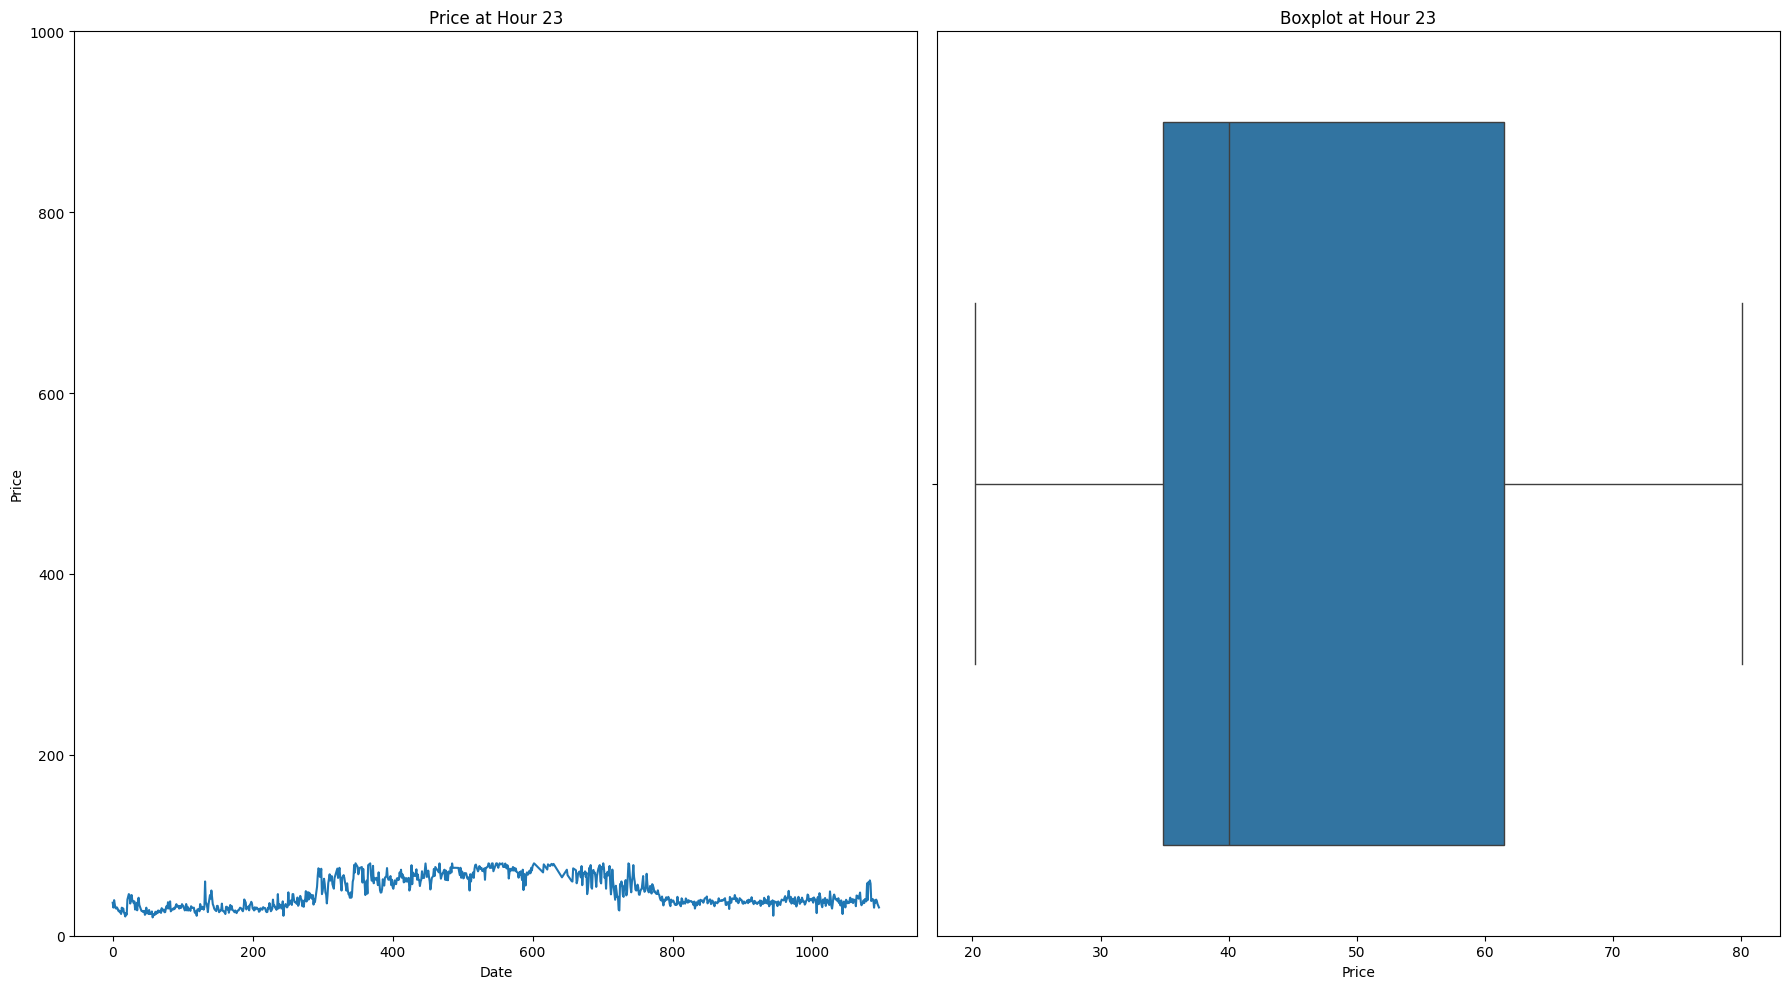

Hour 24

Number of outliers: 83

Mean: 45.25933394160584, Std: 19.155459443631216



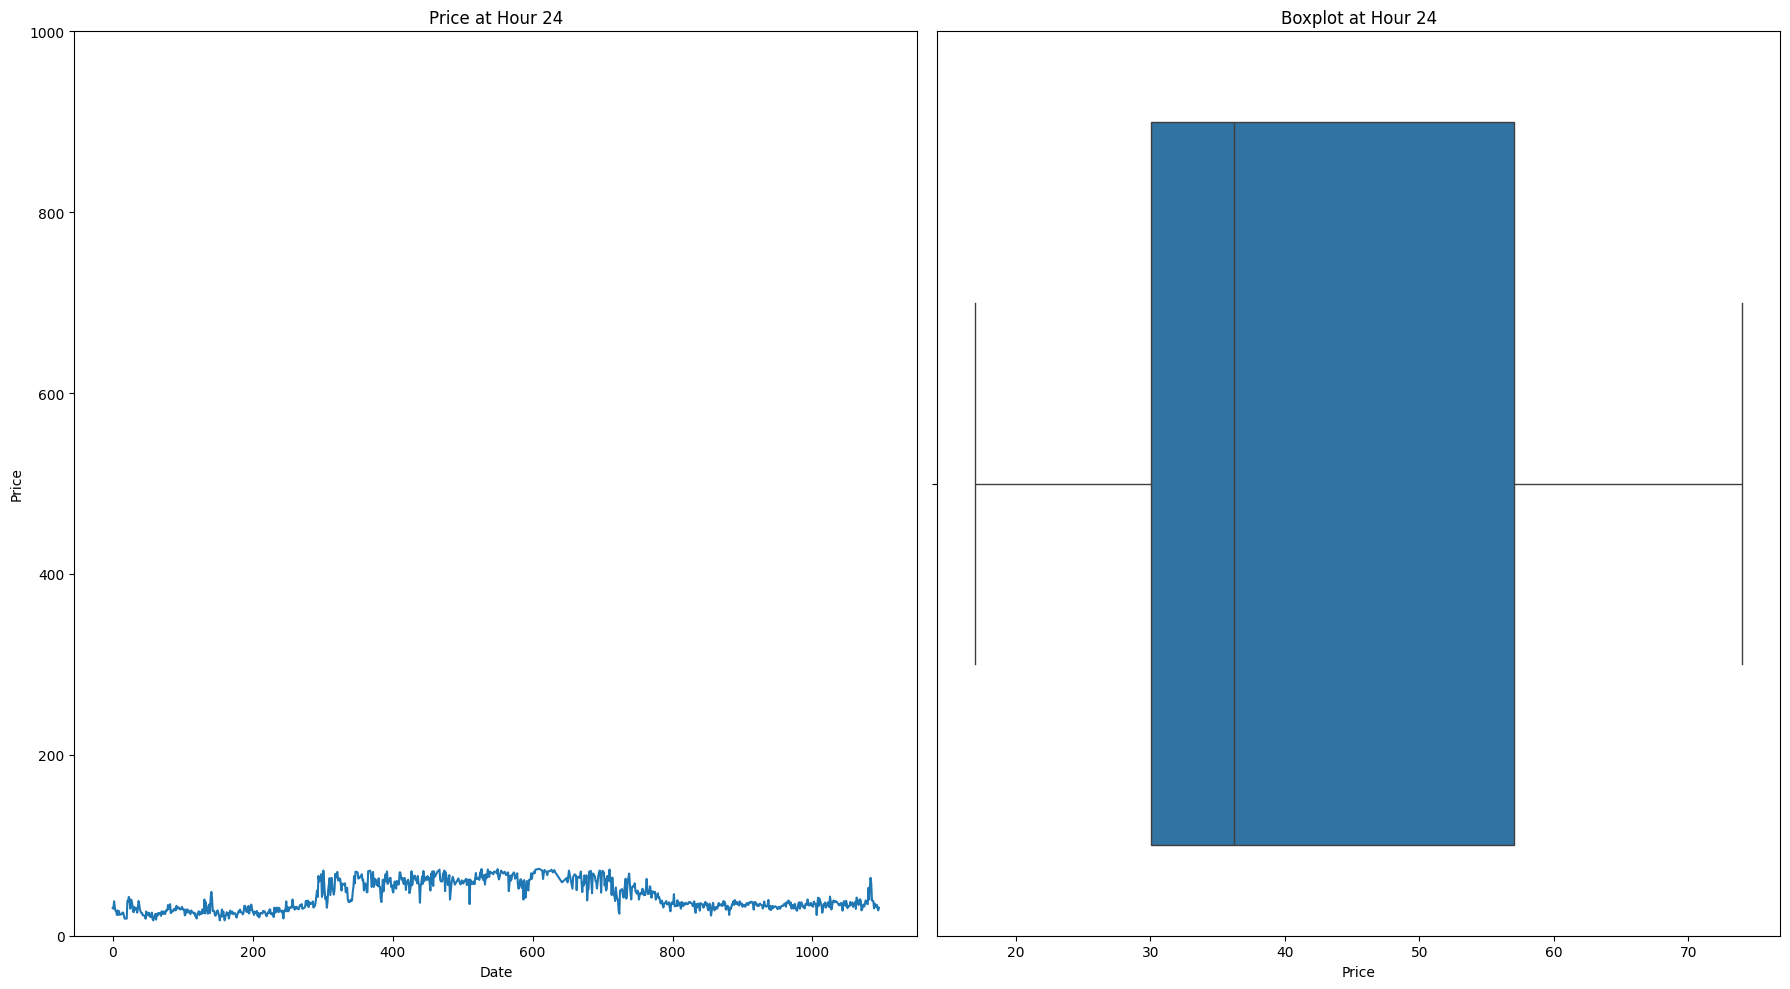

In [15]:
mean_std_table_no_outliers = dict()
for hour in train_data_without_date.columns:
    mean_per_hour = train_data_without_date[hour].mean()
    std_per_hour = train_data_without_date[hour].std()
    no_outliers = train_data_without_date[
        (train_data_without_date[hour] > mean_per_hour - std_per_hour * 1.5) &
        (train_data_without_date[hour] < mean_per_hour + std_per_hour * 1.5)
    ]
    num_of_outliers = len(train_data_without_date[hour]) - len(no_outliers[hour])
    mean_std_table_no_outliers[hour] = [num_of_outliers, float(mean_per_hour), float(std_per_hour)]
    print(f"{hour}\n")
    print(f"Number of outliers: {num_of_outliers}\n")
    print(f"Mean: {mean_per_hour}, Std: {std_per_hour}\n")
    plt.figure(figsize=(18, 10))  # Set the figure size
    plt.subplot(1,2,1)  # Plot
    plt.plot(no_outliers[hour])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.ylim(0, 1000)
    plt.title(f'Price at {hour}')

    plt.subplot(1,2,2)  # Boxplot
    sns.boxplot(x=no_outliers[hour])
    plt.xlabel('Price')
    plt.title(f'Boxplot at {hour}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  
    
mean_std_table_no_outliers = pd.DataFrame(mean_std_table_no_outliers)


In [20]:
# Convert columns to numeric, if necessary
mean_std_table_no_outliers = mean_std_table_no_outliers.apply(pd.to_numeric, errors='coerce')

# Now calculate the maximum and minimum values
print("After removing outliers:")
print(f"Highest average price: {mean_std_table_no_outliers.iloc[1].max()}, at hour {mean_std_table_no_outliers.iloc[1].idxmax()}")
print(f"Lowest average price: {mean_std_table_no_outliers.iloc[1].min()}, at hour {mean_std_table_no_outliers.iloc[1].idxmin()}")

print(f"Price changes the most at hour {mean_std_table_no_outliers.iloc[2].idxmax()}, with std {mean_std_table_no_outliers.iloc[2].max()}")
print(f"Price changes the least at hour {mean_std_table_no_outliers.iloc[2].idxmin()}, with std {mean_std_table_no_outliers.iloc[2].min()}")


After removing outliers:
Highest average price: 70.88373175182483, at hour Hour 12
Lowest average price: 23.12443430656934, at hour Hour 05
Price changes the most at hour Hour 21, with std 77.86540636560514
Price changes the least at hour Hour 05, with std 14.436540037840562


In [21]:
mean_std_table_no_outliers


,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,Hour 10,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
0,32.000000,122.000000,110.000000,123.000000,133.000000,120.000000,115.000000,112.000000,114.000000,69.000000,...,47.000000,45.000000,28.000000,37.000000,25.000000,32.000000,1.000000,81.000000,98.000000,83.000000
1,38.838120,33.993558,30.053896,24.881168,23.124434,28.803768,36.652199,50.544790,56.924398,63.911743,...,58.981095,54.614881,53.981651,60.162509,67.466077,62.436697,58.464252,50.285712,50.451268,45.259334
2,21.884887,16.453507,15.947602,14.585498,14.436540,15.899613,20.775206,28.969477,30.775903,39.165093,...,39.279068,38.096263,40.691564,46.205986,75.780436,45.182318,77.865406,22.377123,20.360752,19.155459


In [23]:
# Ascending order of the average energy price at each hour
mean_std_table_no_outliers.iloc[1].sort_values().index

Index(['Hour 05', 'Hour 04', 'Hour 06', 'Hour 03', 'Hour 02', 'Hour 07',
       'Hour 01', 'Hour 24', 'Hour 22', 'Hour 23', 'Hour 08', 'Hour 17',
       'Hour 16', 'Hour 09', 'Hour 21', 'Hour 15', 'Hour 18', 'Hour 14',
       'Hour 20', 'Hour 10', 'Hour 13', 'Hour 11', 'Hour 19', 'Hour 12'],
      dtype='object')

C:\Users\yixin\AppData\Local\Temp\ipykernel_32016\288072969.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [mean_std_table_no_outliers.iloc[1][i] for i in x]
C:\Users\yixin\AppData\Local\Temp\ipykernel_32016\288072969.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_std = [mean_std_table_no_outliers.iloc[2][i] for i in x]


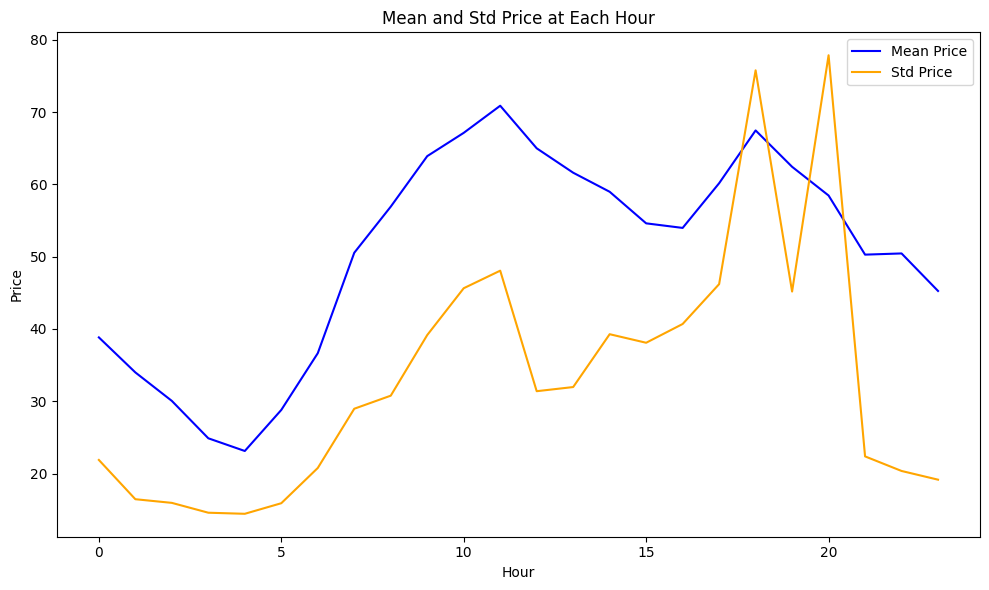

In [22]:
plt.figure(figsize=(10, 6))  # Set the figure size
x = list(range(24))
y_mean = [mean_std_table_no_outliers.iloc[1][i] for i in x]
y_std = [mean_std_table_no_outliers.iloc[2][i] for i in x]

plt.plot(x, y_mean, label='Mean Price', color='blue')  # Plot mean
plt.plot(x, y_std, label='Std Price', color='orange')  # Plot standard deviation
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Mean and Std Price at Each Hour')
plt.legend()  # Add a legend to differentiate the curves

plt.tight_layout()
plt.show()

After removing the outliers, we see the same result as before. The price is the lowest at Hour 05, and the highest at Hour 12. <br>
The price changes the most at Hour 21 (high std), and the least at Hour 05 (low std).



In [ ]:
# # Save a training dataset without outliers 
# mean_per_hour_dict = dict()
# std_per_hour_dict = dict()
# for hour in train_data_without_date.columns:
#     mean_per_hour = train_data_without_date[hour].mean()
#     std_per_hour = train_data_without_date[hour].std()
#     mean_per_hour_dict[hour] = mean_per_hour
#     std_per_hour_dict[hour] = std_per_hour

# train_no_outliers = []

# for row in train_data.index:
#   is_outlier = False

#   for hour in train_data.columns[1:]:
        
#     if ((train_data.loc[row, hour] < mean_per_hour_dict[hour] - std_per_hour_dict[hour] * 1.5) or
#       (train_data.loc[row, hour] > mean_per_hour_dict[hour] + std_per_hour_dict[hour] * 1.5)):
            
#          is_outlier = True

#   if not is_outlier:
#      train_no_outliers.append(train_data.iloc[row])
    
# train_no_outliers = pd.DataFrame(train_no_outliers, columns=train_data.columns)
# train_no_outliers.to_csv("train no outliers.csv", index=False)
